# Introduction to FredBrain via a Labor Market Analysis 🧑‍💼
The **Labor Market** is a central topic in today’s economic discussions, consistently surpassing expectations and fueling debates about its implications for both domestic and global economies. Amidst global market instabilities and ongoing disruptions in supply chains, compounded by geopolitical tensions, the performance of the U.S. Labor Market remains robust and resilient. This strength stands in stark contrast to the recessionary trends and stagnation seen in various other regions worldwide.

## Unveiling the Hidden Realities 📖
What implications does this hold? If the American economy continues to display records labor market figures whilst the S&P 500 surpasses the 5,000-point milestone, one might wonder if Americans are experiencing **unprecedented prosperity** or, have other other economic indicators, such as rising living costs, **negated the benefits** of this growth for the average American.😓

## Data is key 🔐
To answer such questions data is essential. Which is why **FredBrain** was designed to simplify the integration of economic data into various projects, whether for personal use, organizational data management, or academic research. With added MySQLBrain and GPT integration, it facilitates a smoother workflow for analyzing and leveraging economic insights. Further documentation and installation instructions can be found on PyPi.org - [FredBrain](https://pypi.org/project/FredBrain)

## The analysis - A fog of Growth? 👩‍💻
To uncover answers to our questions we will be analyzing numerous indicators from the **FRED API** via the **FredBrain** package which will give us insights into both the Labor Market as well as the prosperity of American Citizens. The analysis will comprise of visualizations, statistical analysis as well as modeling and also include feeding **ChatGPT 4.0**🤖 the data to explore how modern AI solutions can support us in analyzing and processing key economic indicators.

### Analysis Outline:
- Chapter 1. Data Visualization and Exploration
- Chapter 2. Statistical Analysis and Modeling
- Chapter 3. Letting GPT Analyze the Dataset, Visualizations and Models Independently and Contribute a Response

### Author
**Alexander Richt**

*Strategic Data Leader and Analyst*

*I am dedicated to continuous professional development and thrive in roles that merge technical expertise with strategic oversight. I am committed to leveraging innovation in programming, modeling, and analytics to drive tangible results in the corporate, investment and finance sectors.*

**Credentials:** CFA Charterholder & MSc. in Economics with a focus in Econometrics

[alexander.richt1@gmail.com](mailto:alexander.richt1@gmail.com)  
[LinkedIn Profile](https://www.linkedin.com/in/alexander-richt/)  
[GitHub](https://github.com/AlexanderRicht/FredBrain)


---

In [59]:
import os
import pandas as pd
from dotenv import load_dotenv
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool
from bokeh.io import output_notebook
from adjustText import adjust_text
from scipy.signal import find_peaks
import textwrap
import openpyxl


load_dotenv()

# Now access the variables using os.getenv
DATABASE_HOST = os.getenv('DATABASE_HOST')
DATABASE_USERNAME = os.getenv('DATABASE_USERNAME')
DATABASE_PASSWORD = os.getenv('DATABASE_PASSWORD')
DATABASE_NAME = os.getenv('DATABASE_NAME')

In [61]:
try:
    print("Connecting to the database...")
    db_manager = mysql.connector.connect(host=DATABASE_HOST, user=DATABASE_USERNAME, passwd=DATABASE_PASSWORD, db=DATABASE_NAME)
    cursor = db_manager.cursor()
except mysql.connector.Error as e:
    print("Error while connecting to MySQL", e)

Connecting to the database...


# Chapter 1 - Prosperity or Struggle

## Unemployment Rate
The unemployment rate is an important indicator as it gives us valuable insights into the proportion of unemployed individuals within the labor force. High unemployment levels suggest an economic downturn, characterized by a scarcity of available jobs or limited hiring activity among companies. Conversely, low unemployment rates typically indicate a robust job market, reflecting strong economic health and ample employment opportunities for job seekers. This metric is instrumental in assessing the overall performance of the job market.

### Historical Levels of Employment
As seen below, unemployment rates have been at a historical low stagnating at sub-4% levels after reaching historical highs during the COVID pandemic.

The only time periods were unemployment rates sustained at below 4% levels was in 2001 and from 2018 to 2019 before the COVID pandemic occured.

<sup id="a1">[1](#f1)</sup> Unemployed: Includes individuals who do not have a job but are available for work and have been actively looked for work within the prior four weeks as well as those who are waiting to be recalled to a job from which they have been laid off.

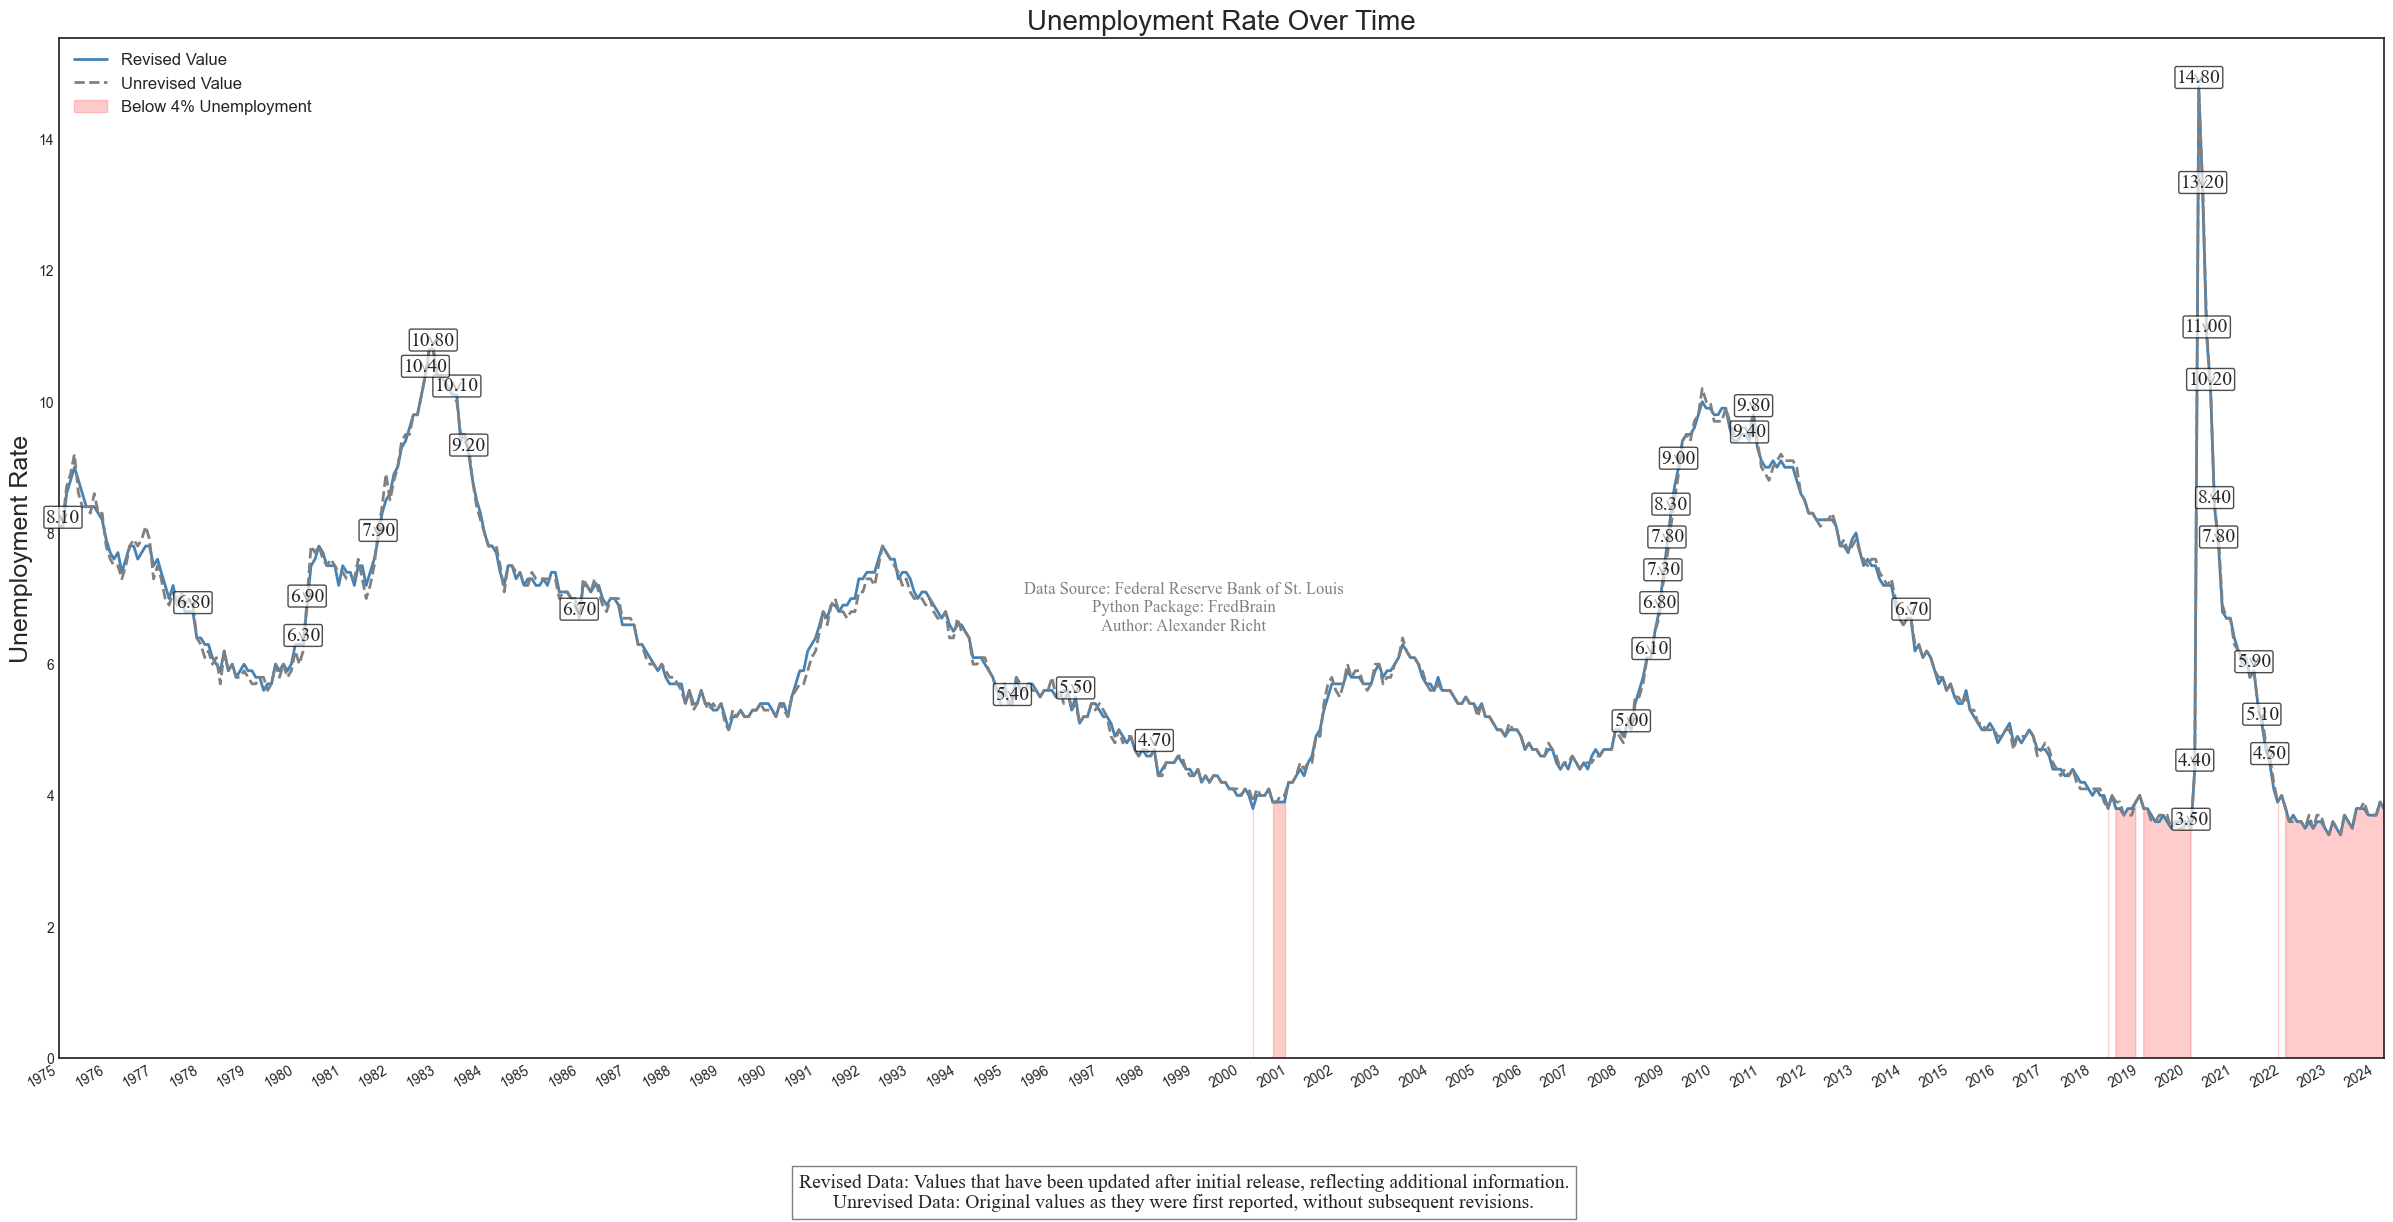

In [3]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series = 'UNRATE';"

db_manager = mysql.connector.connect(host=DATABASE_HOST, user=DATABASE_USERNAME, passwd=DATABASE_PASSWORD, db=DATABASE_NAME)
cursor = db_manager.cursor()

cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)


plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])


plt.plot(recent_df['Reporting Date'], recent_df['Revised Value'], color='steelblue', linewidth=2, label='Revised Value')
plt.plot(recent_df['Reporting Date'], recent_df['Unrevised Value'], color='gray', linewidth=2, linestyle='--', label='Unrevised Value')
# Create a shaded area for when the unemployment rate is below 4%
low_unemployment = recent_df['Revised Value'] < 4
plt.fill_between(recent_df['Reporting Date'], recent_df['Revised Value'], where=low_unemployment, color='red', alpha=0.2, label='Below 4% Unemployment')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions."
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
plt.legend(loc='upper left', fontsize='large', framealpha=0.9)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

def calculate_offset(value, fig, dpi, offset_factor=0.005):
    data_ratio = (fig.get_figheight() * dpi) / (fig.get_figwidth() * dpi)
    return value * offset_factor if data_ratio < 1 else value * offset_factor * data_ratio


recent_df['Value Change'] = recent_df['Revised Value'].diff()

threshold = recent_df['Value Change'].std() / 1.5

for i in range(1, len(recent_df)):
    if abs(recent_df.iloc[i]['Value Change']) > threshold:
        offset = calculate_offset(recent_df.iloc[i]['Revised Value'], plt.gcf(), plt.gcf().dpi)
        plt.annotate(
            f"{recent_df.iloc[i]['Revised Value']:.2f}",
            xy=(recent_df.iloc[i]['Reporting Date'], recent_df.iloc[i]['Revised Value']),
            xytext=(offset, offset),  # Offset from the point
            textcoords="offset points",
            ha='center',
            va='bottom',
            bbox=dict(boxstyle="round,pad=0.1", facecolor='white', edgecolor='black', alpha=0.7),
            arrowprops=dict(arrowstyle="->", color='black')  # Leader line
        )

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate() 
plt.figtext(0.5, 0.1, description, ha="center", fontsize=14, bbox={"facecolor":"white", "alpha":.5, "pad":5})
plt.text(0.5, 0.5, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=1, transform=plt.gcf().transFigure, zorder=0)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.ylabel("Unemployment Rate", fontsize=18)
plt.title("Unemployment Rate Over Time", fontsize=20)

plt.ylim(bottom=0)

plt.savefig('Unemployment Rate Over Time.png', format='png', dpi=150)

plt.show()

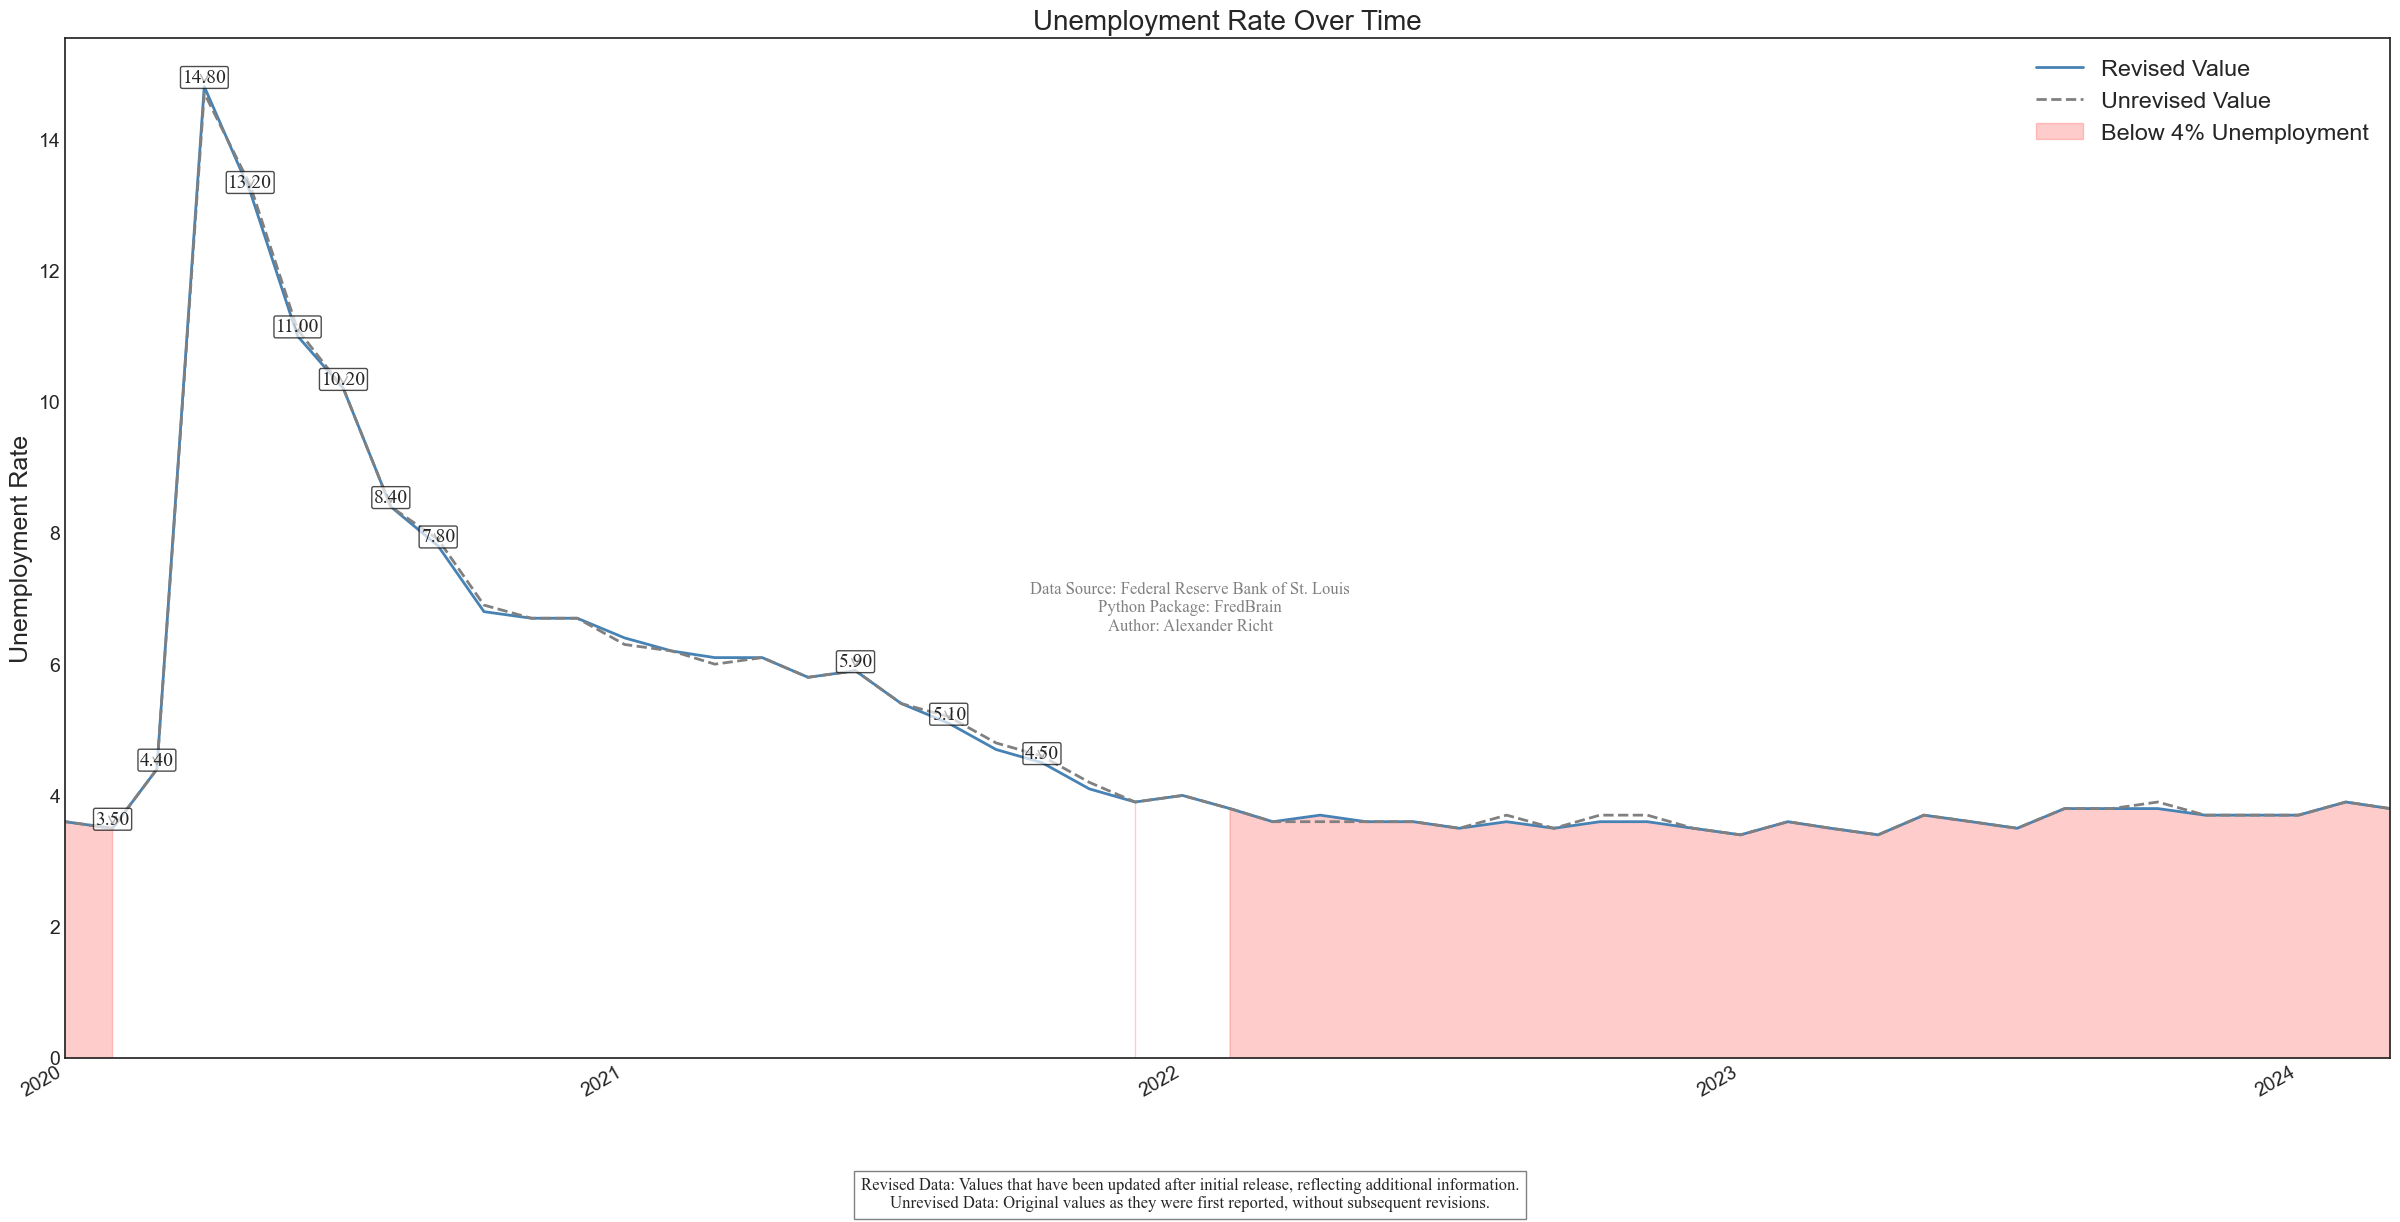

In [4]:
plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 5
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])


plt.plot(recent_df['Reporting Date'], recent_df['Revised Value'], color='steelblue', linewidth=2, label='Revised Value')
plt.plot(recent_df['Reporting Date'], recent_df['Unrevised Value'], color='gray', linewidth=2, linestyle='--', label='Unrevised Value')
# Create a shaded area for when the unemployment rate is below 4%
low_unemployment = recent_df['Revised Value'] < 4
plt.fill_between(recent_df['Reporting Date'], recent_df['Revised Value'], where=low_unemployment, color='red', alpha=0.2, label='Below 4% Unemployment')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions."
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
plt.legend(loc='upper right', fontsize='large', framealpha=0.9)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

def calculate_offset(value, fig, dpi, offset_factor=0.005):
    data_ratio = (fig.get_figheight() * dpi) / (fig.get_figwidth() * dpi)
    return value * offset_factor if data_ratio < 1 else value * offset_factor * data_ratio


recent_df['Value Change'] = recent_df['Revised Value'].diff()

threshold = recent_df['Value Change'].std() / 4

for i in range(1, len(recent_df)):
    if abs(recent_df.iloc[i]['Value Change']) > threshold:
        offset = calculate_offset(recent_df.iloc[i]['Revised Value'], plt.gcf(), plt.gcf().dpi)
        plt.annotate(
            f"{recent_df.iloc[i]['Revised Value']:.2f}",
            xy=(recent_df.iloc[i]['Reporting Date'], recent_df.iloc[i]['Revised Value']),
            xytext=(offset, offset),  # Offset from the point
            textcoords="offset points",
            ha='center',
            va='bottom',
            bbox=dict(boxstyle="round,pad=0.1", facecolor='white', edgecolor='black', alpha=0.7),
            arrowprops=dict(arrowstyle="->", color='black')  # Leader line
        )

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate() 
plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.5, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=1, transform=plt.gcf().transFigure, zorder=0)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.ylabel("Unemployment Rate", fontsize=18)
plt.title("Unemployment Rate Over Time", fontsize=20)

plt.ylim(bottom=0)

plt.savefig('Unemployment Over Time_5years.png', format='png', dpi=150)

plt.show()

## Labor Force Participation
Another key metric to the involvement of the work force in the economy is the participation rate. 

The participation rate will be the percentage of the population that is either working or actively looking for work and can be a reflection of the overall health of the economy or other isolated trends such as a shift in the age of the population or behavior of certain demographics in the population.

### Twilight of Tenure: The Departure of the Aging Workforce
The current data suggests that we are experiencing significant downward pressure, with the labor force participation rate at its lowest in the past half-century. This downturn is most likely a reflection of the aging demographic of the US population, contributing to sustained low unemployment rates below 4% as well as underlying systemic changes in the labor market. The retirement of a substantial segment within the workforce opens a gap, necessitating the filling of positions that become vacant.

### Changing Behaviors
Additionally, we can see how the participation of certain age groups has also impacted the aggregate long term development of the Labor Force Participation. Key takeways from below are:

* 16-19 Years:  With the increasing necessity of higher education by today's employers, we can see how dramatically the workforce participation of this age group has fallen as more younger individuals are attending a 2 or 4 year university before entering the workforce.
* 20-24 Years: A slight downward trend in this demographic may correspond to more individuals pursuing advanced degrees, such as Master's or Doctorates, than in the past.
* 25-54 Years: Despite common media and social media criticism towards younger generations, the labor force participation of the 'prime-age' demographic (25-54 years) has been consistently high, even showing a slight uptrend.
* 55 and Over: Either suprisingly or not suprisingly, this segment of labor force participation has increased at quite substantial levels. This may be a reflection of the fact that in today's economic & political climate, individuals have to work longer than ever before reaching the financial circumstances neccessary to achieve retirement between private and state savings.

The data underscores complex socioeconomic factors influencing labor market dynamics, including education trends and financial security.

<sup id="a1">[1](#f1)</sup> The labor force ecnompasses individuals 16 years of age and older who do not reside in insituitions (e.g., penal and mental facilities, homes for the aged) and are actively participating in the workforce by currently holding a job or by actively searching for one.

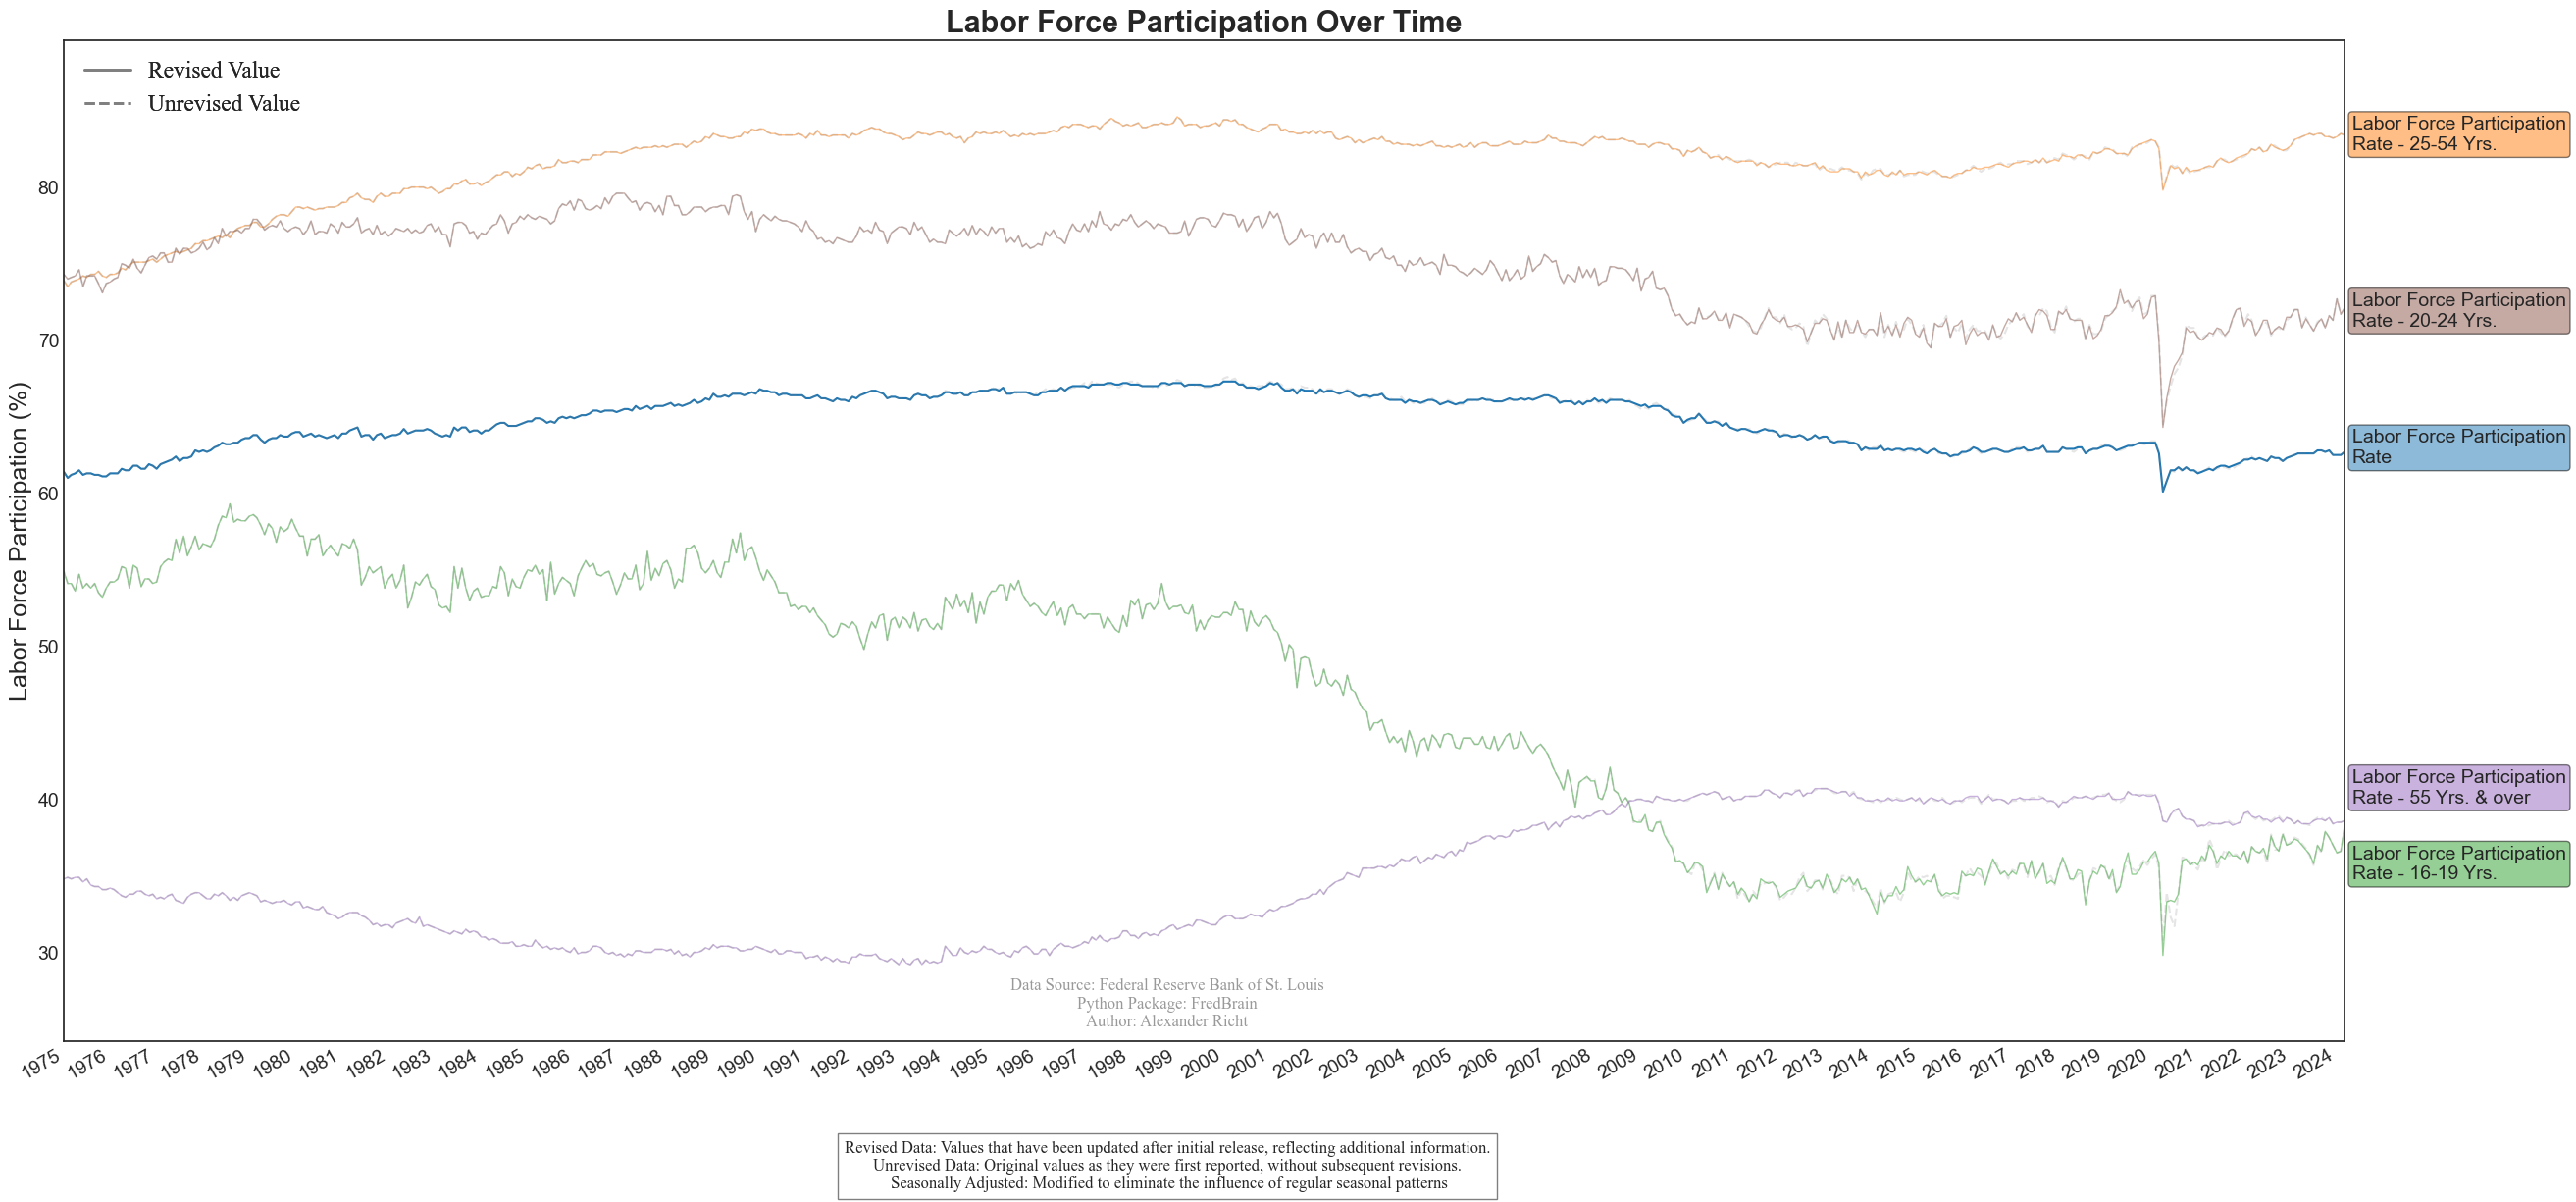

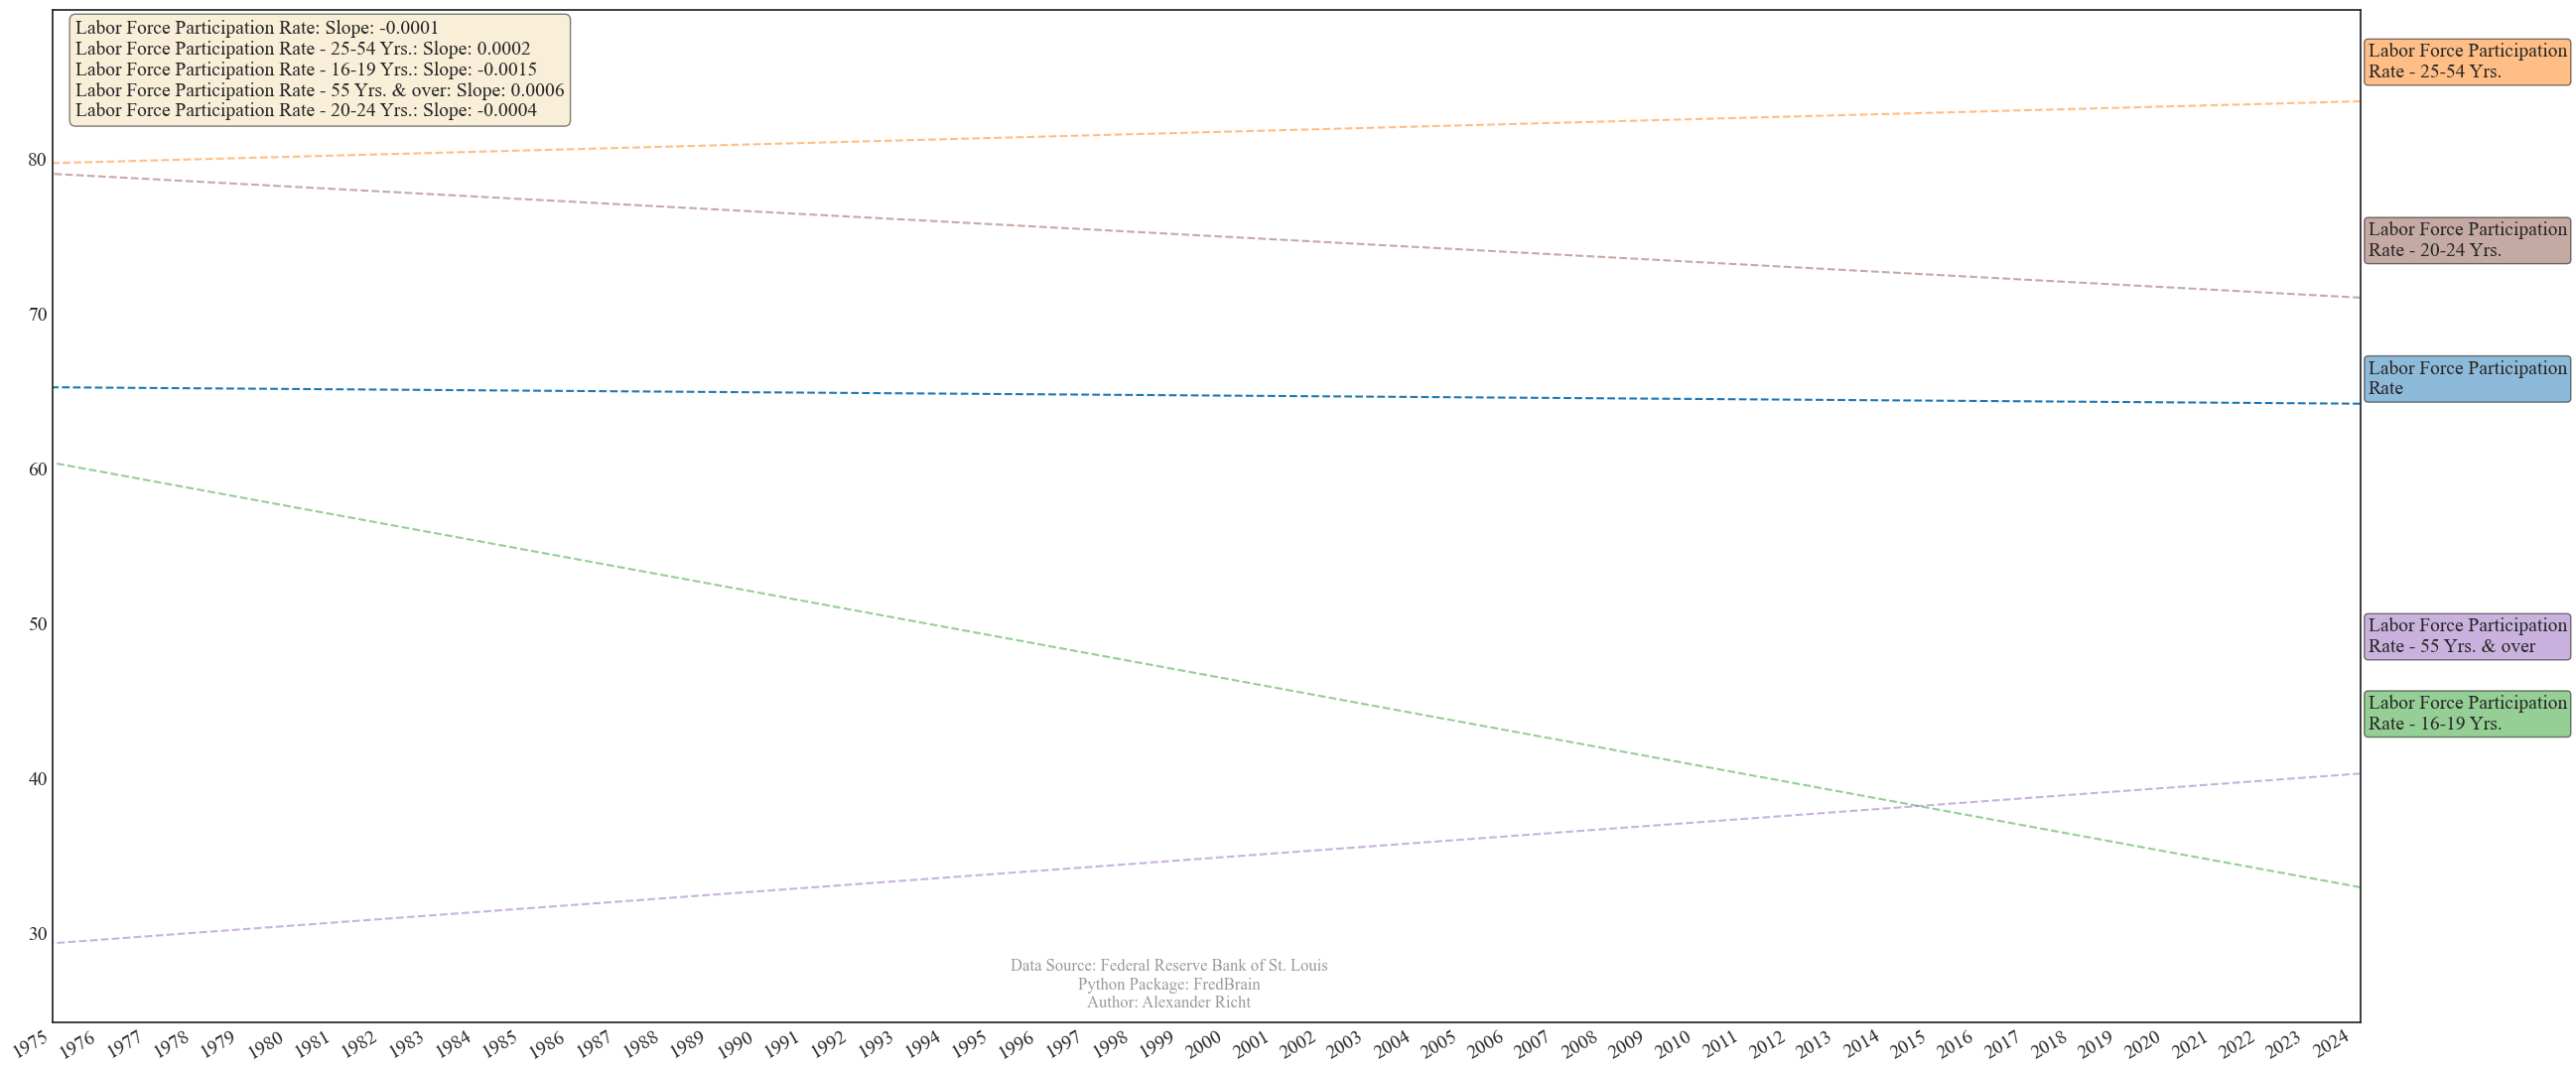

In [64]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('CIVPART', 'LNS11300060', 'LNS11300012', 'LNS11324230', 'LNS11300036')"
db_manager = mysql.connector.connect(host=DATABASE_HOST, user=DATABASE_USERNAME, passwd=DATABASE_PASSWORD, db=DATABASE_NAME)
cursor = db_manager.cursor()
cursor.execute(Data_Query)

Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

civpart_df = recent_df[recent_df['Series'] == 'CIVPART']
LNS11300060_df = recent_df[recent_df['Series'] == 'LNS11300060']
LNS11300012_df = recent_df[recent_df['Series'] == 'LNS11300012']
LNS11324230_df = recent_df[recent_df['Series'] == 'LNS11324230']
LNS11300036_df = recent_df[recent_df['Series'] == 'LNS11300036']

colors = {
    'CIVPART': '#1f77b4',     
    'LNS11300060': '#ff7f0e80',
    'LNS11300012': '#2ca02c80',
    'LNS11324230': '#9467bd80',
    'LNS11300036': '#8c564b80' 
}

for dataframe, series_name in zip([civpart_df, LNS11300060_df, LNS11300012_df, LNS11324230_df, LNS11300036_df],
                                  ['CIVPART', 'LNS11300060', 'LNS11300012', 'LNS11324230', 'LNS11300036']):
    color = colors[series_name]
    alpha = 1.0 if series_name == 'CIVPART' else 0.5
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5 if series_name == 'CIVPART' else 1.0, alpha=alpha, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', alpha=0.2, label=f'{series_name} Unrevised' if series_name == 'CIVPART' else '')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions.\n "
    "Seasonally Adjusted: Modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 5
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 5

value_range = upper_y_limit - 20
step = value_range * 0.04

for dataframe, series_name in zip(
    [civpart_df, LNS11300060_df, LNS11300012_df, LNS11324230_df, LNS11300036_df],
    ['CIVPART', 'LNS11300060', 'LNS11300012', 'LNS11324230', 'LNS11300036']
):
    color = colors[series_name]
    dataframe = dataframe.sort_values('Reporting Date')
    last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
    last_value = dataframe['Revised Value'].iloc[-1] - dataframe['Revised Value'].std() * 0.4
    text_y_position = get_text_position(used_positions, last_value, step)
    used_positions.add(text_y_position)
    series_description = dataframe['Series Description'].iloc[-1]
    wrapped_text = wrap_text(series_description, 30)
    plt.text(last_date, text_y_position, wrapped_text, fontsize=14,
             bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

legend_elements = [Line2D([0], [0], color='gray', lw=2, label='Revised Value'),
                   Line2D([0], [0], color='gray', lw=2, ls='--', label='Unrevised Value')]
first_legend = plt.legend(handles=legend_elements, loc='upper left', fontsize='large', framealpha=0.9)
plt.gca().add_artist(first_legend)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Labor Force Participation Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Labor Force Participation (%)", fontsize=18, family='Arial')

plt.savefig('Labor Force Participation Over Time V2.png', format='png', dpi=150, bbox_inches='tight')


fig, ax = plt.subplots(figsize=(30, 15))
def plot_trend_line(ax, dates, values, color, label):
    date_nums = mdates.date2num(dates)
    slope, intercept = np.polyfit(date_nums, values, 1)
    trend_values = date_nums * slope + intercept
    ax.plot(dates, trend_values, color=color, linestyle='--', linewidth=1.5, label=label)
    slope_text = f"Slope: {slope:.4f}" 

trend_info = {}

for dataframe, series_name in zip(
    [civpart_df, LNS11300060_df, LNS11300012_df, LNS11324230_df, LNS11300036_df],
    ['CIVPART', 'LNS11300060', 'LNS11300012', 'LNS11324230', 'LNS11300036']
):
    color = colors[series_name]
    plot_trend_line(plt.gca(), dataframe['Reporting Date'], dataframe['Revised Value'], color, series_name)
    date_nums = mdates.date2num(dataframe['Reporting Date'])
    series_description = dataframe['Series Description'].iloc[-1]
    slope, intercept = np.polyfit(date_nums, dataframe['Revised Value'], 1)
    trend_info[series_description] = (slope, intercept)

for dataframe, series_name in zip(
    [civpart_df, LNS11300060_df, LNS11300012_df, LNS11324230_df, LNS11300036_df],
    ['CIVPART', 'LNS11300060', 'LNS11300012', 'LNS11324230', 'LNS11300036']
):
    color = colors[series_name]
    dataframe = dataframe.sort_values('Reporting Date')
    last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
    last_value = dataframe['Revised Value'].iloc[-1] - dataframe['Revised Value'].std() * 0.4
    text_y_position = get_text_position(used_positions, last_value, step)
    used_positions.add(text_y_position)
    series_description = dataframe['Series Description'].iloc[-1]
    wrapped_text = wrap_text(series_description, 30)
    plt.text(last_date, text_y_position, wrapped_text, fontsize=14,
             bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))
    
trend_text = "\n".join(f"{series}: Slope: {info[0]:.4f}" for series, info in trend_info.items())

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.01, .99, trend_text, transform=plt.gca().transAxes, fontsize=14, 
               verticalalignment='top', bbox=props)
plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 5
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 5
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.savefig('Labor Force Participation Over Time Trends.png', format='png', dpi=150, bbox_inches='tight')

plt.show()

## Population Demographics and Their Impact on the Labor Market
Understanding population demographics is crucial as they offer insights into prevailing trends within the labor market. The accompanying visuals highlight notable trends in different age cohorts and the foreign-born population, revealing patterns significant to our analysis.

### Aging Workforce
As we can see below, both population demographics for the age groups of 25-54 years of age as well as the 55 years of age show an upward trending trajectory over time with quite steep slopes (occassional flatness also present). However, the slope of the 55 years of age and older population group is steeper than the slope of the 25-54 years of age group which further supports that the expanding aging workforce is contributing to a widening labor supply gap, as these demographic shifts influence fluctuations in labor force participation and unemployment rates. The apparent correlation between the increasing number of individuals not in the labor force and the rising population aged 55 and older reflects this argument and is particularly striking. The parallel slopes of these two lines suggest that as more people enter the older age demographic, a similar proportion is also exiting the labor force and increasing labor supply pressure.

### The Role of Migration in Labor Supply
Furthermore, the trend reflected within the 2nd graph plotting the population of foreign born workers suggests a growing contribution of migrant workers to the labor market, potentially mitigating the impact of an aging native workforce and support the idea that a widening labor supply gap is causing the market to look outside of the domestic market to fill neccessary roles.

### Upcoming Analysis in Chapter 2
In Chapter 2 of the analysis (as mentioned in the introduction), we will attempt to model out the correlations and the given coeffecients between these variables for additional insights on how much impact shifting age demographics may currently be having on both the unemployment rate as well as the labor force participation rate.

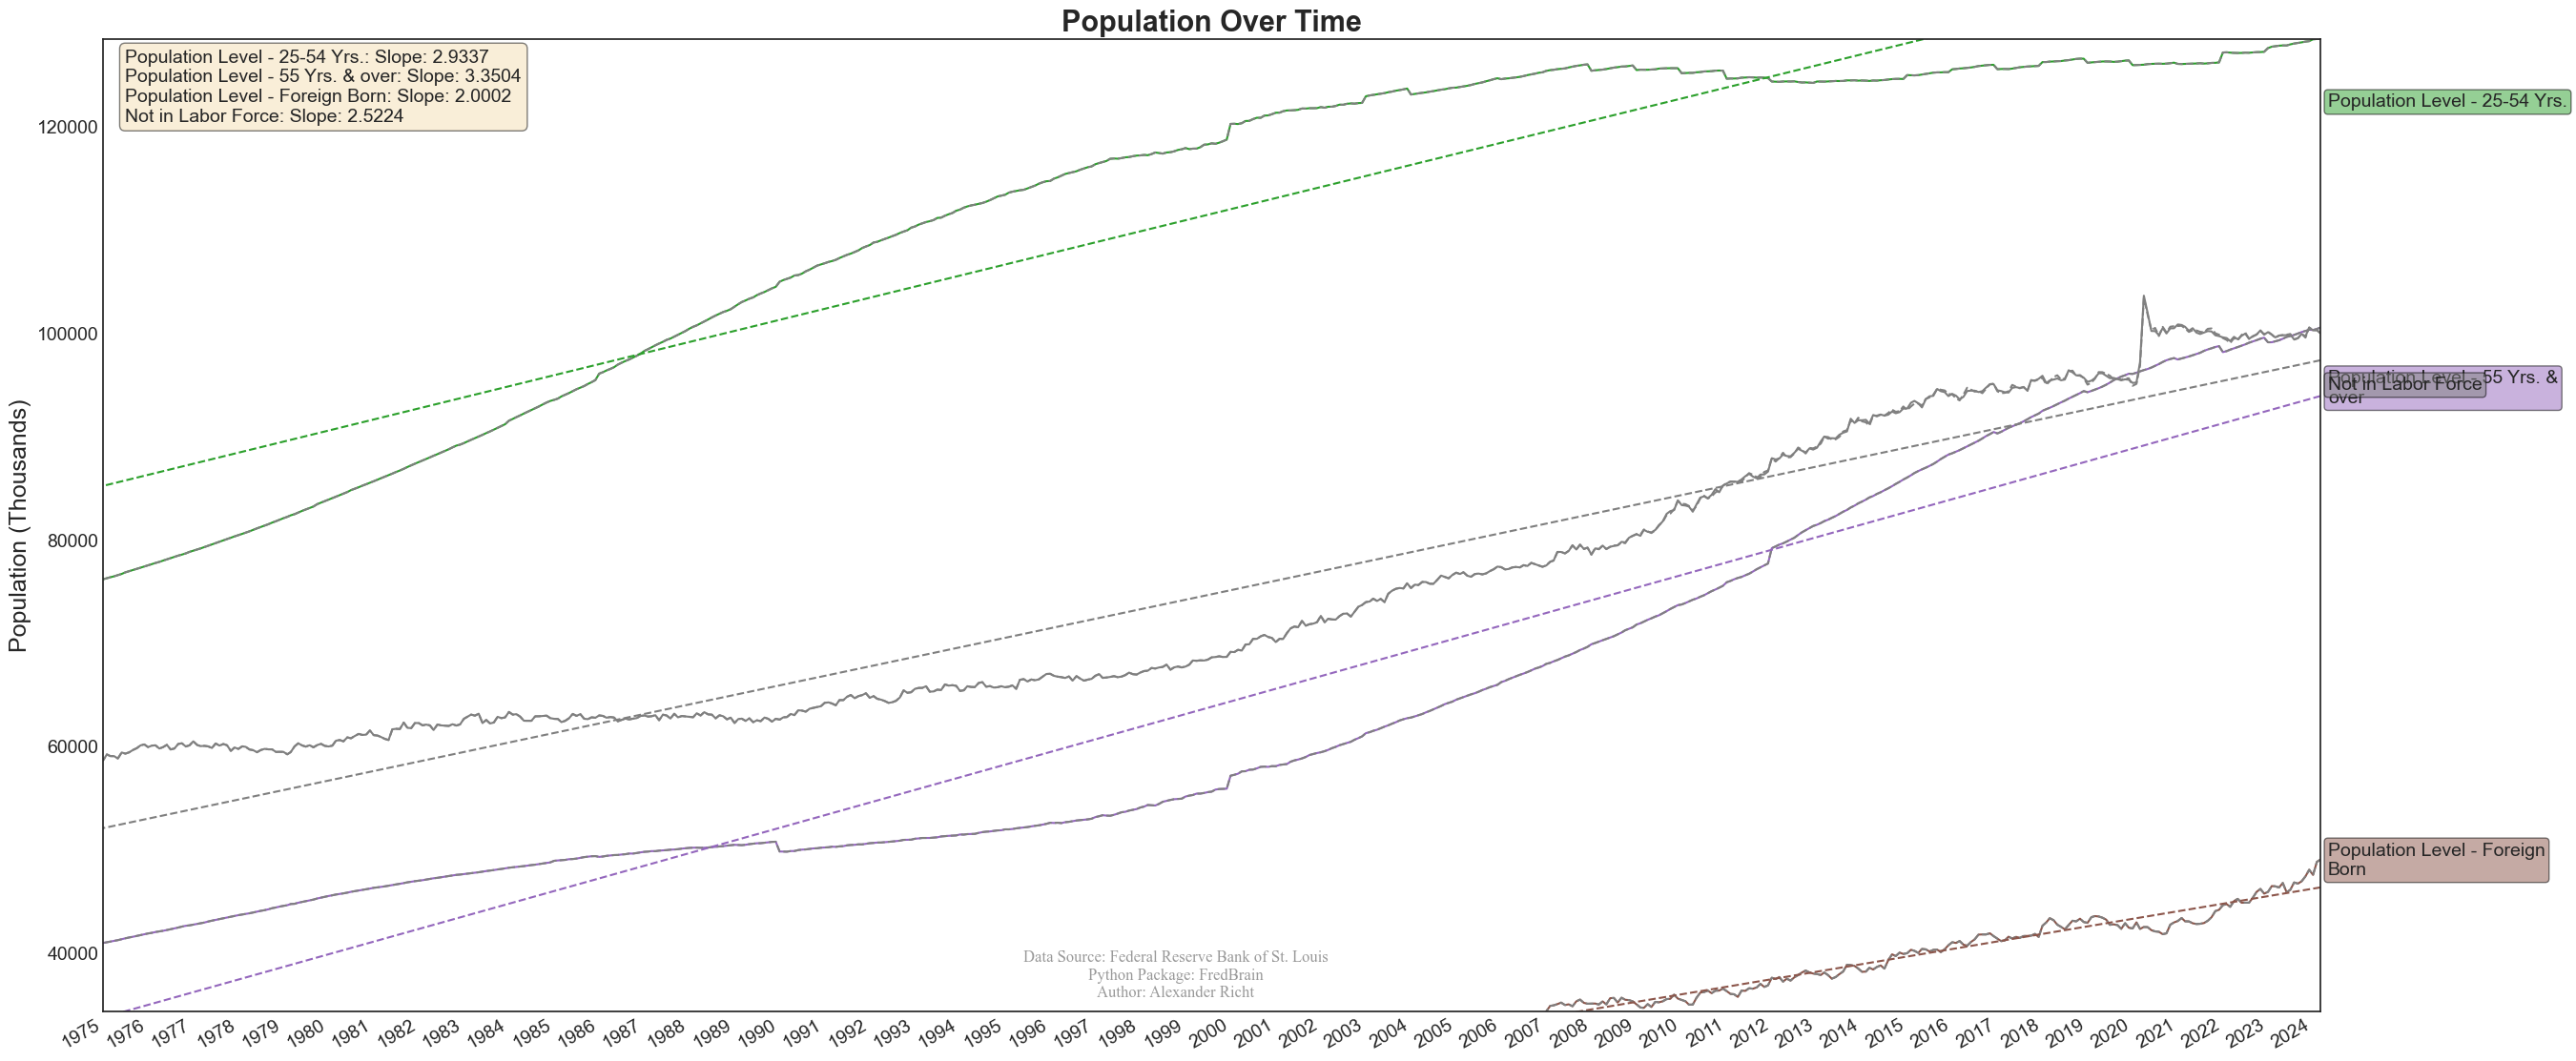

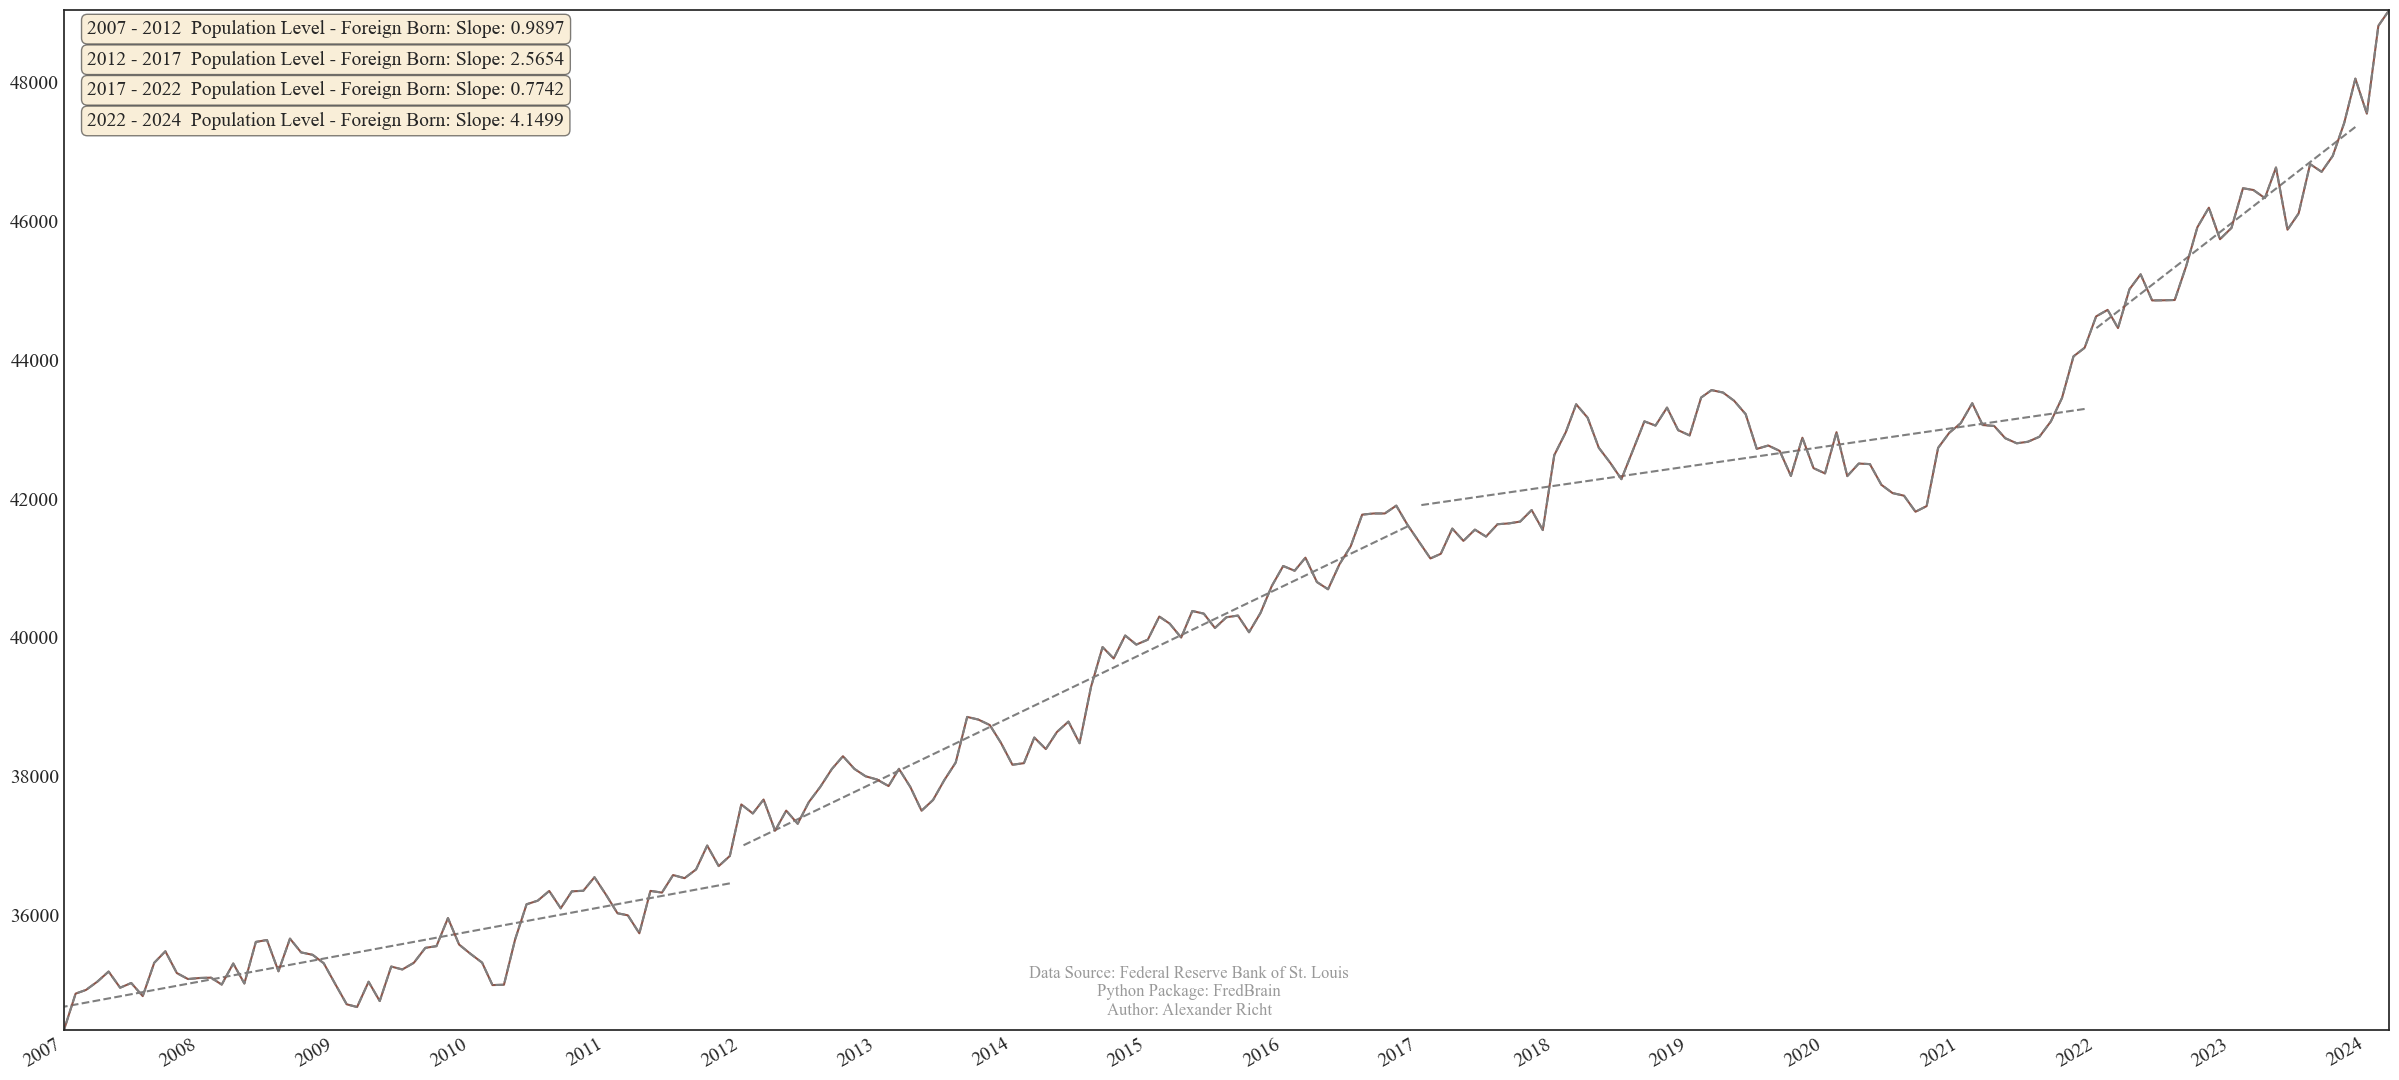

In [65]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ( 'LNU00000060', 'LNU00024230', 'LNU00073395', 'LNS15000000')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

LNU00000060_df = recent_df[recent_df['Series'] == 'LNU00000060']
LNU00024230_df = recent_df[recent_df['Series'] == 'LNU00024230']
LNU00073395_df = recent_df[recent_df['Series'] == 'LNU00073395']
LNS15000000_df = recent_df[recent_df['Series'] == 'LNS15000000']


colors = {
    'LNU00000060': '#2ca02c', 
    'LNU00024230': '#9467bd',
    'LNU00073395': '#8c564b',
    'LNS15000000': '#7f7f7f' 
}

for dataframe, series_name in zip([ LNU00000060_df, LNU00024230_df, LNU00073395_df, LNS15000000_df],
                                  ['LNU00000060', 'LNU00024230', 'LNU00073395', 'LNS15000000']):
    color = colors[series_name]
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', label=f'{series_name} Unrevised')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions.\n "
    "Seasonally Adjusted: Modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

value_range = upper_y_limit - 20
step = value_range * 0.1

for dataframe, series_name in zip(
    [ LNU00000060_df, LNU00024230_df, LNU00073395_df, LNS15000000_df],
    [ 'LNU00000060', 'LNU00024230', 'LNU00073395', 'LNS15000000']
):
    if not dataframe.empty:
        color = colors[series_name]
        dataframe = dataframe.sort_values('Reporting Date')
        last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
        last_value = dataframe['Revised Value'].iloc[-1] - dataframe['Revised Value'].std() * 0.4
        text_y_position = get_text_position(used_positions, last_value, step)
        used_positions.add(text_y_position)
        series_description = dataframe['Series Description'].iloc[-1]
        wrapped_text = wrap_text(series_description, 30)
        plt.text(last_date, text_y_position, wrapped_text, fontsize=14,
                 bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))
    else:
        print(f"Data for {series_name} is empty and will be skipped.")

trend_info = {}
for dataframe, series_name in zip(
    [ LNU00000060_df, LNU00024230_df, LNU00073395_df, LNS15000000_df],
    [ 'LNU00000060', 'LNU00024230', 'LNU00073395', 'LNS15000000']
):
    color = colors[series_name]
    plot_trend_line(plt.gca(), dataframe['Reporting Date'], dataframe['Revised Value'], color, series_name)
    date_nums = mdates.date2num(dataframe['Reporting Date'])
    series_description = dataframe['Series Description'].iloc[-1]
    slope, intercept = np.polyfit(date_nums, dataframe['Revised Value'], 1)
    trend_info[series_description] = (slope, intercept)

trend_text = []
trend_text = "\n".join(f"{series}: Slope: {info[0]:.4f}" for series, info in trend_info.items())
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.01, .99, trend_text, transform=plt.gca().transAxes, fontsize=14, 
               verticalalignment='top', bbox=props)

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 5
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 5

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Population Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Population (Thousands)", fontsize=18, family='Arial')


fig, ax = plt.subplots(figsize=(30, 15))
recent_df = recent_df[recent_df['Series'] == 'LNU00073395']

trend_info = {}


def plot_trend_line(ax, dates, values, color, label):
    date_nums = mdates.date2num(dates) 
    slope, intercept = np.polyfit(date_nums, values, 1) 
    trendline = np.polyval([slope, intercept], date_nums)
    ax.plot(dates, trendline, color=color, linestyle='--', label=label)


start_year = recent_df['Reporting Date'].min().year
end_year = recent_df['Reporting Date'].max().year

current_y_pos = 0.99
text_gap = 0.03 

for period_start in range(start_year, end_year, 5):
    period_end = period_start + 5
    if period_end >= 2024:
        period_end = 2024
    else:
        period_end
    range_period = f"{period_start} - {period_end}"
    mask = (recent_df['Reporting Date'].dt.year >= period_start) & (recent_df['Reporting Date'].dt.year < period_end)
    period_df = recent_df.loc[mask]
    date_nums = mdates.date2num(period_df['Reporting Date'])
    if not period_df.empty:
        plot_trend_line(ax, period_df['Reporting Date'], period_df['Revised Value'], color, f'Trend {period_start}-{period_end - 1}')
        slope, intercept = np.polyfit(date_nums, period_df['Revised Value'], 1)
        series_description = period_df['Series Description'].iloc[-1]
        trend_info = {series_description: (slope, intercept)}
        trend_text = "\n".join(f"{range_period}  {series}: Slope: {info[0]:.4f}" for series, info in trend_info.items())
        plt.gca().text(0.01, current_y_pos, trend_text, transform=plt.gca().transAxes, fontsize=14, 
                       verticalalignment='top', bbox=props)
        current_y_pos -= text_gap
    else:
        print(f"No data for the period {period_start}-{period_end - 1}")

for dataframe, series_name in zip(    [ LNU00073395_df],
    [ 'LNU00073395']):
    color = colors[series_name]
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', label=f'{series_name} Unrevised')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 5
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 5
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.savefig('Foreign Population Over Time.png', format='png', dpi=150)

plt.show()

## The Great Battle of Filling Jobs
The 'Great Battle of Filling Jobs' underscores a critical inflection point for the economy, where the labor resources needed to meet business needs is being fundamentally challenged. As we move further from the initial shocks of the pandemic, it's evident that the job market is undergoing a transformation, reflecting deeper trends than the immediate effects of economic reopening.

The graph illustrates a steady rise in job vacancies over time reaching sustained unprecidentent levels, with a slope that suggests a persistent and growing gap between available positions and the workforce ready to fill them. This gap points to systemic changes in the employment landscape, influenced by an aging population and evolving workforce behavior.

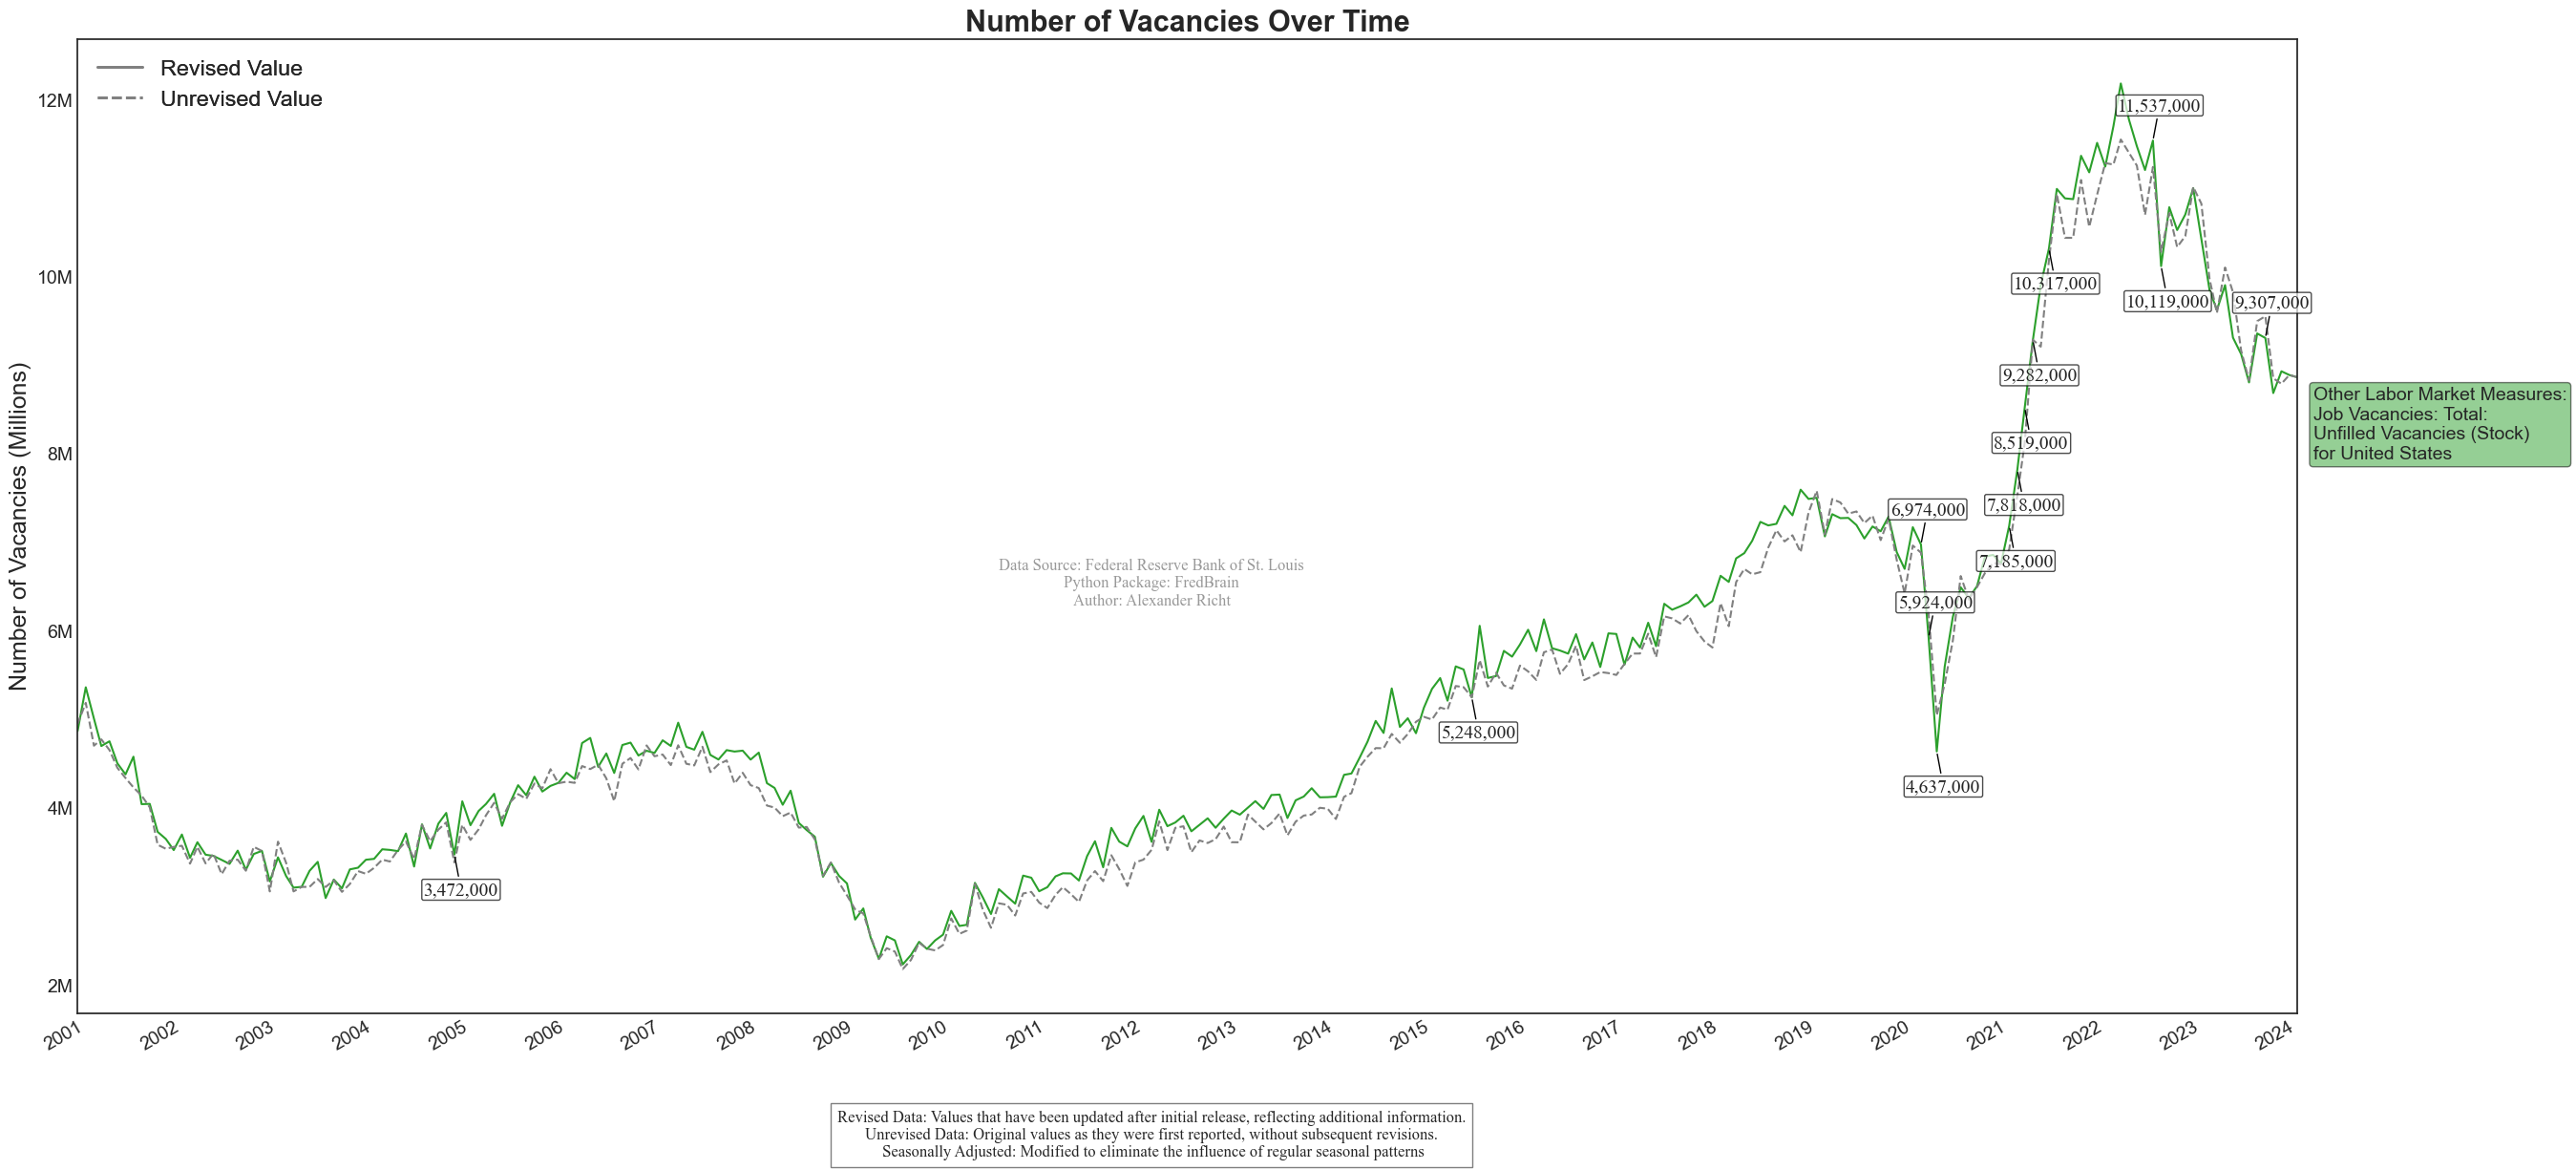

In [90]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('LMJVTTUVUSM647S')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

LMJVTTUVUSM647S_df = recent_df[recent_df['Series'] == 'LMJVTTUVUSM647S']

colors = {
    'LMJVTTUVUSM647S': '#2ca02c'
}

for dataframe, series_name in zip([LMJVTTUVUSM647S_df],
                                  ['LMJVTTUVUSM647S']):
    color = colors[series_name]
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', label=f'{series_name} Unrevised')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions.\n "
    "Seasonally Adjusted: Modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def thousands_formatter(x, pos):
    return f'{int(x/1000000)}M'

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

value_range = upper_y_limit - 20
step = value_range * 0.1

for dataframe, series_name in zip([LMJVTTUVUSM647S_df],
                                  ['LMJVTTUVUSM647S']
):
    if not dataframe.empty:
        color = colors[series_name]
        dataframe = dataframe.sort_values('Reporting Date')
        last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
        last_value = dataframe['Revised Value'].iloc[-1] - dataframe['Revised Value'].std() * 0.4
        text_y_position = get_text_position(used_positions, last_value, step)
        used_positions.add(text_y_position)
        series_description = dataframe['Series Description'].iloc[-1]
        wrapped_text = wrap_text(series_description, 30)
        plt.text(last_date, text_y_position, wrapped_text, fontsize=14,
                 bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))
    else:
        print(f"Data for {series_name} is empty and will be skipped.")


def calculate_offset(value, fig, dpi, offset_factor=0.005, max_offset=20):
    data_ratio = (fig.get_figheight() * dpi) / (fig.get_figwidth() * dpi)
    calculated_offset = value * offset_factor if data_ratio < 1 else value * offset_factor * data_ratio
    return min(calculated_offset, max_offset) 

Indicator_Dataframe['Value Change'] = Indicator_Dataframe['Revised Value'].diff()

threshold = Indicator_Dataframe['Value Change'].std() * 2

legend_elements = [Line2D([0], [0], color='gray', lw=2, label='Revised Value'),
                   Line2D([0], [0], color='gray', lw=2, ls='--', label='Unrevised Value')]
first_legend = plt.legend(handles=legend_elements, loc='upper left', fontsize='large', framealpha=0.9)
plt.gca().add_artist(first_legend)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

for i in range(1, len(Indicator_Dataframe)):
    if abs(Indicator_Dataframe.iloc[i]['Value Change']) > threshold:
        direction = np.sign(Indicator_Dataframe.iloc[i]['Value Change'])
        offset = calculate_offset(Indicator_Dataframe.iloc[i]['Revised Value'], plt.gcf(), plt.gcf().dpi)
        xytext = (5, offset * direction)
        plt.annotate(
            f"{Indicator_Dataframe.iloc[i]['Revised Value']:,.0f}",
            xy=(Indicator_Dataframe.iloc[i]['Reporting Date'], Indicator_Dataframe.iloc[i]['Revised Value']),
            xytext=xytext,
            textcoords="offset points",
            ha='center',
            va='bottom' if direction > 0 else 'top',
            arrowprops=dict(arrowstyle="-", color='black'),
            bbox=dict(boxstyle="round,pad=0.1", facecolor='white', edgecolor='black', alpha=0.7)
        )

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.5, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Number of Vacancies Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Number of Vacancies (Millions)", fontsize=18, family='Arial')

plt.savefig('Job Vacancies.png', format='png', dpi=150)

plt.show()

## Working Hard or Hardly Working?

Despite labor market supply pressure, the existing labor force is not working longer hours in response. Instead, if we take the figures at face value and that the given data collected is of high quality, the overall number of weekly hours worked has been rather stable over the last 20 years.

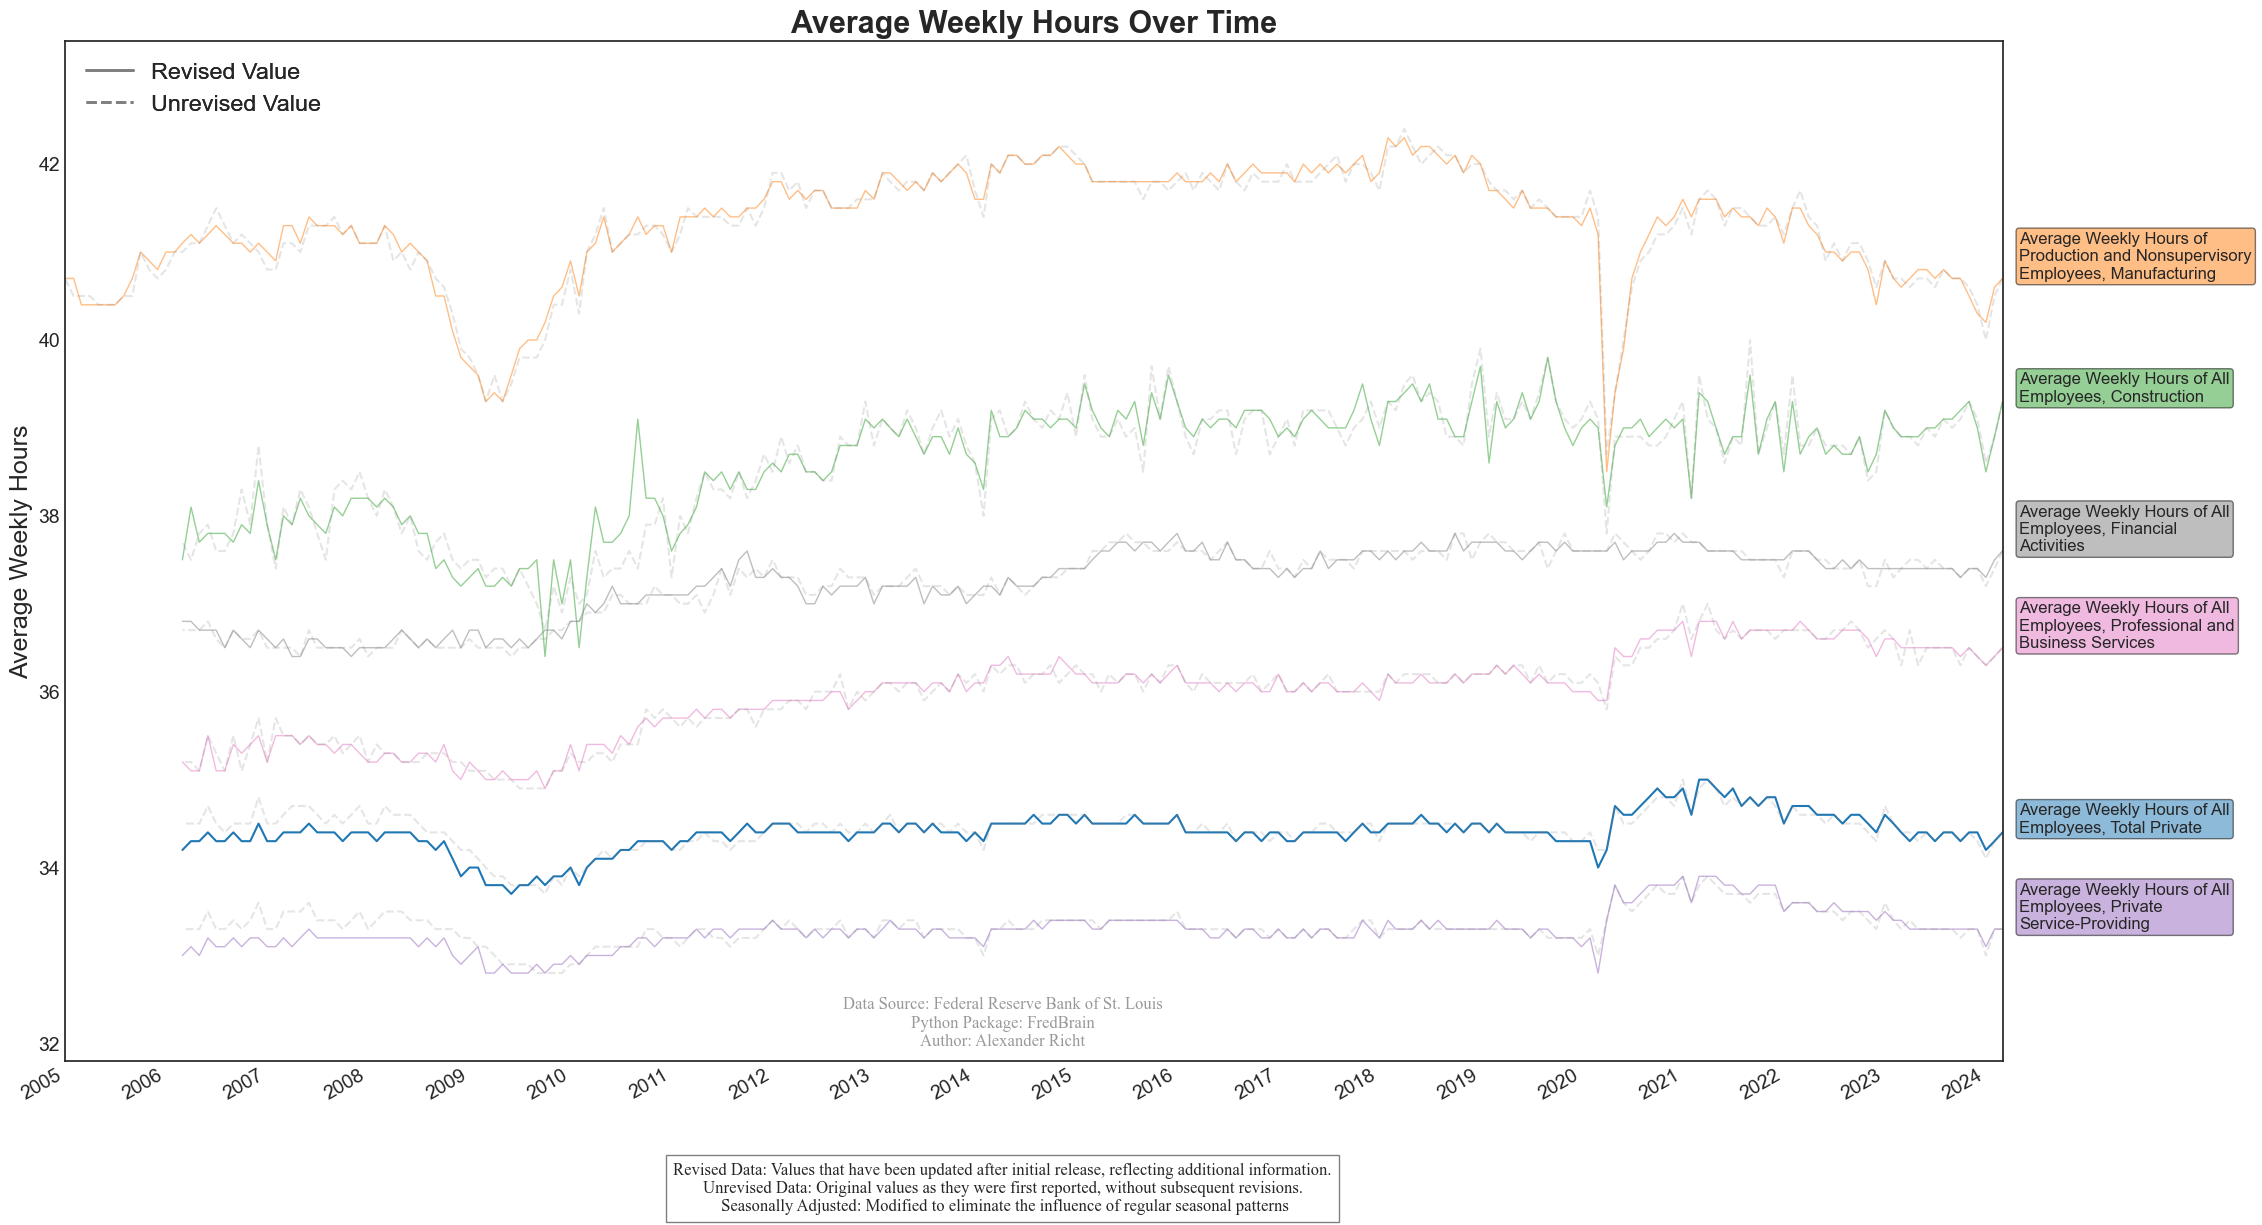

In [195]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ( 'AWHAETP', 'AWHMAN', 'AWHAECON', 'AWHAEPSP', 'AWHAEINFO', 'AWHAEPBS', 'AWHAEFA', 'AWHAEDG')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(25, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 20
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

AWHAETP_df = recent_df[recent_df['Series'] == 'AWHAETP']
AWHMAN_df = recent_df[recent_df['Series'] == 'AWHMAN']
AWHAECON_df = recent_df[recent_df['Series'] == 'AWHAECON']
AWHAEPSP_df = recent_df[recent_df['Series'] == 'AWHAEPSP']
AWHAEINFO_df = recent_df[recent_df['Series'] == 'AWHAEINFO']
AWHAEPBS_df = recent_df[recent_df['Series'] == 'AWHAEPBS']
AWHAEFA_df = recent_df[recent_df['Series'] == 'AWHAEFA']
AWHAEDG_df = recent_df[recent_df['Series'] == 'AWHAEDG']

colors = {
    'AWHAETP': '#1f77b4',    
    'AWHMAN': '#ff7f0e',  
    'AWHAECON': '#2ca02c',  
    'AWHAEPSP': '#9467bd', 
    'AWHAEINFO': '#8c564b', 
    'AWHAEPBS': '#e377c2', 
    'AWHAEFA': '#7f7f7f', 
    'AWHAEDG': '#bcbd22',  
}

for dataframe, series_name in zip([ AWHAETP_df, AWHMAN_df, AWHAECON_df, AWHAEPSP_df, AWHAEPBS_df, AWHAEFA_df ],
                                  ['AWHAETP', 'AWHMAN', 'AWHAECON', 'AWHAEPSP', 'AWHAEPBS', 'AWHAEFA']):
    color = colors[series_name]
    alpha = 1.0 if series_name == 'AWHAETP' else 0.5
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5 if series_name == 'AWHAETP' else 1.0, alpha=alpha, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', alpha=0.2, label=f'{series_name} Unrevised' if series_name == 'AWHAETP' else '')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions.\n "
    "Seasonally Adjusted: Modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

value_range = upper_y_limit - 20
step = value_range * 0.04

for dataframe, series_name in zip(
            [ AWHAETP_df, AWHMAN_df, AWHAECON_df, AWHAEPSP_df, AWHAEPBS_df, AWHAEFA_df ],
                                  ['AWHAETP', 'AWHMAN', 'AWHAECON', 'AWHAEPSP', 'AWHAEPBS', 'AWHAEFA', 'AWHAEDG']
):
    if not dataframe.empty:
        color = colors[series_name]
        dataframe = dataframe.sort_values('Reporting Date')
        last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
        last_value = dataframe['Revised Value'].iloc[-1]
        text_y_position = get_text_position(used_positions, last_value, step)
        used_positions.add(text_y_position)
        series_description = dataframe['Series Description'].iloc[-1]
        wrapped_text = wrap_text(series_description, 30)
        plt.text(last_date, text_y_position, wrapped_text, fontsize=12,
                 bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))
    else:
        print(f"Data for {series_name} is empty and will be skipped.")

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 1
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 1

legend_elements = [Line2D([0], [0], color='gray', lw=2, label='Revised Value'),
                   Line2D([0], [0], color='gray', lw=2, ls='--', label='Unrevised Value')]
first_legend = plt.legend(handles=legend_elements, loc='upper left', fontsize='large', framealpha=0.9)
plt.gca().add_artist(first_legend)

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Average Weekly Hours Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Average Weekly Hours", fontsize=18, family='Arial')

plt.savefig('Average Weekly Hours Over Time.png', format='png', dpi=150)


plt.show()

## The Almighty Dollar

Median Weekly Real Earnings reflects the earnings of a typical worker in today's economy adjusted for inflation such that earnings and purchasing power can be compared over time.

Currently, the labor market features historically low unemployment rates alongside sustained high levels of job vacancies. In such a market, one might expect real income for workers to not only improve but also to outpace inflation due to heightened demand for labor.

Overtime, we can see that earnings have gone through cycles of growth and decline but overall since 1979, Real Earnings Growth has been 9 percent. However, the recent surge in inflation, especially since the pandemic began in 2020, has exerted considerable downward pressure on purchasing power, visibly affecting Real Earnings Growth.

### The Price of Gender

The future of innovation and leadership embraces talent irrespective of gender. Despite significant improvements in the gender pay gap, disperaties remain present. The graph below delineates the wage gap between men and women using shaded areas in both the initial and past time periods. In 1979, the wage gap stood at nearly 40%, a stark contrast to the more narrowed gap of 16% today. While women's real earnings have increased by 31% since 1979, the journey toward gender parity continues. 

### Alienated Males

As can be often heard from mainstream media, a sentiment of alienation among segments of the male population exist today. Notably the data reveals that the average male today has slightly less purchasing power than their counterparts in 1979, with real earnings seeing a marginal decline of -3.7%. This statistic highlights the broader economic challenges that can contribute to such feelings of disenfranchisement by men in todays economy in comparison to those of their forfathers.

### Are Workers Better Off?

To deepen our understanding of how earnings have evolved, and whether society has benefited from economic growth, we will continue to examine various factors such as:

- CPI Indexes: Analyzing Consumer Price Index (CPI) data helps us understand inflation trends and their impact on real earnings.
- Corporate Earnings Growth: Comparing worker earnings growth to corporate earnings growth can provide insights into how economic benefits are distributed within the economy.
- Economic Inequality: Investigating how earnings growth has been distributed across different segments of the economy can shed light on broader socio-economic trends and inequalities.
- Housing: Exploring how the affordability of homes and home ownership has developed over time.
- Debt as a Percentage of Disposable Income: Understanding how the levels of debt of Americans on average has developed over time
  
<sup id="a1">[1](#f1)</sup> 1982-1984 CPI Adjusted Dollars refers to using the given time period as a "baseline" to adjust earning figures to reflect what the dollar was worth during that period, allowing us to compare the development of earnings over time on a comparable basis

<sup id="a2">[2](#f2)</sup> Purchasing Power refers to the value of money expressed in terms of the amount of goods or services that one unit of money is able to buy today

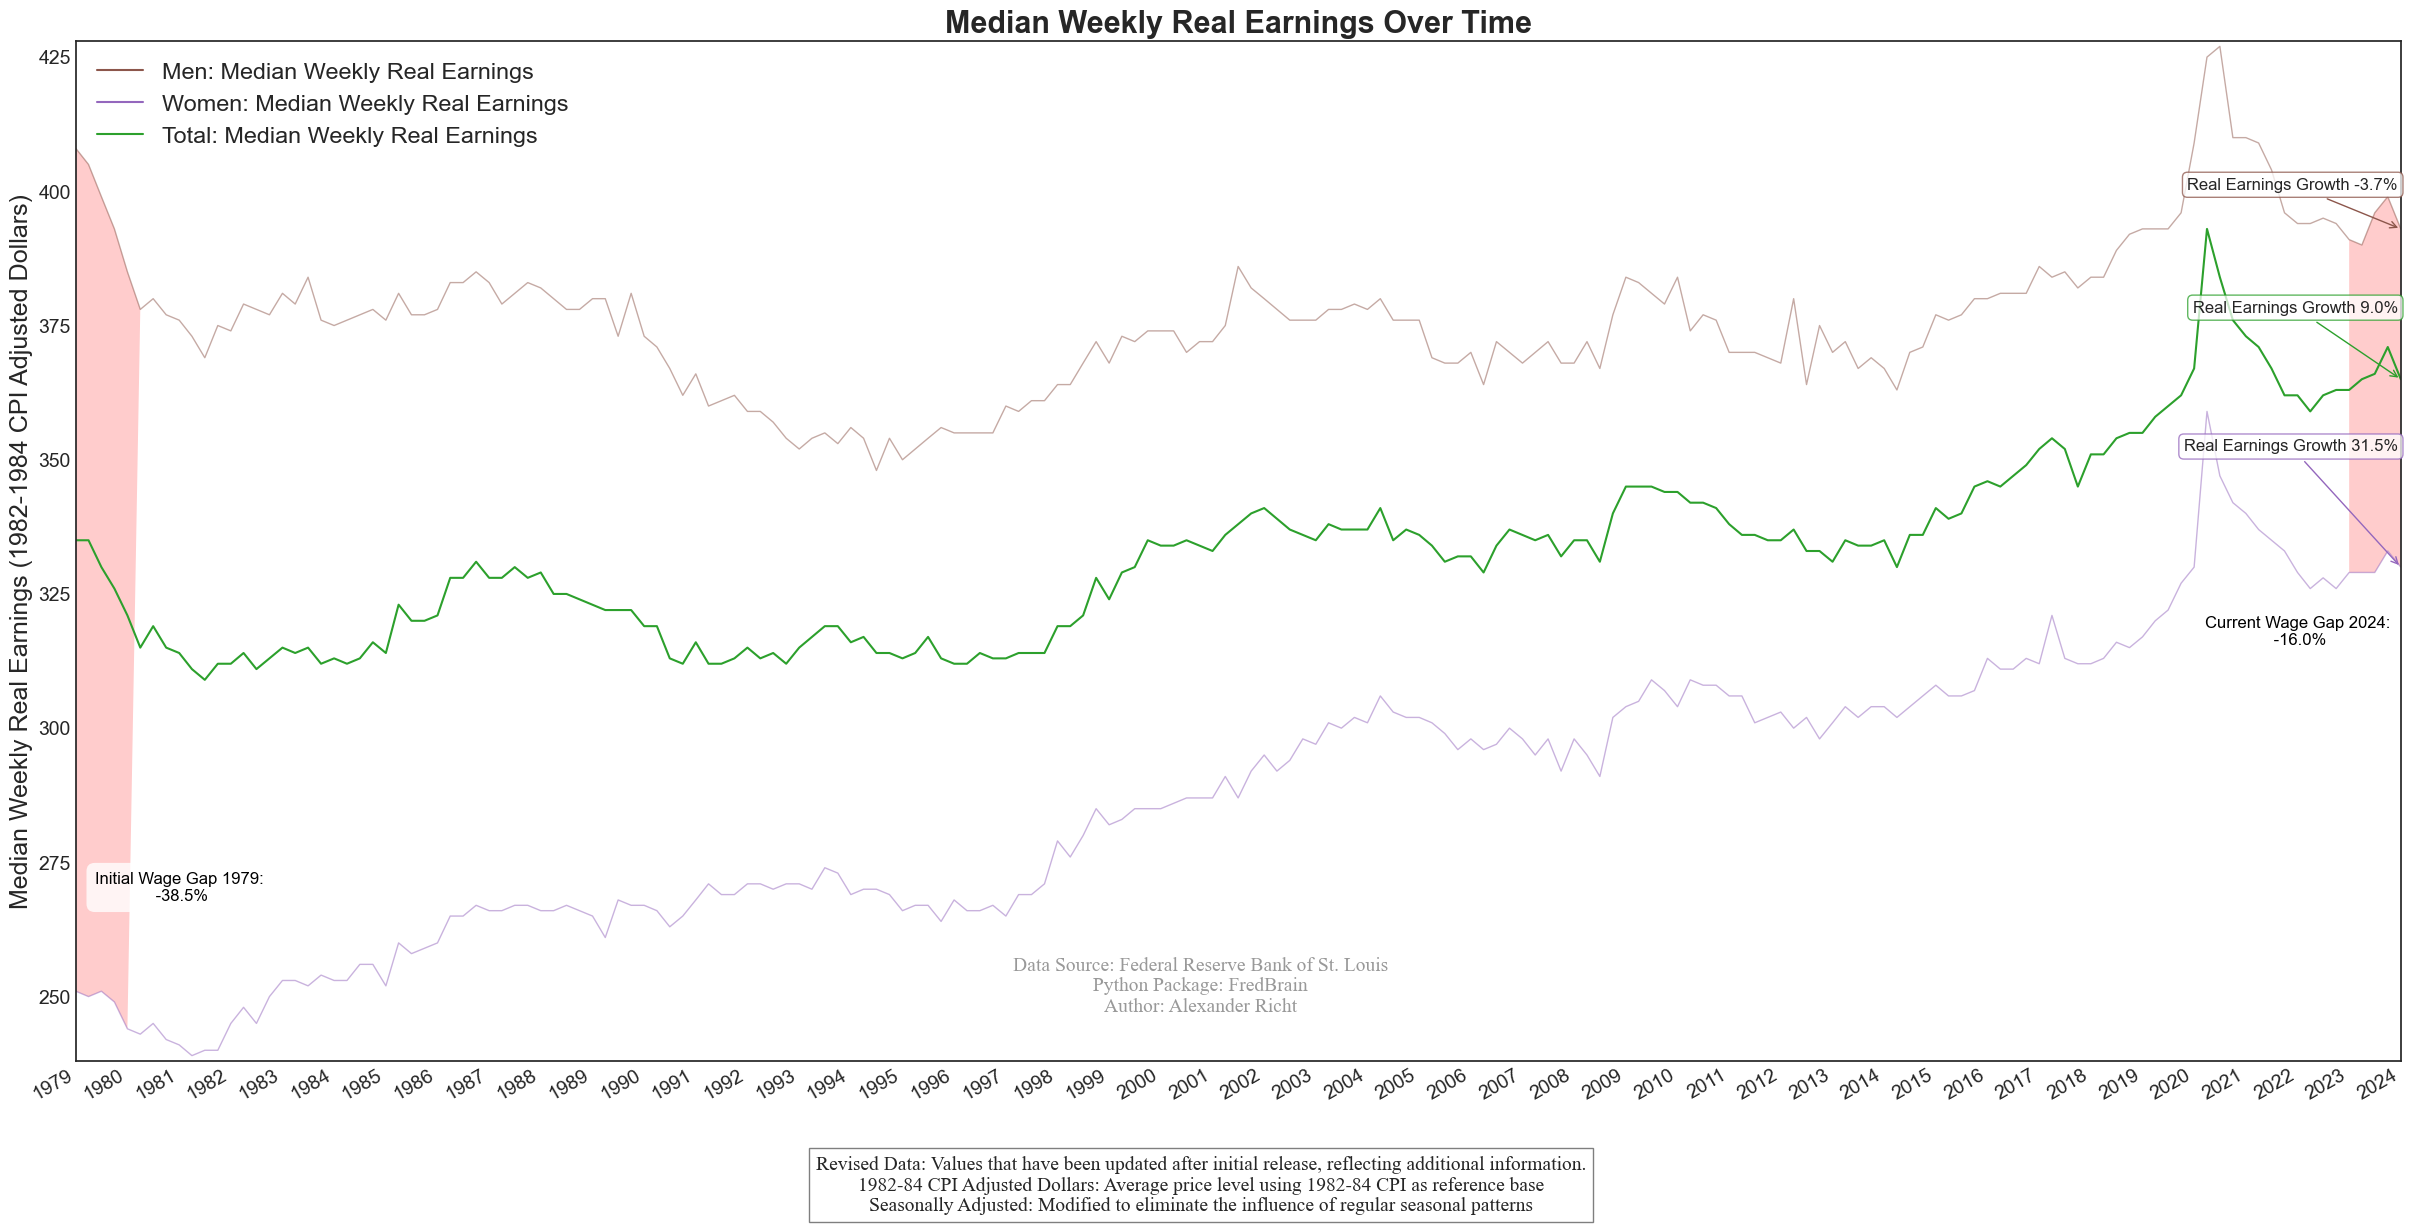

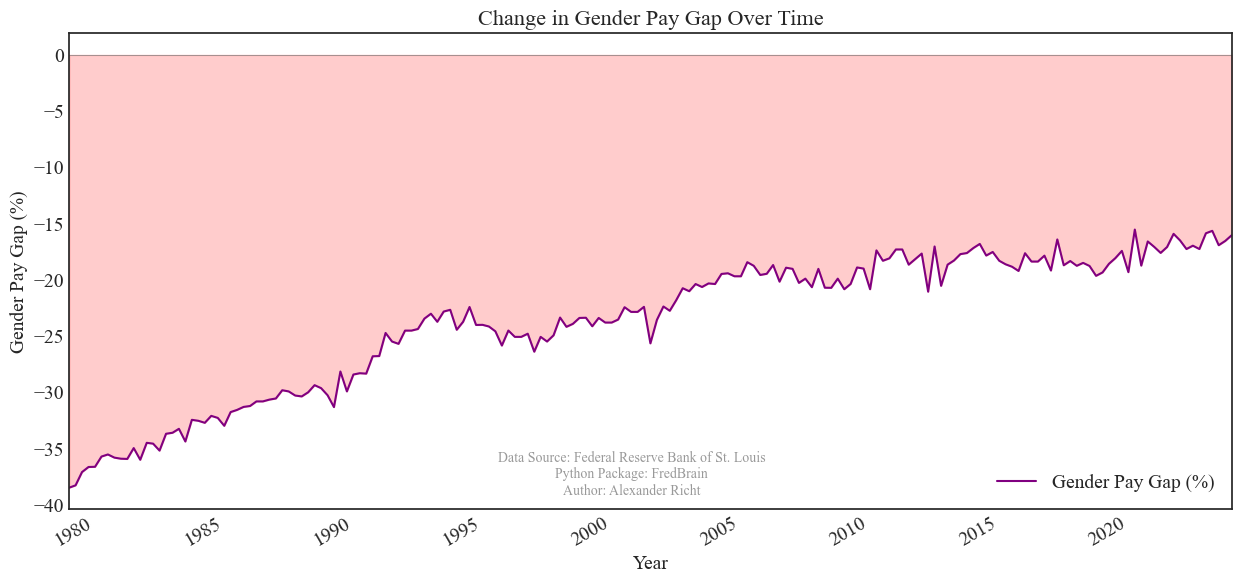

In [117]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('LES1252881600Q', 'LES1252881900Q', 'LES1252882800Q')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 80
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])


LES1252881600Q_df = recent_df[recent_df['Series'] == 'LES1252881600Q']
LES1252881900Q_df = recent_df[recent_df['Series'] == 'LES1252881900Q']
LES1252882800Q_df = recent_df[recent_df['Series'] == 'LES1252882800Q']

colors = {
    'LES1252881600Q': '#2ca02c',  
    'LES1252881900Q': '#8c564b', 
    'LES1252882800Q': '#9467bd',  
}

cell_text = []
columns = ['Series Description', 'Cumulative % Change']


def adjusted_annotation_position(df, current_index, default_offset_y, max_attempts=10):
    """ Dynamically adjust the vertical position to avoid overlapping annotations. """
    step = default_offset_y / 5  # Smaller step for fine adjustment
    current_y = df['Revised Value'].iloc[current_index] + default_offset_y
    attempt = 0
    while attempt < max_attempts:
        overlapping = df.iloc[:current_index][(df['Reporting Date'].iloc[:current_index] - df['Reporting Date'].iloc[current_index]).abs() < pd.Timedelta(days=365)]
        if not overlapping.empty:
            if (overlapping['Revised Value'] + default_offset_y).between(current_y - step, current_y + step).any():
                current_y += step 
        attempt += 1
    return current_y
    
used_positions = []  

for dataframe, series_name in zip([LES1252881600Q_df, LES1252881900Q_df, LES1252882800Q_df],
                                  ['LES1252881600Q', 'LES1252881900Q', 'LES1252882800Q']):
    color = colors[series_name]
    alpha = 1.0 if series_name == 'LES1252881600Q' else 0.5
    dataframe_sorted = dataframe.sort_values('Reporting Date')
    start_value = dataframe_sorted['Revised Value'].iloc[0]
    end_value = dataframe_sorted['Revised Value'].iloc[-1]
    percent_change = ((end_value - start_value) / start_value) * 100
    plt.plot(dataframe_sorted['Reporting Date'], dataframe_sorted['Revised Value'],
             color=color, linewidth=1.5 if series_name == 'LES1252881600Q' else 1.0, alpha=alpha,
             label=f'{series_name} Revised')
    annotation_x = dataframe_sorted['Reporting Date'].iloc[-1]
    annotation_y = dataframe_sorted['Revised Value'].iloc[-1]
    offset_x = 20  
    offset_y = dataframe_sorted['Revised Value'].std() * 0.5  
    adjusted_y = adjusted_annotation_position(dataframe_sorted, -1, offset_y) 
    plt.annotate(f"Real Earnings Growth {percent_change:.1f}%", 
                 xy=(annotation_x, annotation_y),
                 xytext=(annotation_x - pd.Timedelta(days=offset_x), adjusted_y),
                 textcoords="data",
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=color, alpha=0.75),
                 fontsize=12, ha='right', va='bottom')

men_df = LES1252881900Q_df.copy()
women_df = LES1252882800Q_df.copy()
first_3_years_end = men_df['Reporting Date'].iloc[0] - pd.DateOffset(years=1)
last_3_years_start = men_df['Reporting Date'].iloc[-1] + pd.DateOffset(years=1)
men_df.sort_values(by='Reporting Date', inplace=True)
women_df.sort_values(by='Reporting Date', inplace=True)

plt.fill_between(men_df['Reporting Date'], men_df['Revised Value'], women_df['Revised Value'], 
                 where=(men_df['Reporting Date'] >= first_3_years_end),
                 facecolor='red', interpolate=True, alpha=0.2)

earliest_men_earnings = men_df[men_df['Reporting Date'] ==  men_df['Reporting Date'].min()]['Revised Value'].iloc[0]
earliest_women_earnings = women_df[women_df['Reporting Date'] ==  women_df['Reporting Date'].min()]['Revised Value'].iloc[0]
earliest_percentage_difference = (earliest_women_earnings - earliest_men_earnings) / earliest_men_earnings * 100
bbox_props = dict(boxstyle="round,pad=0.5", facecolor='white', edgecolor='none', alpha=0.8)

plt.text(women_df['Reporting Date'].iloc[8], women_df['Revised Value'].iloc[5] * 1.1, f"Initial Wage Gap 1979:\n {earliest_percentage_difference:.1f}%", 
         ha='center', va='bottom', fontsize=12, color='black', bbox=bbox_props)

plt.fill_between(men_df['Reporting Date'], men_df['Revised Value'], women_df['Revised Value'], 
                 where=(men_df['Reporting Date'] <= last_3_years_start),
                 facecolor='red', interpolate=True, alpha=0.2)

latest_men_earnings = men_df[men_df['Reporting Date'] ==  men_df['Reporting Date'].max()]['Revised Value'].iloc[0]
latest_women_earnings = women_df[women_df['Reporting Date'] ==  women_df['Reporting Date'].max()]['Revised Value'].iloc[0]
latest_percentage_difference = (latest_women_earnings - latest_men_earnings) / latest_men_earnings * 100

plt.text(women_df['Reporting Date'].iloc[-9], women_df['Revised Value'].iloc[-1] - 15, f"Current Wage Gap 2024:\n {latest_percentage_difference:.1f}%", 
         ha='center', va='bottom', fontsize=12, color='black', bbox=bbox_props)

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "1982-84 CPI Adjusted Dollars: Average price level using 1982-84 CPI as reference base\n"
    "Seasonally Adjusted: Modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

series_info = {
    'LES1252881900Q': {'color': '#8c564b', 'label': 'Men: Median Weekly Real Earnings'},
    'LES1252882800Q': {'color': '#9467bd', 'label': 'Women: Median Weekly Real Earnings'},
    'LES1252881600Q': {'color': '#2ca02c', 'label': 'Total: Median Weekly Real Earnings'}
}

legend_elements = [Line2D([0], [0], color=info['color'], lw=1.5, label=info['label'])
                   for info in series_info.values()]

plt.legend(handles=legend_elements, loc='upper left', fontsize='large')

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 1
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 1

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14


plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.figtext(0.5, 0.1, description, ha="center", fontsize=14, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.25, copyright_notice, fontsize=14, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Median Weekly Real Earnings Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Median Weekly Real Earnings (1982-1984 CPI Adjusted Dollars)", fontsize=18, family='Arial')

plt.savefig('Median Weekly Real Earnings Over Time.png', format='png', dpi=150)

plt.show()


men_df = LES1252881900Q_df.copy()
women_df = LES1252882800Q_df.copy()

men_df.sort_values('Reporting Date', inplace=True)
women_df.sort_values('Reporting Date', inplace=True)

combined_df = pd.merge(men_df, women_df, on='Reporting Date', suffixes=('_men', '_women'))

combined_df['Pay Gap'] = (combined_df['Revised Value_women'] - combined_df['Revised Value_men']) / combined_df['Revised Value_men'] * 100

plt.figure(figsize=(15, 7))

plt.plot(combined_df['Reporting Date'], combined_df['Pay Gap'], color='purple', label='Gender Pay Gap (%)')

plt.axhline(0, color='gray', linewidth=0.5)

plt.fill_between(combined_df['Reporting Date'], combined_df['Pay Gap'], 0,
                 where=(combined_df['Pay Gap'] < 0),
                 color='red', alpha=0.2, interpolate=True)

plt.title('Change in Gender Pay Gap Over Time', fontsize=16)
plt.xlim(left=combined_df['Reporting Date'].min(), right=combined_df['Reporting Date'].max())
plt.xlabel('Year')
plt.ylabel('Gender Pay Gap (%)')
plt.legend()

# Format the x-axis to show years clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
plt.gcf().autofmt_xdate() 
plt.text(0.5, 0.25, copyright_notice, fontsize=10, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.savefig('Gender Wage Gap Over Time.png', format='png', dpi=150)


plt.show()

## What is "CPI"?

A commonly heard but often confusing term, Consumer Price Index (CPI) is an aggregate of prices paid for a given basket of goods and reflects the percent change in prices relative to the reference base - which in this case is 1982-1984. The standard indexes used represent roughly 88% of the total population with the intent to capture the habits of the average consumer.

CPI's are based on the following basket of goods:
- **Housing**: Includes rent, owners' equivalent rent, and utilities but excludes actual home purchases.
- **Food and Beverages**: Encompasses both groceries and dining out expenses.
- **Apparel**: Covers clothing and footwear for all age groups.
- **Transportation**: Accounts for vehicle purchases, fuel costs, and public transport fares.
- **Medical Care**: Includes health services and medications.
- **Recreation**: Consists of leisure goods and activities.
- **Education and Communication**: Involves tuition fees and communication services.
- **Other Goods and Services**: Personal care products and services, tobacco and smoking products, haircuts and other personal services, funeral expenses.

Each component of the CPI has different weightings which reflect the spending habits of the households surveyed for this purpose. This structure of the index attemptd to provide a comprehensive view of the cost of living and inflation trends in the economy but is limited in the sense that it suffers from the following shortcomings:

- **Home Ownership**: Rather than tracking the actual prices homes, the CPI uses a concept called "owners' equivalent rent" (OER) which represents the amount homeowners would pay to rent their homes in a free market
- **Insurance**: Health or Life Insurance costs
- **Substitution Bias**: As the CPI focuses on a Typical Basket of Goods it may not fully account for changes in consumer behavior which cna result in substituting between goods as relative prices and available products change

### Inflation: A Neccessary Evil

A question that to many feels as old as time is if steadily growing the money supply and managing a target inflation rate is critical to the long term growth of an economy. As tends to happen every few decades, we are reminded of the subtle power of monetary policy and the influence any given central bank can have on our lives.

As we all have experienced recently, inflation has disrupted our lives in one way or another. Inflation is typically seen as a sign of a growing economy, but it needs careful management to prevent excessive increases that could destabilize economic conditions.

But why would we want any inflation at all?

- **Stimulates Economic Activity**: Moderate inflation encourages spending and investment.
- **Reduces Real Debt Burden**: Inflation decreases the real value of debt over time.
- **Prevents Deflation**: Helps avoid deflationary spirals which can stall economic growth and result in rising defaults as property values fall.


### The Cost of Living Crisis

In the visualizations below, we can directly see the speed at which inflation lost control in all aspects of our lives. Each bar chart shows the Year-on-Year (YoY) change for a specific CPI category from 2016 to 2024.


#### CPI: Core (Excluding Food & Energy)
- **Trend**: Gradual increase in inflation rate until 2022, followed by a notable decline with YoY Inflation decling froming 6.15% to 3.81%.
- **Interpretation**: The peak in 2022 suggests inflationary pressures in core CPI components eased, possibly due to economic stabilization or policy interventions.

#### CPI: Rent of Primary Residence
- **Trend**: Steady rise through early 2022, peaking sharply then gradually declining.
- **Interpretation**: Indicates significant rises in rental costs, peaking in 2022 possibly driven by housing market constraints. The decline may reflect market adjustments or changes in housing policies.

#### CPI: Used Cars & Trucks
- **Trend**: Volatility with a sharp spike in 2021 and a sharp decline afterward.
- **Interpretation**: The 2021 spike can be attributed to supply chain disruptions, notably the global semiconductor shortage impacting automobile production. The decline suggests a resolution or adjustment in consumer demand.

#### CPI: Groceries
- **Trend**: Significant rise peaking in 2022 before falling sharply.
- **Interpretation**: Likely related to disruptions in food supply chains or increased agricultural input costs. The drop suggests normalization of supply chains or improvements in agricultural production.

#### CPI: Dining Out
- **Trend**: Steady increase up to 2023, peaking then slightly dropping.
- **Interpretation**: Reflects rising costs in the restaurant industry, potentially due to increased labor and ingredient costs. The peak in 2023 could indicate a pricing threshold impacting consumer spending.

#### CPI: Housing
- **Trend**: Consistent increase, particularly sharp from 2020 onwards.
- **Interpretation**: Indicates ongoing inflationary pressures in the housing market.

#### General Observations
These trends highlight the diverse economic, policy, and environmental factors influencing price levels across different sectors. The data provides valuable insights into the complex nature of inflation and its varying impacts on different segments of the economy.



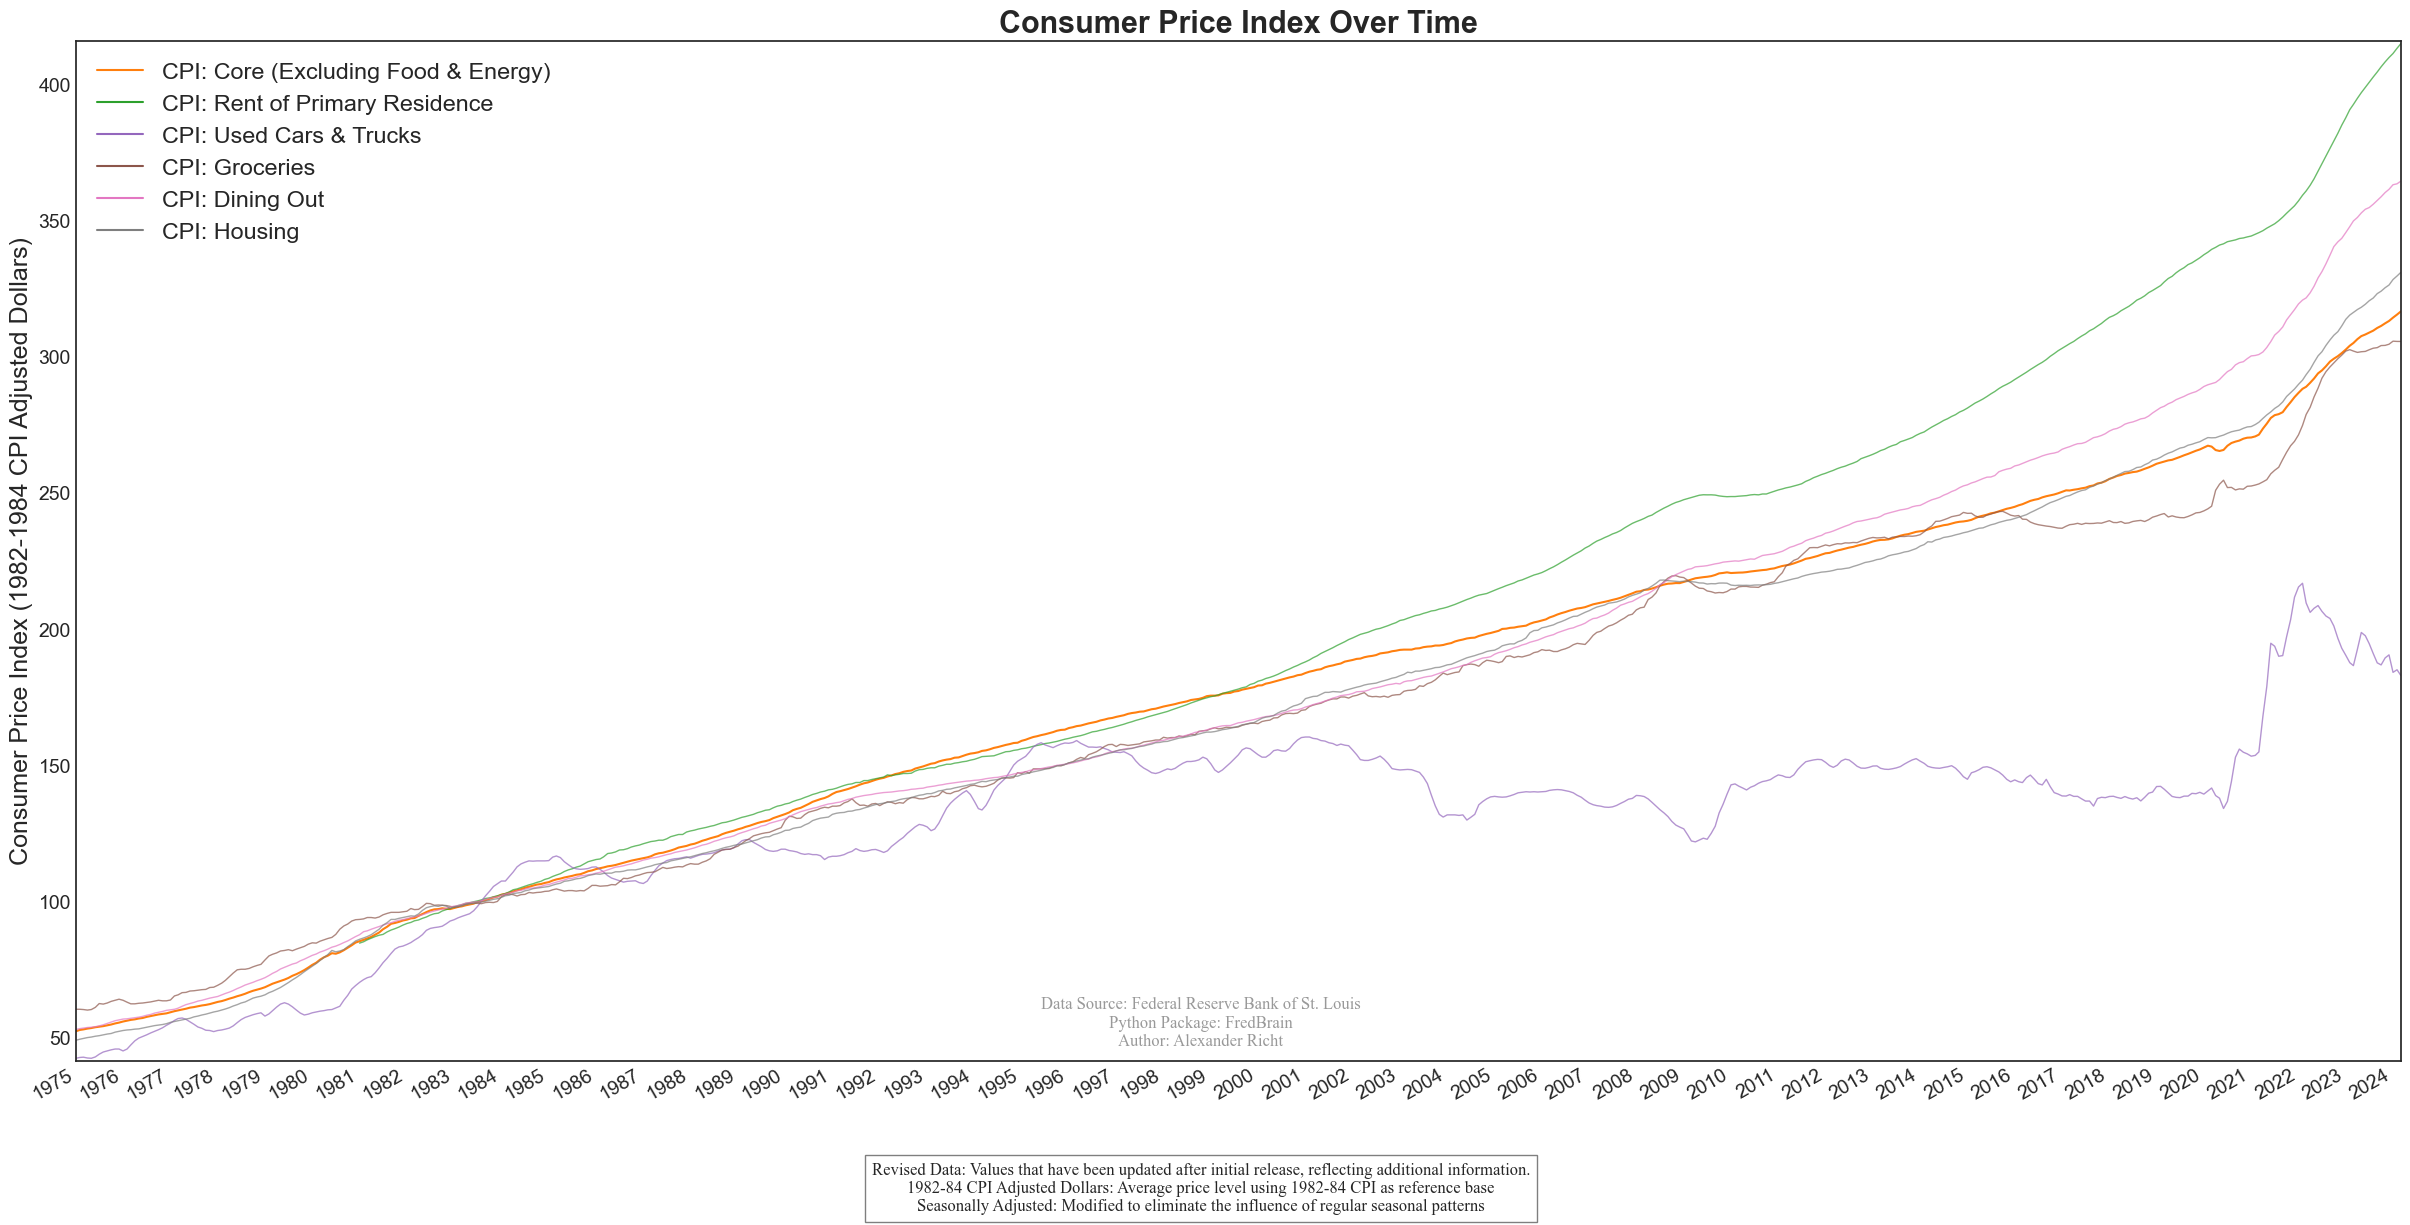

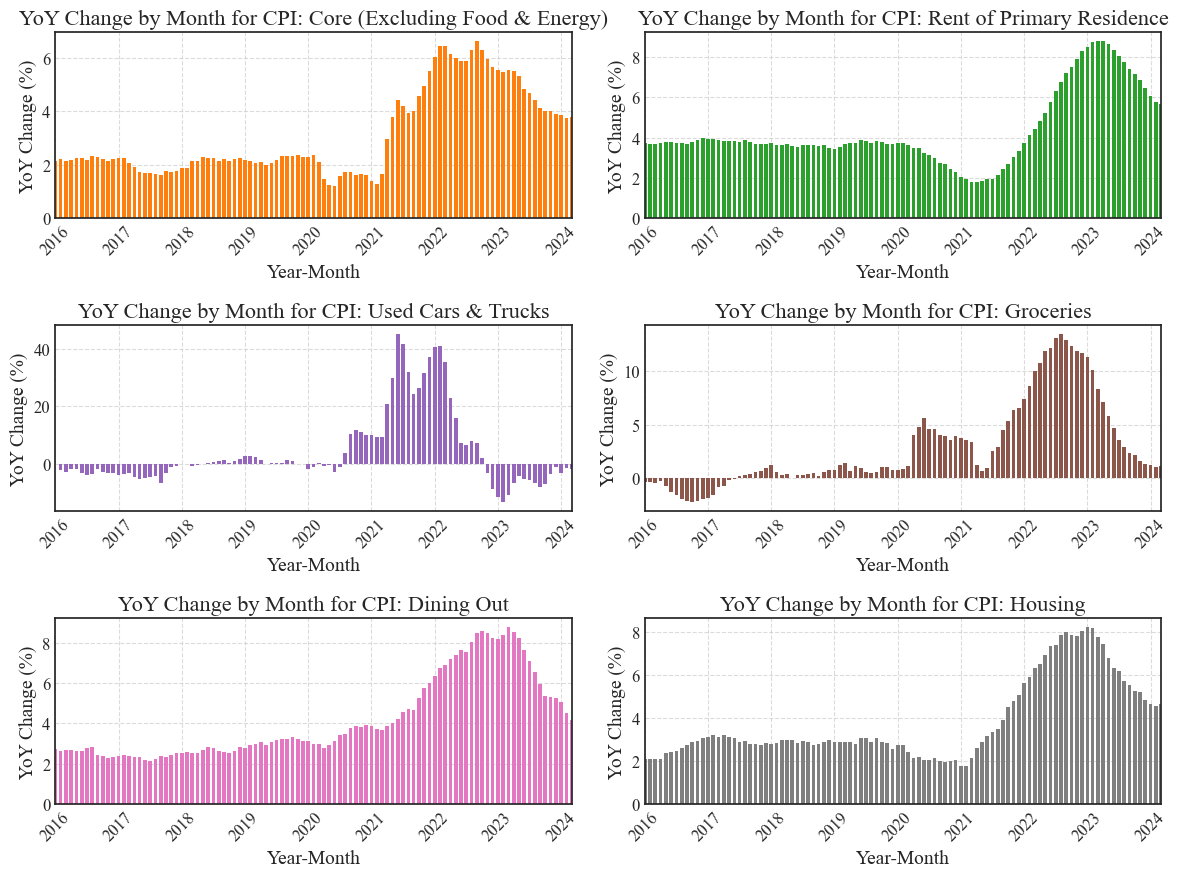

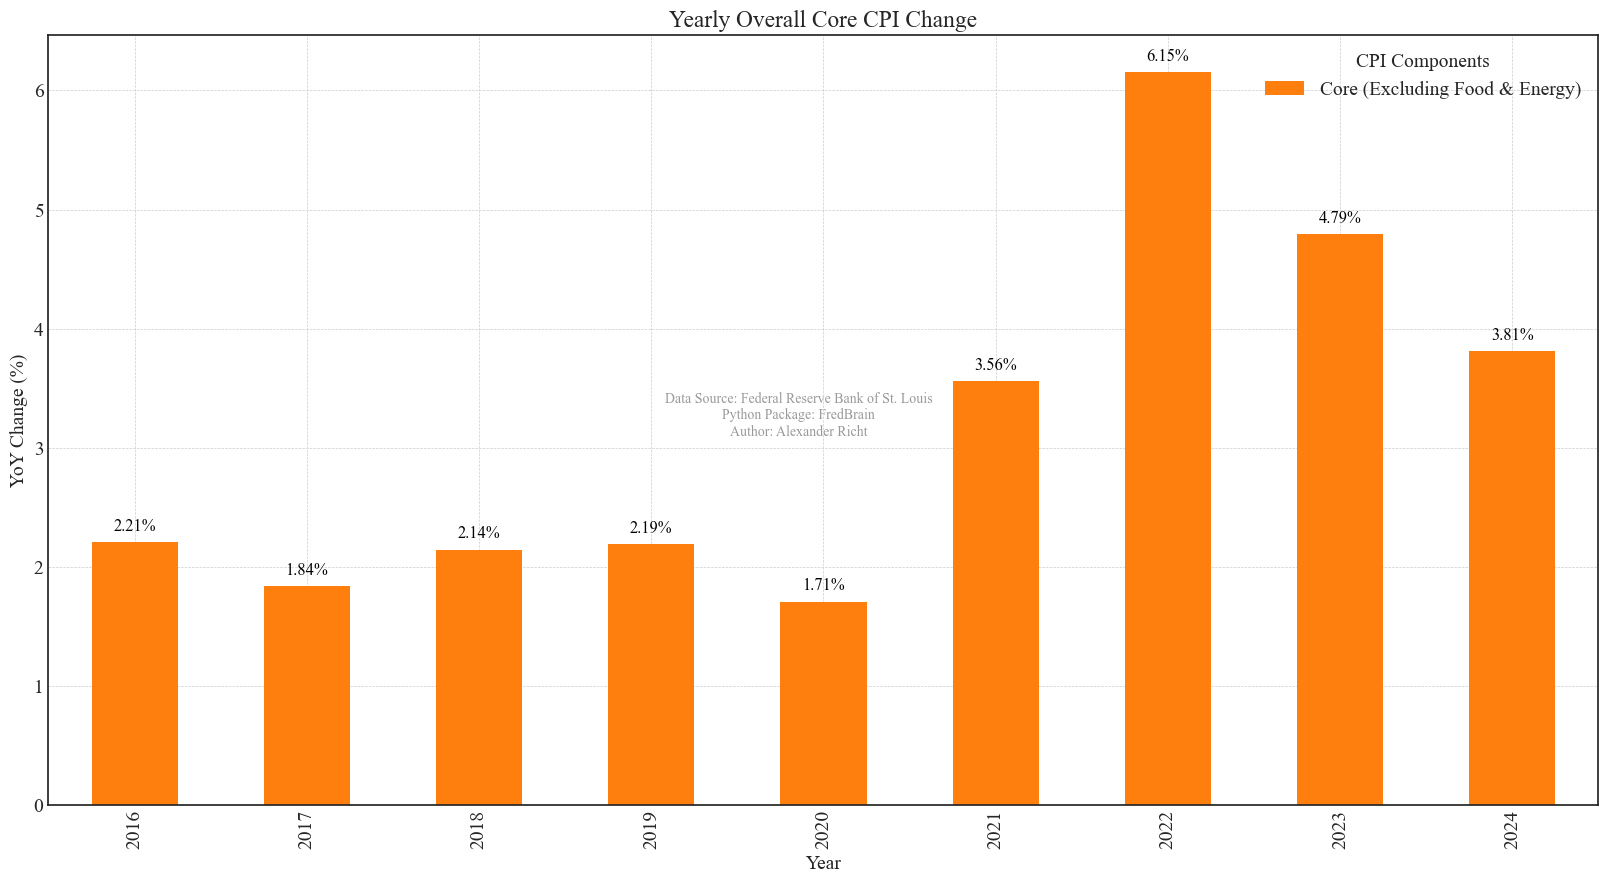

In [66]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('CPILFESL', 'CUSR0000SEHA', 'CUSR0000SETA02', 'CUSR0000SAF11', 'CUSR0000SEFV', 'CPIHOSSL')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)
pd.options.mode.chained_assignment = None  # default='warn'

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

CPILFESL_df = recent_df[recent_df['Series'] == 'CPILFESL']
CUSR0000SEHA_df = recent_df[recent_df['Series'] == 'CUSR0000SEHA']
CUSR0000SETA02_df = recent_df[recent_df['Series'] == 'CUSR0000SETA02']
CUSR0000SAF11_df = recent_df[recent_df['Series'] == 'CUSR0000SAF11']
CUSR0000SEFV_df = recent_df[recent_df['Series'] == 'CUSR0000SEFV']
CPIHOSSL_df = recent_df[recent_df['Series'] == 'CPIHOSSL']

colors = {
    'CPILFESL': '#ff7f0e', 
    'CUSR0000SEHA': '#2ca02c',  
    'CUSR0000SETA02': '#9467bd', 
    'CUSR0000SAF11': '#8c564b', 
    'CUSR0000SEFV': '#e377c2', 
    'CPIHOSSL': '#7f7f7f', 
}

for dataframe, series_name in zip([ CPILFESL_df, CUSR0000SEHA_df, CUSR0000SETA02_df, CUSR0000SAF11_df, CUSR0000SEFV_df, CPIHOSSL_df],
                                  [  'CPILFESL', 'CUSR0000SEHA', 'CUSR0000SETA02', 'CUSR0000SAF11', 'CUSR0000SEFV', 'CPIHOSSL']):
    color = colors[series_name]
    if not dataframe.empty:
        alpha = 1.0 if series_name == 'CPILFESL' else 0.7
        dataframe_sorted = dataframe.sort_values('Reporting Date')
        start_value = dataframe_sorted['Revised Value'].iloc[0]
        end_value = dataframe_sorted['Revised Value'].iloc[-1]
        percent_change = ((end_value - start_value) / start_value) * 100
        plt.plot(dataframe_sorted['Reporting Date'], dataframe_sorted['Revised Value'],
                 color=color, linewidth=1.5 if series_name == 'CPILFESL' else 1.0, alpha=alpha,
                 label=f'{series_name} Revised')


description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "1982-84 CPI Adjusted Dollars: Average price level using 1982-84 CPI as reference base\n"
    "Seasonally Adjusted: Modified to eliminate the influence of regular seasonal patterns"
)

copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

value_range = upper_y_limit - 50
step = value_range * 0.04

visualization_config = {
    'CPILFESL': {
        'color': '#ff7f0e',
        'label': "CPI: Core (Excluding Food & Energy)"
    },
    'CUSR0000SEHA': {
        'color': '#2ca02c',
        'label': "CPI: Rent of Primary Residence"
    },
    'CUSR0000SETA02': {
        'color': '#9467bd',
        'label': "CPI: Used Cars & Trucks"
    },
    'CUSR0000SAF11': {
        'color': '#8c564b',
        'label': "CPI: Groceries"
    },
    'CUSR0000SEFV': {
        'color': '#e377c2',
        'label': "CPI: Dining Out"
    },
    'CPIHOSSL': {
        'color': '#7f7f7f',
        'label': "CPI: Housing"
    }
}


legend_elements = [
    Line2D([0], [0], color=config['color'], lw=1.5, label=config['label'])
    for config in visualization_config.values()
]
plt.legend(handles=legend_elements, loc='upper left', fontsize='large')

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 1
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 1

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Consumer Price Index Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Consumer Price Index (1982-1984 CPI Adjusted Dollars)", fontsize=18, family='Arial')

plt.savefig('Consumer Price Index Over Time.png', format='png', dpi=150)

plt.show()

Indicator_Dataframe['Year'] = Indicator_Dataframe['Reporting Date'].dt.year
Indicator_Dataframe['Month'] = Indicator_Dataframe['Reporting Date'].dt.month
Indicator_Dataframe['Year_Month'] = Indicator_Dataframe['Reporting Date'].dt.to_period('M').astype(str)  # 'YYYY-MM' format

starting_year = Indicator_Dataframe['Year'].max() - 9
recent_df = Indicator_Dataframe[Indicator_Dataframe['Year'] >= starting_year]
recent_df.sort_values(['Series', 'Reporting Date'], inplace=True, ascending=[True, True])

recent_df['YoY Change'] = recent_df.groupby('Series')['Revised Value'].pct_change(periods=12) * 100
recent_df = recent_df[recent_df['Year'] != 2015]

series_names = ['CPILFESL', 'CUSR0000SEHA', 'CUSR0000SETA02', 'CUSR0000SAF11', 'CUSR0000SEFV', 'CPIHOSSL']

# Extracting colors and labels from visualization_config
colors = [visualization_config[series]['color'] for series in series_names]
labels = [visualization_config[series]['label'] for series in series_names]

n_series = len(series_names)
n_cols = 2  
n_rows = (n_series + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 3 * n_rows), tight_layout=True)

axes = axes.flatten()
for i in range(n_series, len(axes)):
    fig.delaxes(axes[i])

for ax, series_name, color, label in zip(axes, series_names, colors, labels):
    series_data = recent_df[recent_df['Series'] == series_name]
    series_data = series_data.sort_values('Year_Month')
    global_min_date = series_data['Year_Month'].min()
    global_max_date = series_data['Year_Month'].max()
    ax.bar(series_data['Year_Month'], series_data['YoY Change'], color=color, label=label, width=0.7)
    ax.set_title(f'YoY Change by Month for {label}', fontsize=16)
    ax.set_xlabel('Year-Month', fontsize=14)
    ax.set_ylabel('YoY Change (%)', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlim([global_min_date, global_max_date])
    ticks = series_data['Year_Month'][series_data['Month'] == 1].tolist()
    labels = series_data['Year'][series_data['Month'] == 1].unique().tolist()
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=45)


plt.savefig('Change of Inflation Last Decade.png', format='png', dpi=150)

plt.show()

def calculate_yoy_changes(df):
    df['Year'] = df['Reporting Date'].dt.year
    df['YoY Change'] = df['Revised Value'].pct_change(periods=12) * 100
    annual_change = df.groupby('Year')['YoY Change'].mean() 
    return annual_change

dataframes = [CPILFESL_df]
names = ['Core (Excluding Food & Energy)']

changes_dict = {}
current_year = pd.Timestamp.now().year
start_year = current_year - 8

for df, name in zip(dataframes, names):
    df.sort_values(['Series', 'Reporting Date'], inplace=True, ascending=[True, True])
    annual_changes = calculate_yoy_changes(df)
    changes_dict[name] = annual_changes[annual_changes.index >= start_year] 

yearly_changes_df = pd.DataFrame(changes_dict)

colors = {
    'Core (Excluding Food & Energy)': '#ff7f0e'}
plot_colors = [colors[name] for name in names]

ax = yearly_changes_df.plot(kind='bar', stacked=False, figsize=(20, 10), color=plot_colors)
plt.title('Yearly Overall Core CPI Change')
plt.xlabel('Year')
plt.ylabel('YoY Change (%)')
plt.legend(title='CPI Components')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

core_cpi_index = names.index('Core (Excluding Food & Energy)')  

num_bars = len(names)
bar_width = ax.patches[0].get_width()

for i, rect in enumerate(ax.patches):
    if (i % num_bars) == core_cpi_index:
        bar_height = rect.get_height()
        x_position = rect.get_x() + rect.get_width() / 2
        y_position = bar_height + (0.01 * max(yearly_changes_df.max()))
        label = f"{bar_height:.2f}%"  # Format the label
        ax.text(x_position, y_position, label, ha='center', va='bottom', color='black', fontsize=12)
plt.text(0.5, 0.5, copyright_notice, fontsize=10, color='gray', ha='center', va='center',
     alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.savefig('YoY Change of Inflation.png', format='png', dpi=150)

plt.show()

## The Corporate Machine

### What is Profit per unit of real gross value added: CPAT with IVA and CC Adjustments
Profit per unit of real gross value added with IVA and CC adjustments is an efficiency or profitability ratio indicating how much profit corporations retain from each dollar of value they produce after being adjusted for key economic factors.

Essentially, it answers the question: For every dollar of inflation adjusted value a company creates from making and selling its products or services, how many cents does it actually keep as profit, after adjustments for changes in stock value, equipment/building wear, and taxes?

### The Components

- **Corporate Profits After Tax (CPAT):** Profits earned by corporations after accounting for taxes.
- **Inventory Valuation Adjustment (IVA):** Adjustments made to account for changes in the value of inventories held by businesses which arise during periods of inflation or deflation which can affect reported profits with the aim of making profits reflect a more realistic cost of goods sold under current economic conditions.
- **Capital Consumption Adjustment (CCAdj):** A depreciation adjustment which modifies the gross profits to reflect the depreciation (wear & tear) of physical assets used by corporation to provide a clearer view of profits from current production.
- **Real Gross Value Added (GVA):** The inflation adjusted value of goods and services produced.
- **Profit per Unit of Real GVA:** This ratio divides the adjusted corporate profits (after tax, with IVA and CCAdj) by the inflation adjusted real gross value added, providing insight into the efficiency and profitability of corporations.

### Profit Steaming Ahead

Over the years, corporate profits have not only increased in nominal terms but also shown a significant upward trend when adjusting for inflation or other economic factors. This growth highlights the effective management and operational efficiencies achieved by corporations that has allowed them to navigate the economic landscape, leveraging technology and innovation to enhance their profitability per unit of value added.

However, in stark contrast, the growth in personal incomes, when adjusted for inflation, has been much slower resulting in uneven corporate wealth accumulation over time. This inequality can lead to reduced economic mobility and increased social polorization as only a smaller percentage of the population ultimately benefit from economic growth and the rest are feeling left behind as corporate profit growth exponentially outpaces personal income growth. 

### The Profit Pie
Inequality is multifaceted with no simple or straight forward answer. Effective economic and social strategies must strike the balance between encouraging investment and innovation and ensuring that workers in society benefit fairly from economic growth. 
This is a difficult balance to achieve and as shown, corporations have achieved impressive efficiencies and profit margins, while the broader base of workers and consumers have not enjoyed equal benefits in terms of income growth. 

This situation calls for a holistic approach in economic policymaking, focusing not just on business success but also on the welfare and income growth of the general population to sustain long-term economic health and social stability and foster a stable, prosperous society where the "profit pie" is shared more equitably among its contributors.

<sup id="a1">[1](#f1)</sup> Personal Income refers to the total compensation received by individuals or households

In [ ]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('A466RD3Q052SBEA', 'A053RC1Q027SBEA', 'FCTAX', 'LES1252881600Q', 'A4102C1Q027SBEA', 'A08139USA052NNBR', 'CPILFESL', 'PI', 'MEPAINUSA646N')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)
pd.options.mode.chained_assignment = None  # default='warn'

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

A466RD3Q052SBEA_df = recent_df[recent_df['Series'] == 'A466RD3Q052SBEA']
A053RC1Q027SBEA_df = recent_df[recent_df['Series'] == 'A053RC1Q027SBEA']
CPILFESL_df = recent_df[recent_df['Series'] == 'CPILFESL']
LES1252881600Q_df = recent_df[recent_df['Series'] == 'LES1252881600Q']
A4102C1Q027SBEA_df = recent_df[recent_df['Series'] == 'A4102C1Q027SBEA']
A08139USA052NNBR_df = recent_df[recent_df['Series'] == 'A08139USA052NNBR']
MEPAINUSA646N_df = recent_df[recent_df['Series'] == 'MEPAINUSA646N']
PI_df = recent_df[recent_df['Series'] == 'PI']

colors = {
    'A466RD3Q052SBEA': '#ff7f0e',  
    'A053RC1Q027SBEA': '#2ca02c',  
    'FCTAX': '#9467bd', 
    'LES1252881600Q': '#8c564b', 
    'A4102C1Q027SBEA': '#e377c2', 
    'A08139USA052NNBR': '#7f7f7f', 
    'MEPAINUSA646N': 'black',
    'PI': 'silver'
}

def adjusted_annotation_position(df, current_index, default_offset_y, max_attempts=10):
    """ Dynamically adjust the vertical position to avoid overlapping annotations. """
    step = default_offset_y / 5
    current_y = df['Revised Value'].iloc[current_index] + default_offset_y
    attempt = 0
    while attempt < max_attempts:
        overlapping = df.iloc[:current_index][(df['Reporting Date'].iloc[:current_index] - df['Reporting Date'].iloc[current_index]).abs() < pd.Timedelta(days=365)]
        if not overlapping.empty:
            if (overlapping['Revised Value'] + default_offset_y).between(current_y - step, current_y + step).any():
                current_y += step 
        attempt += 1
    return current_y
    
used_positions = []  

for dataframe, series_name in zip([  A466RD3Q052SBEA_df],
                                  [ 'A466RD3Q052SBEA']):
    color = colors[series_name]
    if not dataframe.empty:
        alpha = 1.0 if series_name == 'CPILFESL' else 0.7
        dataframe_sorted = dataframe.sort_values('Reporting Date')
        start_value = dataframe_sorted['Revised Value'].iloc[0]
        end_value = dataframe_sorted['Revised Value'].iloc[-1]
        percent_change = ((end_value - start_value) / start_value) * 100
        plt.plot(dataframe_sorted['Reporting Date'], dataframe_sorted['Revised Value'], color='steelblue', linewidth=2, label='Revised Value')
        plt.plot(dataframe_sorted['Reporting Date'], dataframe_sorted['Unrevised Value'], color='gray', linewidth=2, linestyle='--', label='Unrevised Value')
        annotation_x = dataframe_sorted['Reporting Date'].iloc[-1]
        annotation_y = dataframe_sorted['Revised Value'].iloc[-1]
        offset_x = 20  
        offset_y = dataframe_sorted['Revised Value'].std() * 0.5  
        adjusted_y = adjusted_annotation_position(dataframe_sorted, -1, offset_y) 
        plt.annotate(f"Adjusted Profit Growth {percent_change:.0f}%", 
                     xy=(annotation_x, annotation_y),
                     xytext=(annotation_x - pd.Timedelta(days=offset_x), adjusted_y),
                     textcoords="data",
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='steelblue'),
                     bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='steelblue', alpha=0.75),
                     fontsize=12, ha='right', va='bottom')
        plt.legend(loc='upper left', fontsize='large', framealpha=0.9)


description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "IVA & CC Adjustments: Eliminate impact of Inflation & Depreciation.\n"
    "Seasonally Adjusted: Modified to eliminate the influence of regular seasonal patterns"
)

copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

    
def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = .2
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min()

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

formatter = ticker.StrMethodFormatter('${x:,.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.75, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("IVA & CC Adjusted CPAT per Unit of Real Gross Value Added", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Corporate Profit per Unit of Real Gross Value Added", fontsize=18, family='Arial')

plt.savefig('Corporate Profit per Unit of Real Gross Value Added.png', format='png', dpi=150)

plt.show()

plt.figure(figsize=(30, 15))

for dataframe, series_name in zip([  A053RC1Q027SBEA_df],
                                  [ 'A053RC1Q027SBEA']):
    color = colors[series_name]
    if not dataframe.empty:
        alpha = 1.0 if series_name == 'CPILFESL' else 0.7
        dataframe_sorted = dataframe.sort_values('Reporting Date')
        start_value = dataframe_sorted['Revised Value'].iloc[0]
        end_value = dataframe_sorted['Revised Value'].iloc[-1]
        percent_change = ((end_value - start_value) / start_value) * 100
        plt.plot(dataframe_sorted['Reporting Date'], dataframe_sorted['Revised Value'], color='steelblue', linewidth=2, label='Revised Value')
        plt.plot(dataframe_sorted['Reporting Date'], dataframe_sorted['Unrevised Value'], color='gray', linewidth=2, linestyle='--', label='Unrevised Value')
        annotation_x = dataframe_sorted['Reporting Date'].iloc[-1]
        annotation_y = dataframe_sorted['Revised Value'].iloc[-1]
        offset_x = 20  
        offset_y = dataframe_sorted['Revised Value'].std() * 0.5  
        adjusted_y = adjusted_annotation_position(dataframe_sorted, -1, offset_y) 


def thousands_formatter(x, pos):
    return f'{x / 1000:.2f}T'

def calculate_offset(value, fig, dpi, offset_factor=0.005, max_offset=20):
    data_ratio = (fig.get_figheight() * dpi) / (fig.get_figwidth() * dpi)
    calculated_offset = value * offset_factor if data_ratio < 1 else value * offset_factor * data_ratio
    return min(calculated_offset, max_offset) 

A053RC1Q027SBEA_df['Value Change'] = A053RC1Q027SBEA_df['Revised Value'].diff()

threshold = A053RC1Q027SBEA_df['Value Change'].std() * 2

legend_elements = [Line2D([0], [0], color='gray', lw=2, label='Revised Value'),
                   Line2D([0], [0], color='gray', lw=2, ls='--', label='Unrevised Value')]
first_legend = plt.legend(handles=legend_elements, loc='upper left', fontsize='large', framealpha=0.9)
plt.gca().add_artist(first_legend)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

for i in range(1, len(A053RC1Q027SBEA_df)):
    if abs(A053RC1Q027SBEA_df.iloc[i]['Value Change']) > threshold:
        direction = np.sign(A053RC1Q027SBEA_df.iloc[i]['Value Change'])
        offset = calculate_offset(A053RC1Q027SBEA_df.iloc[i]['Revised Value'], plt.gcf(), plt.gcf().dpi)
        xytext = (5, offset * direction)
        plt.annotate(
            f"{A053RC1Q027SBEA_df.iloc[i]['Revised Value']/1000:,.2f} Trillion",
            xy=(A053RC1Q027SBEA_df.iloc[i]['Reporting Date'], A053RC1Q027SBEA_df.iloc[i]['Revised Value']),
            xytext=xytext,
            textcoords="offset points",
            ha='center',
            va='bottom' if direction > 0 else 'top',
            arrowprops=dict(arrowstyle="-", color='black'),
            bbox=dict(boxstyle="round,pad=0.1", facecolor='white', edgecolor='black', alpha=0.7)
        )

plt.xlim(left=A053RC1Q027SBEA_df['Reporting Date'].min(), right=A053RC1Q027SBEA_df['Reporting Date'].max())
upper_y_limit = A053RC1Q027SBEA_df[['Revised Value', 'Unrevised Value']].max().max()
bottom_y_limit = A053RC1Q027SBEA_df[['Revised Value', 'Unrevised Value']].min().min()

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.75, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Corporate Profits Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Corporate Profits (Trillions)", fontsize=18, family='Arial')

plt.savefig('Corporate Profits Over Time.png', format='png', dpi=150)

plt.show()

def calculate_yoy_changes(df):
    df['Year'] = df['Reporting Date'].dt.year
    df.loc[df['Series Frequency'] == 'Monthly', 'YoY Change'] = df.loc[df['Series Frequency'] == 'Monthly', 'Revised Value'].pct_change(periods=12) * 100
    df.loc[df['Series Frequency'] == 'Quarterly', 'YoY Change'] = df.loc[df['Series Frequency'] == 'Quarterly', 'Revised Value'].pct_change(periods=4) * 100
    df.loc[df['Series Frequency'] == 'Annual', 'YoY Change'] = df.loc[df['Series Frequency'] == 'Annual', 'Revised Value'].pct_change(periods=1) * 100
    annual_change = df.groupby('Year')['YoY Change'].mean() 
    return annual_change

dataframes = [A053RC1Q027SBEA_df, CPILFESL_df]
names = ['Corporate Profits Over Time', 'CPI Core Over Time']

changes_dict = {}
current_year = pd.Timestamp.now().year
start_year = current_year - 30

for df, name in zip(dataframes, names):
    df.sort_values(['Series', 'Reporting Date'], inplace=True, ascending=[True, True])
    annual_changes = calculate_yoy_changes(df)
    changes_dict[name] = annual_changes[annual_changes.index >= start_year]

yearly_changes_df = pd.DataFrame(changes_dict)

bar_width = 0.35
index = np.arange(len(yearly_changes_df))

fig, ax = plt.subplots(figsize=(30, 15))
bar1 = ax.bar(index - bar_width / 2, yearly_changes_df['CPI Core Over Time'], bar_width, label='Core CPI Over Time', color='#ff7f0e')
bar2 = ax.bar(index + bar_width / 2, yearly_changes_df['Corporate Profits Over Time'], bar_width, label='Corporate Profits Over Time', color='gray')

ax.set_xlabel('Year')
ax.set_ylabel('YoY Change (%)')
ax.set_title('Yearly Changes in Corporate Profits and Cumulative Profits')
ax.set_xticks(index)
ax.set_xticklabels(yearly_changes_df.index, rotation=45)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

def add_labels(bars):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if abs(height) < 2.5: 
            continue 
        offset = 10 if i % 2 == 0 else -10
        annotation_position = (0, offset) if height > 0 else (0, offset - 10)
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=annotation_position,
                    textcoords="offset points",
                    ha='center',
                    va='bottom' if height > 0 else 'top',
                    fontsize=9,
                    color='black',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.75))

add_labels(bar1)
add_labels(bar2)
plt.text(0.6, 0.2, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
     alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.savefig('Corporate Profits vs. CPI.png', format='png', dpi=150)

plt.show()

plt.figure(figsize=(30, 15))

dataframes = [A053RC1Q027SBEA_df, CPILFESL_df, MEPAINUSA646N_df, PI_df]
names = ['Corporate Profits Over Time', 'CPI Core Over Time', 'Median Personal Income Over Time', 'Personal Income' ]
changes_dict = {}
current_year = pd.Timestamp.now().year
start_year = current_year - 30

for df, name in zip(dataframes, names):
    df.sort_values(['Series', 'Reporting Date'], inplace=True, ascending=[True, True])
    annual_changes = calculate_yoy_changes(df)
    changes_dict[name] = annual_changes[annual_changes.index >= start_year]

yearly_changes_df = pd.DataFrame(changes_dict)

yearly_changes_df['Cumulative Growth Corporate Profits'] = yearly_changes_df['Corporate Profits Over Time'].cumsum()
yearly_changes_df['Cumulative Growth Core CPI'] = yearly_changes_df['CPI Core Over Time'].cumsum()
yearly_changes_df['Median Personal Income Over Time'] = yearly_changes_df['Median Personal Income Over Time'].cumsum()
yearly_changes_df['Personal Income'] = yearly_changes_df['Personal Income'].cumsum()

ax = yearly_changes_df['Cumulative Growth Corporate Profits'].plot(color='gray', marker='o', linewidth=2, figsize=(30, 15), label='Cumulative Corporate Profit Growth')
ax1 = yearly_changes_df['Cumulative Growth Core CPI'].plot(color='#ff7f0e', marker='o', linewidth=2, figsize=(30, 15), label='Cumulative Growth Core CPI')
ax4 = yearly_changes_df['Median Personal Income Over Time'].plot(color='black', marker='o', linewidth=2, figsize=(30, 15), label='Cumulative Median Personal Income Growth')
ax5 = yearly_changes_df['Personal Income'].plot(color='green', marker='o', linewidth=2, figsize=(30, 15), label='Cumulative Personal Income Growth')

plt.title('Cumulative Corporate Profit Change')
plt.xlabel('Year')
plt.ylabel('Cumulative Change (%)')
plt.legend( title_fontsize='13', fontsize='12', loc='best')
cumulative_max = yearly_changes_df['Cumulative Growth Corporate Profits'].max()
cumulative_min = yearly_changes_df['Cumulative Growth Corporate Profits'].min()
plt.ylim(- 10, cumulative_max + 10) 
plt.xlim(left=yearly_changes_df.index.min(), right=yearly_changes_df.index.max())


for x, y in zip(yearly_changes_df.index, yearly_changes_df['Cumulative Growth Corporate Profits']):
    label = f"{y:.2f}%"
    plt.annotate(label, 
                 (x, y),  
                 textcoords="offset points", 
                 xytext=(0,10),  
                 ha='center') 

for x, y in zip(yearly_changes_df.index, yearly_changes_df['Cumulative Growth Core CPI']):
    label = f"{y:.2f}%"
    plt.annotate(label, 
                 (x, y),  
                 textcoords="offset points", 
                 xytext=(0,10),  
                 ha='center')  

plt.text(0.5, 0.75, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
     alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.savefig('Cumulative Growth Comparison Over Time.png', format='png', dpi=150)

plt.show()

## Wealth Inequality: Fact or Fiction?
Society has long grappled with the existence of inequality, a force that has historically sparked significant revolutions and shifts in societal structures — from monarchies to communism, democracy, and socialism.

But where does society stand today? Have we progressed toward a more equitable and fair future, or does the vast majority of wealth still reside in the hands of a select few? 

### An Index of Inequality: The GINI Coefficient
The GINI Coefficient serves as a statistical measure of distribution and is commonly used by economists to gauge economic inequality within a population by measuring income or wealth disparity. The coefficient ranges from 0 to 1, where 0 signifies perfect equality (everyone has the same income or wealth), and 1 denotes perfect inequality (one person has all the income or wealth, and all others have none).

#### Insights from the GINI Graphs

**GINI Index Over Time:** As shown, there has been a fluctuating yet upward trend since the mid-1970s, suggesting that wealth inequality has increased, despite occasional dips. Notably, the upward spikes and dips reflect economic cycles, policy changes (such as Reagonomics - otherwise knowns as the Economic Recovery Tax Act of 1981), or shifts in wealth accumulation and distribution dynamics within the economy.

**Income GINI Ratio Over Time:** The steady increase signals that income distribution has become more uneven over the decades, with income inequality intensifying steadily among the higher income brackets as overall wealth distribution has declined.

The rising GINI coefficients captured in these graphs underscore a growing inequality within American society, presenting an argument that existing political and economic policies have disproportionately benefited a concentrated group of individuals. Balancing the incentives for entrepreneurs and high-performers and the overall economy is difficult to get right, but the GINI coefficient developments below paint a picture that politicians and economists need to take action to ensure the broader group of economic participants feel supported rather than exploited. Policies need to foster an environment where innovation and enterprise can thrive while ensuring that the economic gains are distributed in a way that benefits a wide range of participants and sustains long-term economic health and stability.

High inequality can limit economic growth by constraining the consumer base and reducing aggregate demand for goods and services. It can hinder investment in human capital and technological innovation, as a smaller portion of the population can afford to invest in education and entrepreneurial endeavors that ultimately drive an economy to the future.

#### The Great Divergence

Starkingly, the following three graphs show how much of an impact shifts in wealth distribution dynamics have had on the difference incomes bracket segments. Since 1980, The top 1% saw a 7.5% increase (a 33% marginal increase) in their share of total net wealth, while the 50th to 90th wealth percentiles say a -5.1% decrease (a -14% marginal decrease) in their share of total net worth and the bottom 50th percentile experienced a -1% decrease (a -29% marginal decrease) in thier share of total net worth. 

The top 1% of wealth holders has continued to accumulate wealth at a much faster rate than everyone else, demonstrating a stark contrast in economic gains across different portions of the population.

#### Implications of Growing Wealth Inequality
The data visualized here offers a clear and disturbing picture of growing wealth inequality in the United States. This disparity has several critical implications for American society:

- Economic Power and Political Influence: When wealth concentrates in the hands of a small elite, economic power and political influence becomes imbalanced, leading to policies that further entrench their wealth and power and gatekeep the economic mobility of others.
- Lack of Economic Mobility: Significant disparities in wealth accumulation hamper economic mobility making it increasingly difficult for lower income brackets to climb the ladder towards higher income brackets.
- Social Stratification: Wealth inequality leads to social stratification, where divides between the wealthy and the poor become entrenched not only financially but also in access to education, healthcare, and quality of life.
- Economic Stability: High levels of inequality can contribute to economic instability. When wealth is concentrated at the top, the broader consumer base—necessary for sustaining economic growth through spending—is weakened, potentially leading to slower economic growth and increased susceptibility to economic downturns.

Without interventions by politicans and economists, the trend of escalating inequality is likely to continue, exacerbating social divisions and undermining the democratic and economic foundations upon which America was founded.


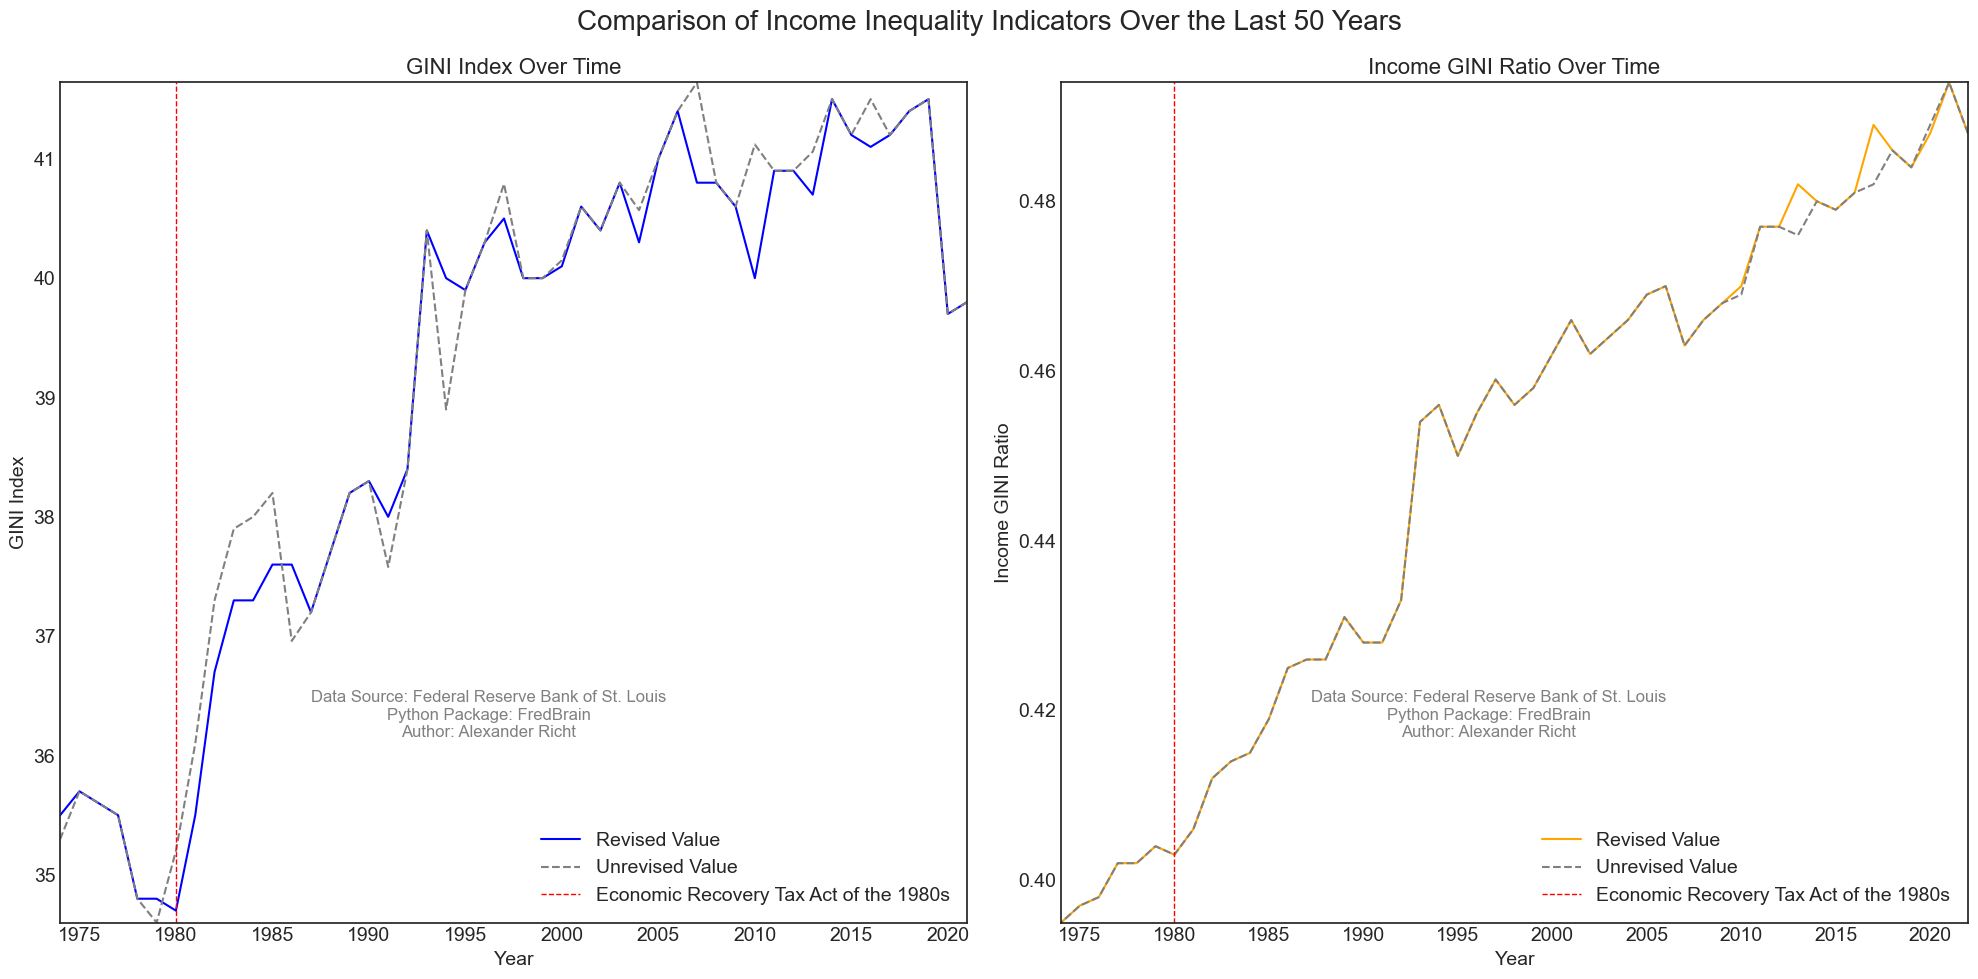

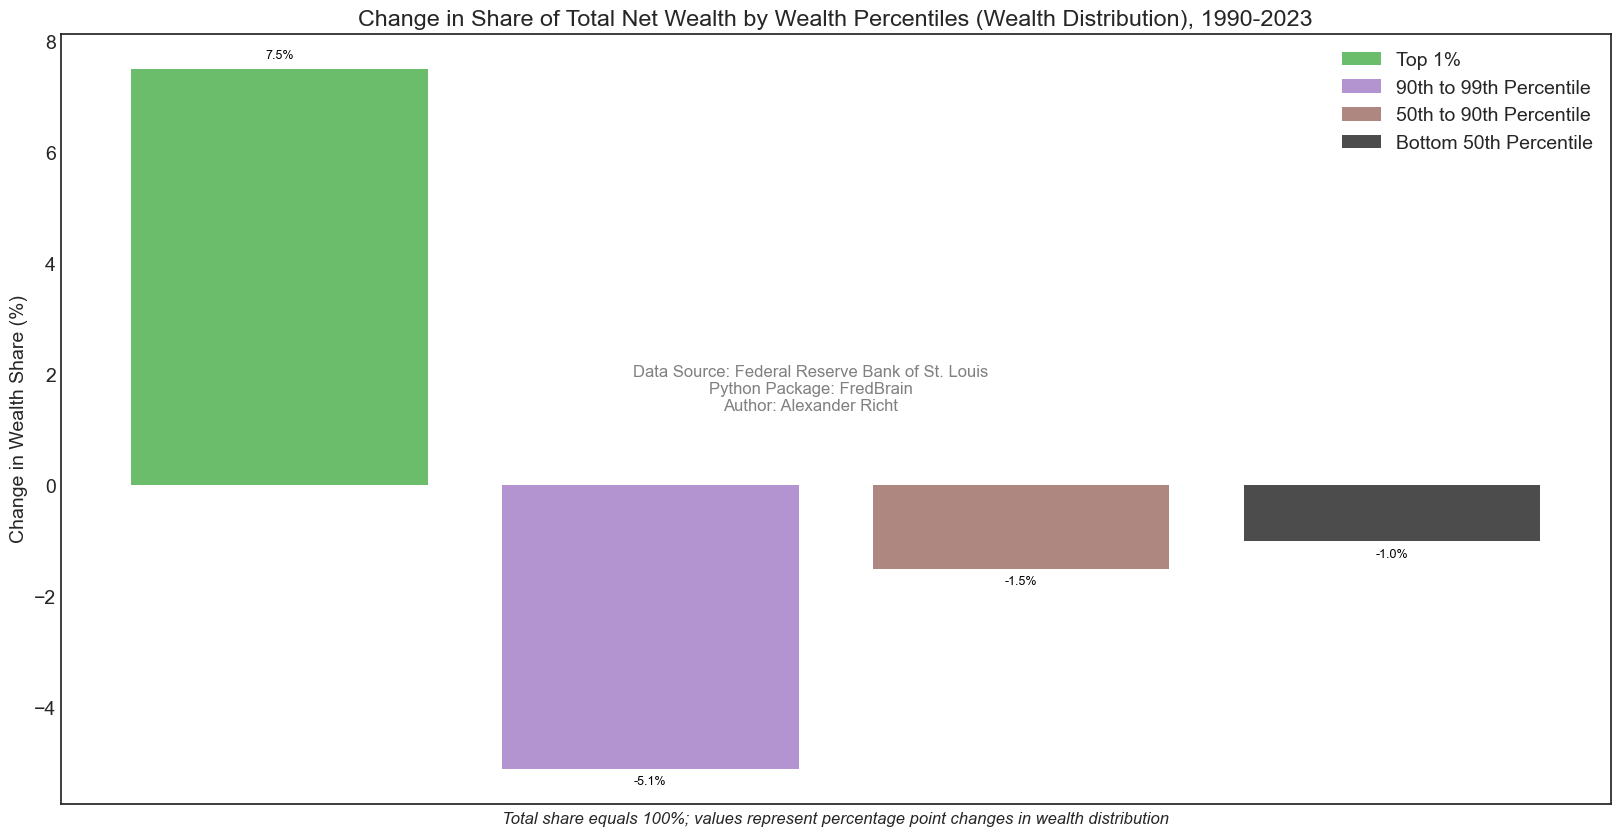

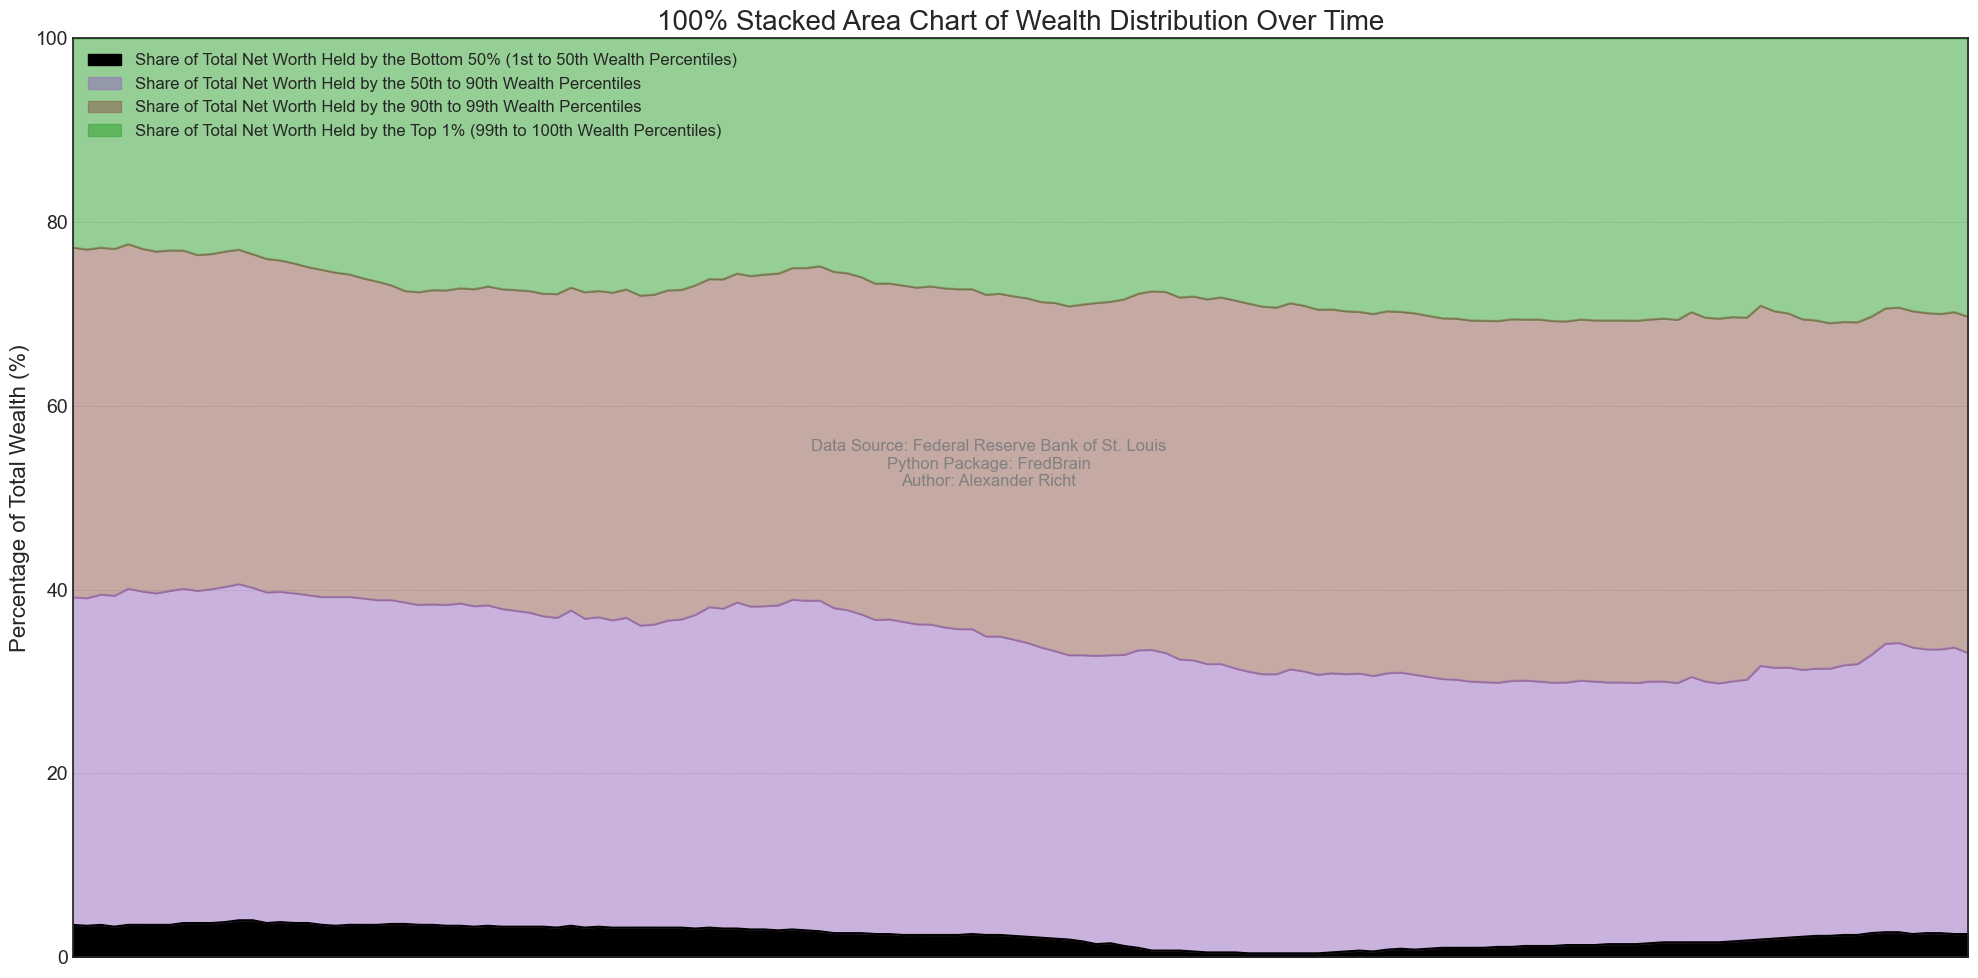

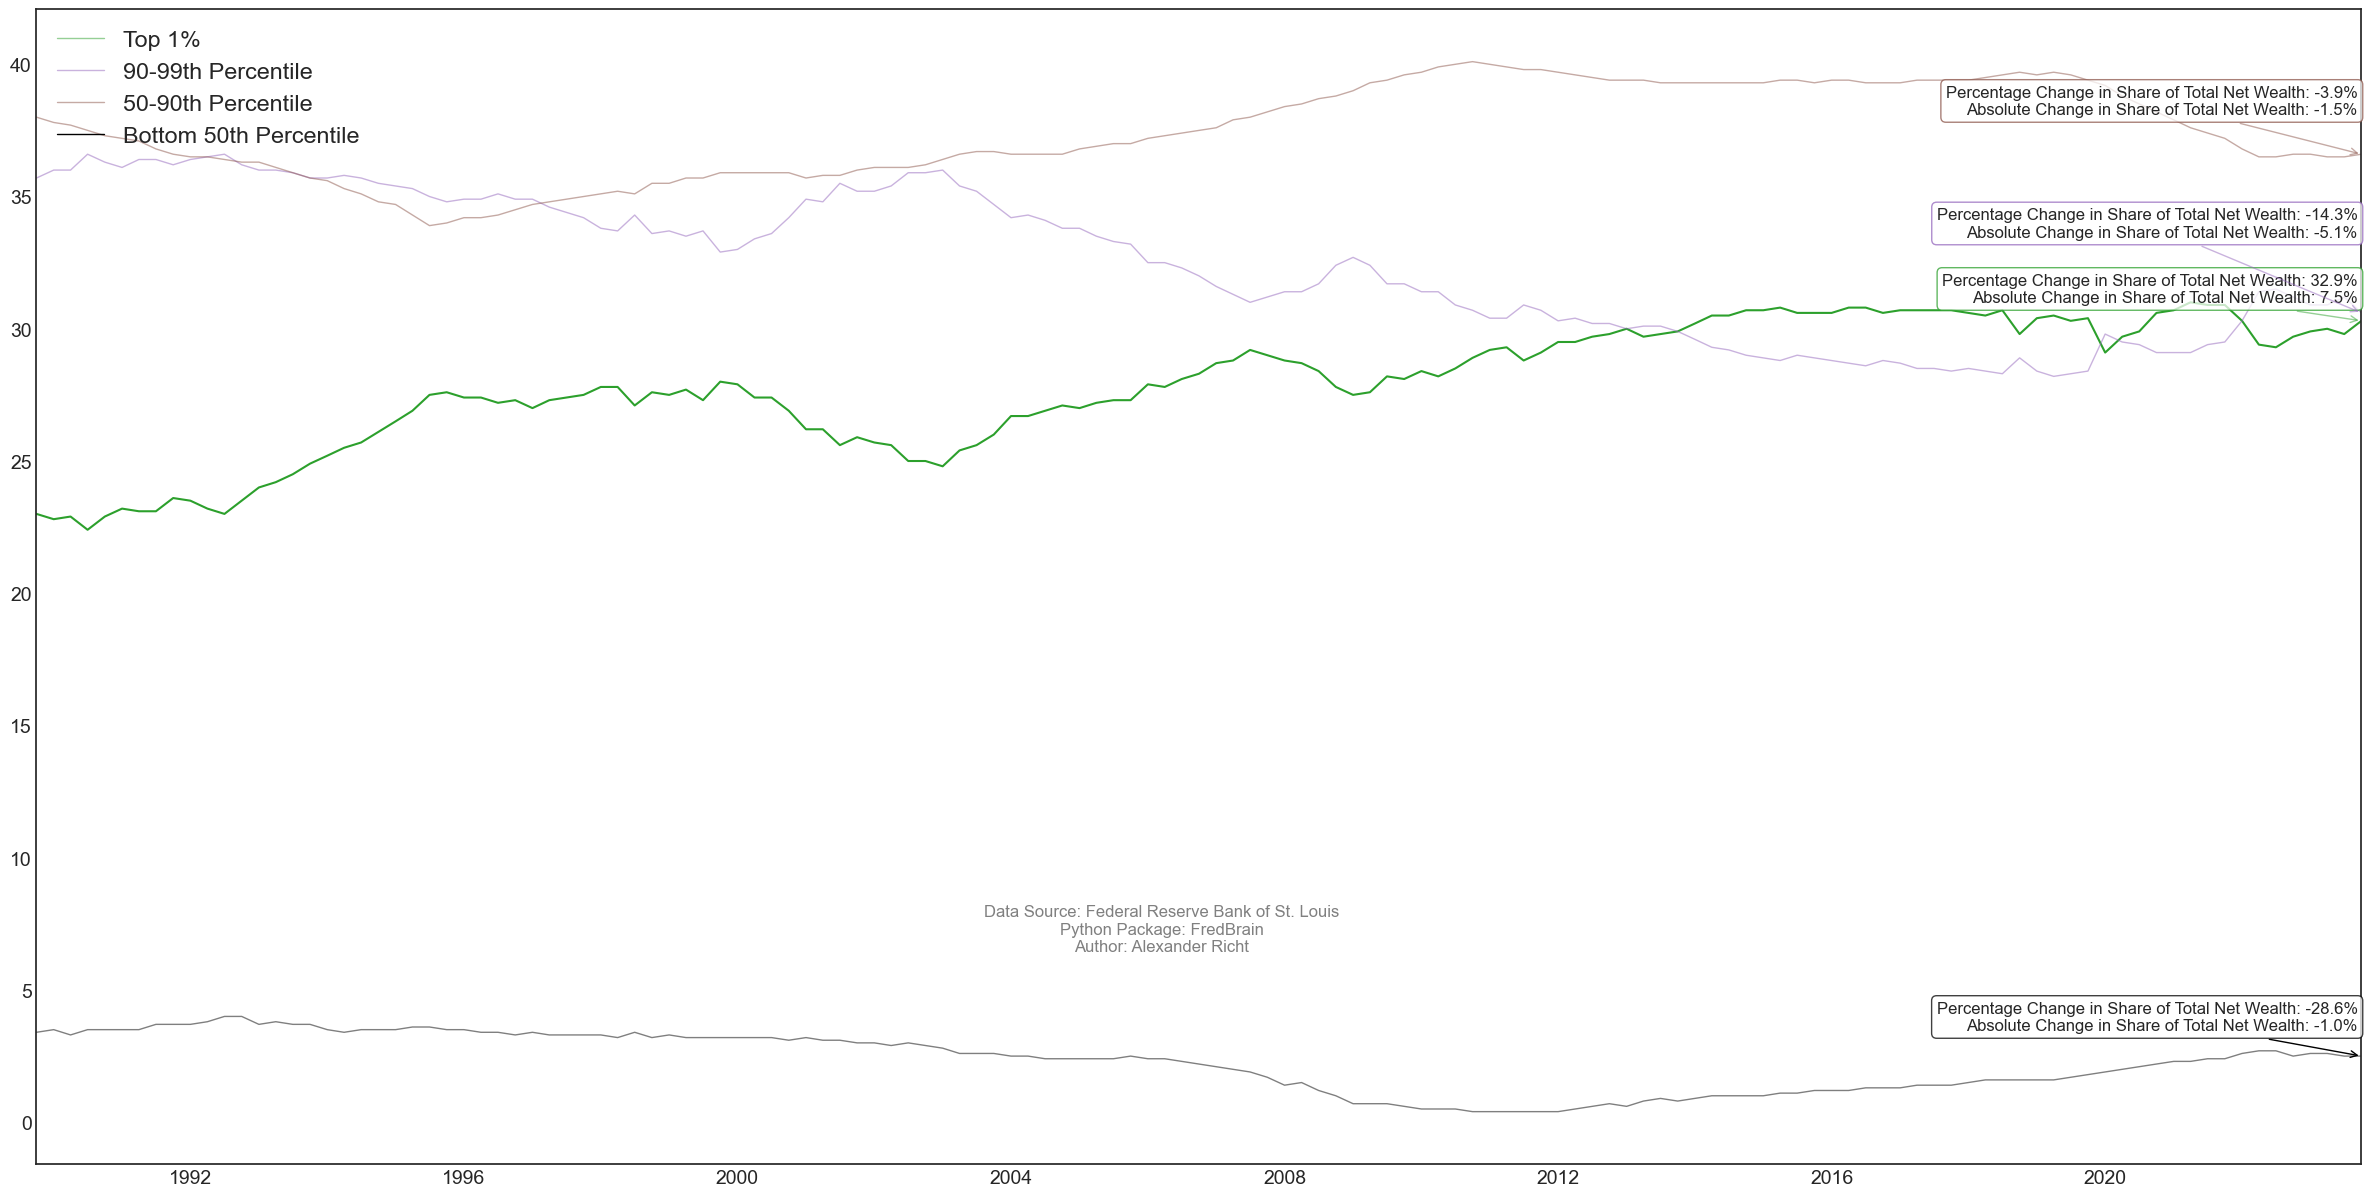

In [32]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('SIPOVGINIUSA', 'GINIALLRH', 'WFRBST01134', 'WFRBSN40188', 'WFRBSN09161', 'WFRBSB50215')"
db_manager = mysql.connector.connect(host=DATABASE_HOST, user=DATABASE_USERNAME, passwd=DATABASE_PASSWORD, db=DATABASE_NAME)
cursor = db_manager.cursor()
cursor.execute(Data_Query)

Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "IVA & CC Adjustments: Eliminate impact of Inflation & Depreciation.\n"
    "Seasonally Adjusted: Modified to eliminate the influence of regular seasonal patterns"
)

copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)


SIPOVGINIUSA_df = recent_df[recent_df['Series'] == 'SIPOVGINIUSA']
GINIALLRH_df = recent_df[recent_df['Series'] == 'GINIALLRH']
WFRBST01134_df = recent_df[recent_df['Series'] == 'WFRBST01134']
WFRBSN40188_df = recent_df[recent_df['Series'] == 'WFRBSN40188']
WFRBSN09161_df = recent_df[recent_df['Series'] == 'WFRBSN09161']
WFRBSB50215_df = recent_df[recent_df['Series'] == 'WFRBSB50215']

colors = {
    'SIPOVGINIUSA': '#1f77b4',     
    'GINIALLRH': '#ff7f0e80',
    'WFRBST01134': '#2ca02c80',
    'WFRBSN40188': '#9467bd80',
    'WFRBSN09161': '#8c564b80',
    'WFRBSB50215': 'black',
}

def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))  # Reduced figure size
fig.suptitle('Comparison of Income Inequality Indicators Over the Last 50 Years', fontsize=20)
ax1.plot(SIPOVGINIUSA_df['Reporting Date'], SIPOVGINIUSA_df['Revised Value'], color='blue', label='Revised Value')
ax1.plot(SIPOVGINIUSA_df['Reporting Date'], SIPOVGINIUSA_df['Unrevised Value'], color='gray', linestyle='--', label='Unrevised Value')

ax2.plot(GINIALLRH_df['Reporting Date'], GINIALLRH_df['Revised Value'], color='orange', label='Revised Value')
ax2.plot(GINIALLRH_df['Reporting Date'], GINIALLRH_df['Unrevised Value'], color='gray', linestyle='--', label='Unrevised Value')

ax1.set_title('GINI Index Over Time', fontsize=16)
ax1.set_xlim(left=SIPOVGINIUSA_df['Reporting Date'].min(), right=SIPOVGINIUSA_df['Reporting Date'].max())
upper_y_limit = SIPOVGINIUSA_df[['Revised Value', 'Unrevised Value']].max().max()
bottom_y_limit = SIPOVGINIUSA_df[['Revised Value', 'Unrevised Value']].min().min()

ax1.set_ylim(bottom=bottom_y_limit, top=upper_y_limit)
ax1.set_xlabel('Year')
ax1.set_ylabel('GINI Index')

ax2.set_title('Income GINI Ratio Over Time', fontsize=16)
ax2.set_xlim(left=GINIALLRH_df['Reporting Date'].min(), right=GINIALLRH_df['Reporting Date'].max())
upper_y_limit = GINIALLRH_df[['Revised Value', 'Unrevised Value']].max().max()
bottom_y_limit = GINIALLRH_df[['Revised Value', 'Unrevised Value']].min().min()
ax2.set_ylim(bottom=bottom_y_limit, top=upper_y_limit)
ax2.set_xlabel('Year')
ax2.set_ylabel('Income GINI Ratio')

ax1.axvline(pd.Timestamp('1980-01-01'), color='red', linestyle='--', lw=1, label='Economic Recovery Tax Act of the 1980s')
ax2.axvline(pd.Timestamp('1980-01-01'), color='red', linestyle='--', lw=1, label='Economic Recovery Tax Act of the 1980s')
ax1.legend()
ax2.legend()

fig.text(0.25, 0.25, copyright_notice, ha='center', va='bottom', fontsize=12, color='gray')
fig.text(0.75, 0.25, copyright_notice, ha='center', va='bottom', fontsize=12, color='gray')

ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

plt.tight_layout()
plt.show()

dataframes = [WFRBST01134_df, WFRBSN40188_df, WFRBSN09161_df, WFRBSB50215_df]
names = ['Top 1%', '90th to 99th Percentile', '50th to 90th Percentile', 'Bottom 50th Percentile']

fig, ax = plt.subplots(figsize=(20, 10))

percent_changes = []
labels = []
bars = []

for index, (dataframe, series_name) in enumerate(zip(dataframes, ['WFRBST01134', 'WFRBSN40188', 'WFRBSN09161', 'WFRBSB50215'])):
    color = colors[series_name]
    if not dataframe.empty:
        dataframe_sorted = dataframe.sort_values('Reporting Date')
        start_value = dataframe_sorted['Revised Value'].iloc[0]
        end_value = dataframe_sorted['Revised Value'].iloc[-1]
        percent_change = (end_value - start_value)
        label = names[index]
        percent_changes.append(percent_change)
        labels.append(label)
        bar = ax.bar(index, percent_change, color=color, linewidth=2, alpha=0.7, label=label)
        bars.append(bar) 
        
for bar_container in bars: 
    for i, bar in enumerate(bar_container): 
        height = bar.get_height()
        if abs(height) < 1:
            continue
        offset = 5 if i % 2 == 0 else -5
        annotation_position = (0, offset) if height > 0 else (0, offset - 10)
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=annotation_position,
                    textcoords="offset points",
                    ha='center',
                    va='bottom' if height > 0 else 'top',
                    fontsize=9,
                    color='black',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.75))
ax.set_xlabel('')
ax.xaxis.set_visible(False)
ax.set_ylabel('Change in Wealth Share (%)')
ax.set_title('Change in Share of Total Net Wealth by Wealth Percentiles (Wealth Distribution), 1990-2023')
ax.text(0.5, -0.025, 'Total share equals 100%; values represent percentage point changes in wealth distribution',
        transform=ax.transAxes, ha='center', fontsize=12, style='italic')
ax.legend(bars, labels)
fig.text(0.5, 0.5, copyright_notice, ha='center', va='bottom', fontsize=12, color='gray')

plt.savefig('Wealth Inequality Percentage Change.png', format='png', dpi=150)

plt.show()

colors = {
    'SIPOVGINIUSA': '#1f77b4',     
    'GINIALLRH': '#ff7f0e80',
    'Share of Total Net Worth Held by the Top 1% (99th to 100th Wealth Percentiles)': '#2ca02c80',
    'Share of Total Net Worth Held by the 90th to 99th Wealth Percentiles': '#8c564b80',
    'Share of Total Net Worth Held by the 50th to 90th Wealth Percentiles': '#9467bd80',
    'Share of Total Net Worth Held by the Bottom 50% (1st to 50th Wealth Percentiles)': 'black',
}

dataframes = [
    WFRBST01134_df,
    WFRBSN40188_df,
    WFRBSN09161_df,
    WFRBSB50215_df
]

df = pd.concat(dataframes).sort_values(by='Reporting Date')

pivot_df = df.pivot_table(index='Reporting Date', columns='Series Description', values='Revised Value', aggfunc='sum')

desired_order = [
    'Share of Total Net Worth Held by the Bottom 50% (1st to 50th Wealth Percentiles)',
    'Share of Total Net Worth Held by the 50th to 90th Wealth Percentiles',
    'Share of Total Net Worth Held by the 90th to 99th Wealth Percentiles',
    'Share of Total Net Worth Held by the Top 1% (99th to 100th Wealth Percentiles)'
]

pivot_df = pivot_df[desired_order]

pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

color_list = [colors[col] if col in colors else '#333333' for col in pivot_df.columns]

fig, ax = plt.subplots(figsize=(20, 10))
pivot_df.plot(kind='area', stacked=True, ax=ax, color=color_list)

ax.set_ylim(0, 100)
ax.set_title('100% Stacked Area Chart of Wealth Distribution Over Time', fontsize=20)
ax.set_ylabel('Percentage of Total Wealth (%)', fontsize=16)
ax.set_xlabel('')
ax.xaxis.set_visible(False)
ax.margins(0, 0)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.legend( loc='upper left',  fontsize=12)
fig.text(0.5, 0.5, copyright_notice, ha='center', va='bottom', fontsize=12, color='gray')

plt.tight_layout()
plt.show()

def adjusted_annotation_position(df, current_index, default_offset_y, max_attempts=10):
    """ Dynamically adjust the vertical position to avoid overlapping annotations. """
    step = default_offset_y / 5  # Smaller step for fine adjustment
    current_y = df['Revised Value'].iloc[current_index] + default_offset_y
    attempt = 0
    while attempt < max_attempts:
        overlapping = df.iloc[:current_index][(df['Reporting Date'].iloc[:current_index] - df['Reporting Date'].iloc[current_index]).abs() < pd.Timedelta(days=365)]
        if not overlapping.empty:
            if (overlapping['Revised Value'] + default_offset_y).between(current_y - step, current_y + step).any():
                current_y += step 
        attempt += 1
    return current_y
    
used_positions = []  

fig, ax = plt.subplots(figsize=(30, 15))

colors = {
    'SIPOVGINIUSA': '#1f77b4',     
    'GINIALLRH': '#ff7f0e80',
    'WFRBST01134': '#2ca02c80',
    'WFRBSN40188': '#9467bd80',
    'WFRBSN09161': '#8c564b80',
    'WFRBSB50215': 'black',
}
for dataframe, series_name in zip([WFRBST01134_df, WFRBSN40188_df, WFRBSN09161_df, WFRBSB50215_df],
                                  ['WFRBST01134', 'WFRBSN40188', 'WFRBSN09161', 'WFRBSB50215']):
    color = colors[series_name]
    alpha = 1.0 if series_name == 'WFRBST01134' else 0.5
    dataframe_sorted = dataframe.sort_values('Reporting Date')
    start_value = dataframe_sorted['Revised Value'].iloc[0]
    end_value = dataframe_sorted['Revised Value'].iloc[-1]
    change = (end_value - start_value)
    percent_change = ((end_value - start_value) / start_value) * 100
    plt.plot(dataframe_sorted['Reporting Date'], dataframe_sorted['Revised Value'],
             color=color, linewidth=1.5 if series_name == 'WFRBST01134' else 1.0, alpha=alpha,
             label=f'{series_name} Revised')
    annotation_x = dataframe_sorted['Reporting Date'].iloc[-1]
    annotation_y = dataframe_sorted['Revised Value'].iloc[-1]
    offset_x = 20  
    offset_y = dataframe_sorted['Revised Value'].std() * 0.5  
    adjusted_y = adjusted_annotation_position(dataframe_sorted, -5, offset_y) 
    plt.annotate(f"Percentage Change in Share of Total Net Wealth: {percent_change:.1f}%\n"
                 f"Absolute Change in Share of Total Net Wealth: {change:.1f}%", 
                 xy=(annotation_x, annotation_y),
                 xytext=(annotation_x - pd.Timedelta(days=offset_x), adjusted_y),
                 textcoords="data",
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=color, alpha=0.75),
                 fontsize=12, ha='right', va='bottom')
    
series_info = {
    'WFRBST01134': {'color': '#2ca02c80', 'label': 'Top 1%'},
    'WFRBSN40188': {'color': '#9467bd80', 'label': '90-99th Percentile'},
    'WFRBSN09161': {'color': '#8c564b80', 'label': '50-90th Percentile'},
    'WFRBSB50215': {'color': 'black', 'label': 'Bottom 50th Percentile'}

}

legend_elements = [Line2D([0], [0], color=info['color'], lw=1, label=info['label'])
                   for info in series_info.values()]
ax.set_xlim(dataframe_sorted['Reporting Date'].iloc[1], dataframe_sorted['Reporting Date'].iloc[-1])

fig.text(0.5, 0.25, copyright_notice, ha='center', va='bottom', fontsize=12, color='gray')

plt.legend(handles=legend_elements, loc='upper left', fontsize='large')
plt.show()

## The Vanishing Dream: A Closer Look at Affordable Housing

Once a cornerstone of the American dream, affordable housing has provided many with the key to personal and financial stability. However, today, the dream of owning a home is more elusive than ever. Since 1975, home prices have increased by approximately 600%, and today, the median home price is over six times that of the median household income, a figure that has nearly doubled since 1984.

### Escalating Prices Over Decades
Prices have been surging particularly from the early 2000s reaching unprecedented levels by 2020 in the wake of the COVID pandemic. This dramatic increase reflects broader economic trends, including fluctuations in interest rates, changes in housing supply, and varying economic conditions that have influenced home values over the decades.

### The Ratio of Home Prices to Household Income
From 1984 to 2023, the ratio of median home prices to median household income provides a critical perspective on the housing affordability crisis, showcasing a troubling trend towards decreased affordability.  Starting from a ratio of around 3.50 in 1984, the trajectory has generally trended upwards, peaking at 6.13 in recent years. This near doubling in the ratio captures the growing disparity between home prices and the income levels of typical American households.

This ratio not only illustrates the scale of the problem but also serves as a call to action. As homes become less affordable, the average American family faces additional adversity, not just with homeownership but with the associated costs of living, which can lead to broader socio-economic challenges.

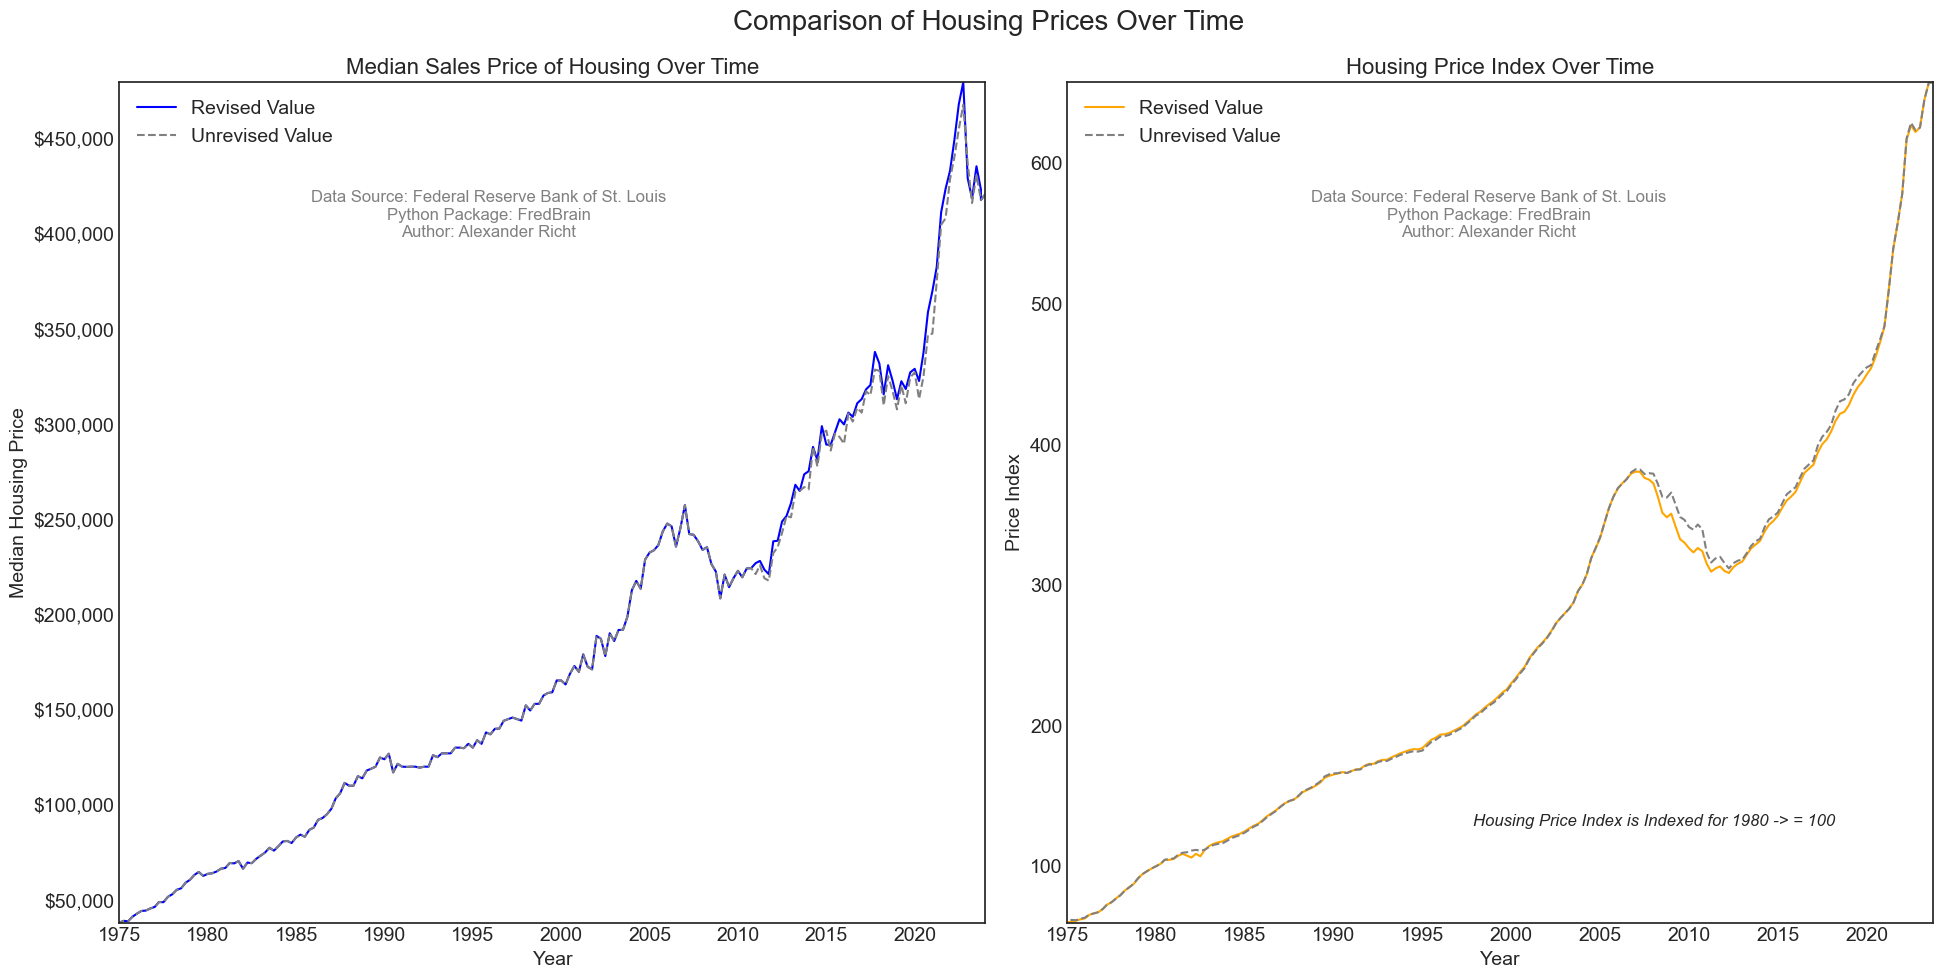

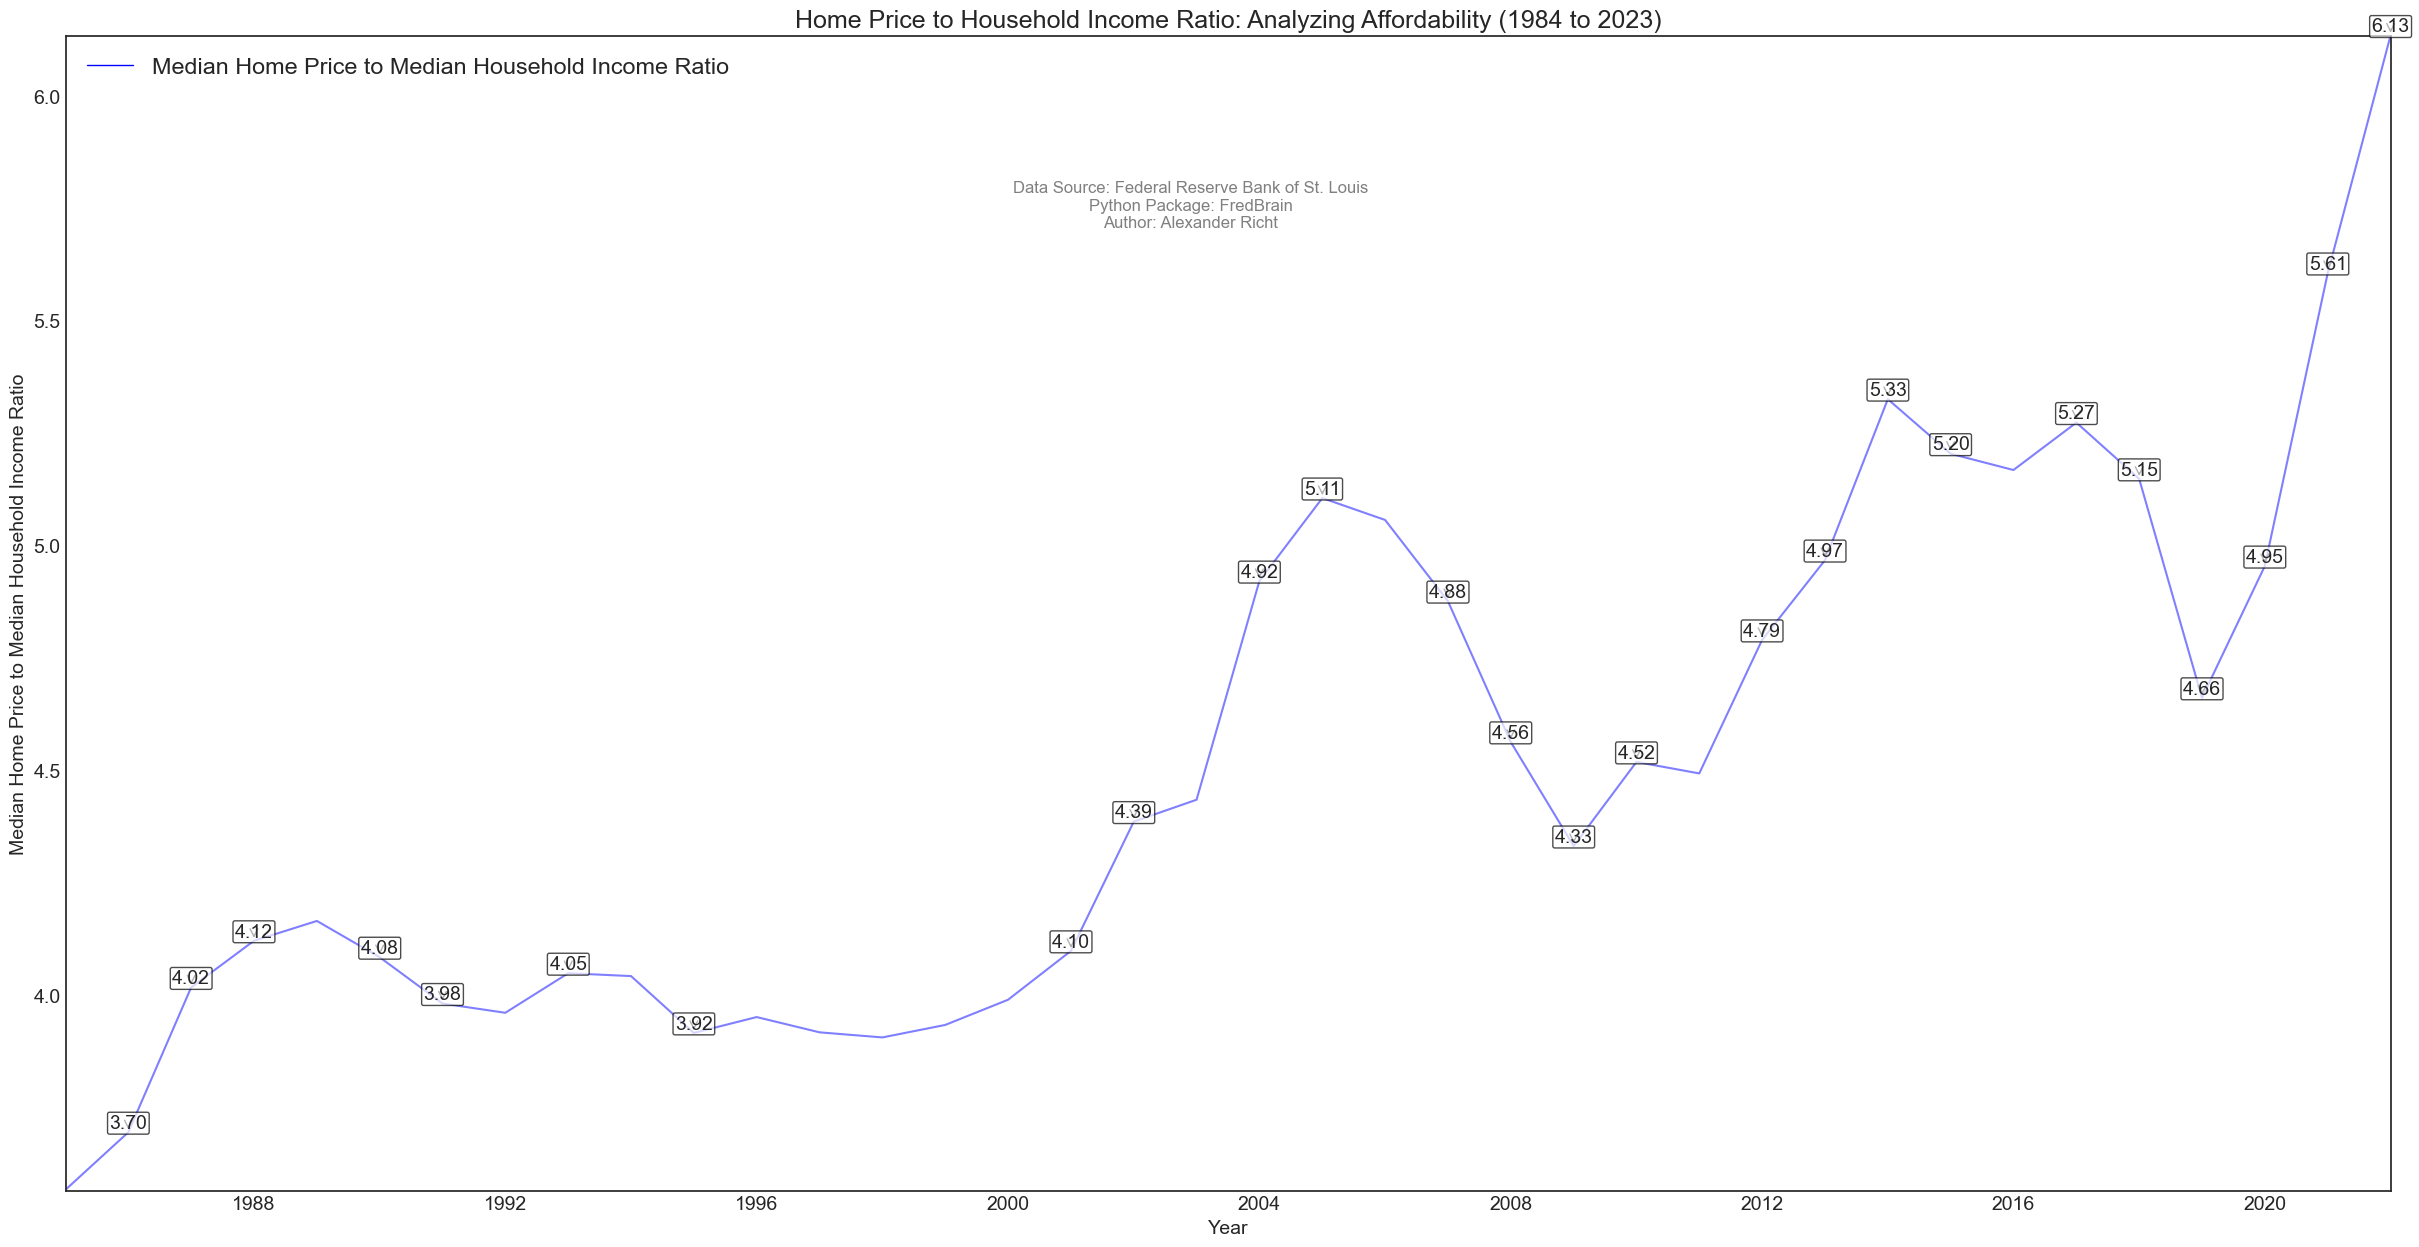

In [113]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('FIXHAI', 'PERMIT', 'HOUST', 'ETOTALUSQ176N', 'USSTHPI', 'MSPUS', 'ASPUS', 'MEHOINUSA646N', 'MEFAINUSA646N', 'MEPAINUSA646N')"
db_manager = mysql.connector.connect(host=DATABASE_HOST, user=DATABASE_USERNAME, passwd=DATABASE_PASSWORD, db=DATABASE_NAME)
cursor = db_manager.cursor()
cursor.execute(Data_Query)

Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

colors = {
    'FIXHAI': '#FIXHAI',     
    'PERMIT': '#ff7f0e80',
    'MEPAINUSA646N': '#2ca02c80',
    'MEFAINUSA646N': '#9467bd80',
    'MEHOINUSA646N': '#8c564b80',
    'MSPUS': 'black',
    'ASPUS': 'black',
}

PERMIT_df = recent_df[recent_df['Series'] == 'PERMIT']
FIXHAI_df = recent_df[recent_df['Series'] == 'FIXHAI']
HOUST_df = recent_df[recent_df['Series'] == 'HOUST']
MEPAINUSA646N_df = recent_df[recent_df['Series'] == 'MEPAINUSA646N']
MEHOINUSA646N_df = recent_df[recent_df['Series'] == 'MEHOINUSA646N']
MSPUS_df = recent_df[recent_df['Series'] == 'MSPUS']
ASPUS_df = recent_df[recent_df['Series'] == 'ASPUS']

def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))  # Reduced figure size
fig.suptitle('Comparison of Housing Prices Over Time', fontsize=20)
ax1.plot(MSPUS_df['Reporting Date'], MSPUS_df['Revised Value'], color='blue', label='Revised Value')
ax1.plot(MSPUS_df['Reporting Date'], MSPUS_df['Unrevised Value'], color='gray', linestyle='--', label='Unrevised Value')

ax2.plot(USSTHPI_df['Reporting Date'], USSTHPI_df['Revised Value'], color='orange', label='Revised Value')
ax2.plot(USSTHPI_df['Reporting Date'], USSTHPI_df['Unrevised Value'], color='gray', linestyle='--', label='Unrevised Value')

ax1.set_title('Median Sales Price of Housing Over Time', fontsize=16)
ax1.set_xlim(left=MSPUS_df['Reporting Date'].min(), right=MSPUS_df['Reporting Date'].max())
upper_y_limit = MSPUS_df[['Revised Value', 'Unrevised Value']].max().max()
bottom_y_limit = MSPUS_df[['Revised Value', 'Unrevised Value']].min().min()

ax1.yaxis.set_major_formatter('${x:,.0f}')
ax1.set_ylim(bottom=bottom_y_limit, top=upper_y_limit)
ax1.set_xlabel('Year')
ax1.set_ylabel('Median Housing Price')

ax2.set_title( 'Housing Price Index Over Time', fontsize=16)
ax2.set_xlim(left=USSTHPI_df['Reporting Date'].min(), right=USSTHPI_df['Reporting Date'].max())
upper_y_limit = USSTHPI_df[['Revised Value', 'Unrevised Value']].max().max()
bottom_y_limit = USSTHPI_df[['Revised Value', 'Unrevised Value']].min().min()
ax2.set_ylim(bottom=bottom_y_limit, top=upper_y_limit)
ax2.set_xlabel('Year')
ax2.set_ylabel('Price Index')
ax2.text(0.55, -0.01, 'Housing Price Index is Indexed for 1980 -> = 100',
        transform=ax.transAxes, ha='center', fontsize=12, style='italic')
ax1.legend()
ax2.legend()

fig.text(0.25, 0.75, copyright_notice, ha='center', va='bottom', fontsize=12, color='gray')
fig.text(0.75, 0.75, copyright_notice, ha='center', va='bottom', fontsize=12, color='gray')

ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(30, 15))

MSPUS_df['Reporting Date'] = pd.to_datetime(MSPUS_df['Reporting Date'])
MEHOINUSA646N_df['Reporting Date'] = pd.to_datetime(MEHOINUSA646N_df['Reporting Date'])

annual_mspus = MSPUS_df.groupby(MSPUS_df['Reporting Date'].dt.year)[['Revised Value', 'Unrevised Value']].mean()
merged_df = pd.merge(annual_mspus, MEHOINUSA646N_df.set_index(MEHOINUSA646N_df['Reporting Date'].dt.year), left_index=True, right_index=True, suffixes=('_MSPUS', '_MEHOIN'))

merged_df['Revised Ratio'] = merged_df['Revised Value_MSPUS'] / merged_df['Revised Value_MEHOIN']
merged_df['Unrevised Ratio'] = merged_df['Unrevised Value_MSPUS'] / merged_df['Unrevised Value_MEHOIN']

dataframe_sorted = merged_df
start_value = dataframe_sorted['Revised Ratio'].iloc[0]
end_value = dataframe_sorted['Revised Ratio'].iloc[-1]
change = (end_value - start_value)
percent_change = ((end_value - start_value) / start_value) * 100
plt.plot(dataframe_sorted['Reporting Date'], dataframe_sorted['Revised Ratio'],
         color='blue', linewidth=1.5 if series_name == 'WFRBST01134' else 1.0, alpha=alpha,
         label=f'{series_name} Revised')

def calculate_offset(value, fig, dpi, offset_factor=0.005):
    data_ratio = (fig.get_figheight() * dpi) / (fig.get_figwidth() * dpi)
    return value * offset_factor if data_ratio < 1 else value * offset_factor * data_ratio

dataframe_sorted['Value Change'] = dataframe_sorted['Revised Ratio'].diff()

threshold = dataframe_sorted['Value Change'].std() / 4

for i in range(1, len(dataframe_sorted)):
    if abs(dataframe_sorted.iloc[i]['Value Change']) > threshold:
        offset = calculate_offset(dataframe_sorted.iloc[i]['Revised Ratio'], plt.gcf(), plt.gcf().dpi)
        plt.annotate(
            f"{dataframe_sorted.iloc[i]['Revised Ratio']:.2f}",
            xy=(dataframe_sorted.iloc[i]['Reporting Date'], dataframe_sorted.iloc[i]['Revised Ratio']),
            xytext=(offset, offset), 
            textcoords="offset points",
            ha='center',
            va='bottom',
            bbox=dict(boxstyle="round,pad=0.1", facecolor='white', edgecolor='black', alpha=0.7),
            arrowprops=dict(arrowstyle="->", color='black') 
        )

series_info = {
    'merged_df': {'color': 'blue', 'label': 'Median Home Price to Median Household Income Ratio'}
}

legend_elements = [Line2D([0], [0], color=info['color'], lw=1, label=info['label'])
                   for info in series_info.values()]
ax.set_xlim(dataframe_sorted['Reporting Date'].iloc[1], dataframe_sorted['Reporting Date'].iloc[-1])
ax.set_title( 'Home Price to Household Income Ratio: Analyzing Affordability (1984 to 2023)', fontsize=18)
upper_y_limit = dataframe_sorted[['Revised Ratio', 'Unrevised Ratio']].max().max()
bottom_y_limit = dataframe_sorted[['Revised Ratio', 'Unrevised Ratio']].min().min()
ax.set_ylim(bottom=bottom_y_limit, top=upper_y_limit)
ax.set_xlabel('Year')
ax.set_ylabel('Median Home Price to Median Household Income Ratio')

fig.text(0.5, 0.75, copyright_notice, ha='center', va='bottom', fontsize=12, color='gray')

plt.legend(handles=legend_elements, loc='upper left', fontsize='large')
plt.show()

## The Weight of Debt

America is often stereotypically associated with large amounts of debt. Despite this association, household debt as a percentage of personal income has been declining over time, suggesting that American households are either incurring less debt or personal incomes have been improving at a rate faster than that at which household debt accumulates - providing an optimistic outlook on American financial health at the household level.

### Trends in Household and Consumer Debt
A clear decline in household debt relative to personal incomen can be seen, showing a significant drop post-2008 financial crisis. This decline could reflect tighter lending standards, shifts in consumer behavior towards more conservative financial practices, or overall improvements in personal income.

- **Tighter Lending Standards:** Following the 2008 financial crisis, financial institutions faced increased scrutiny and regulatory changes as poor accounting and debt rating practices were exposed, leading to stricter lending criteria. The introduction of laws like the Dodd-Frank Wall Street Reform and Consumer Protection Act aimed to prevent future financial crises by reducing risks inherent in the financial system but have made it more challenging for consumers to qualify for loans, particularly mortgages, thereby slowing the accumulation of new debt.

- **Shifts in Behavior:** The financial shock of the crisis profoundly affected consumer attitudes towards borrowing and spending. Witnessing the repercussions of excessive debt, including foreclosures and bankruptcies, many individuals shifted towards more conservative financial practices. This behavioral shift is evident in the reduced credit card balances and more cautious borrowing seen in the years following the crisis.

- **Refinancing and Low Interest Rates:** The Federal Reserve's response to the crisis included lowering interest rates to historic lows and enganging in quantative easing. This environment enabled many individuals to refinance existing mortgages at lower rates  reducing their monthly payments and overall debt burden. For many, it also presented an opportunity to consolidate other forms of debt (like credit cards and auto loans) into home equity loans or refinances, further decreasing debt burden.

These factors combined to create an environment where household debt grew at a slower pace relative to personal income, reflecting a more cautious and informed consumer base and a regulatory environment that discourages excessive risk in lending practices.

### Federal Debt: A Rising Concern
The second graph shifts focus from personal debt to the federal level, showing a stark increase in federal debt relative to GDP. This metric highlights the increasing burden of national debt, which has escalated particularly in response to economic stimulius during downturns such as the 2008 financial crisis and the COVID-19 pandemic as well as high spending on military activites such as those that occured in the middle east.

- **Historical Context and Recent Debt Surges:** The federal debt-to-GDP ratio has seen dramatic increases, particularly during periods of economic recession and significant national or global crises. The increases in federal debt following the 2008 financial crisis and the COVID-19 pandemic highlight the government's reliance on borrowing to fund economic stimulus packages aimed at mitigating the effects of either a downturn or a recession through a combination of loose fiscal and monetary policy - a practice supported by Keynesian economic theories.

- **Military Spending and Its Implications:** High spending on military activities, such as those in the Middle East, require extensive resources. These operations are often funded through increased borrowing, which adds to the federal debt. Long-term military engagements can lead to sustained high levels of debt accumulation, which pose challenges for fiscal sustainability.

A high debt-to-GDP ratio can have several long-term economic implications:

- Interest Rate Risk: As debt increases, the cost of servicing that debt can rise, especially if interest rates increase.
- Crowding Out Effect: High levels of government borrowing can result in "crowding out" private investment because the government absorbs a significant portion of the available capital in financial markets.
 -Inflationary Pressures: Over the long term, high debt levels might force the government to print more money to pay off debt, especially if it struggles to service the debt through revenue generation leading to additional inflationary pressures.
- Reduced Fiscal Flexibility: With increasing portions of the budget dedicated to servicing debt, there is less flexibility for the government to respond to future crises or invest in other public goods and services.

Managing the federal debt requires a careful balance of fiscal policy, including prudent spending, efficient tax policies, and strategic long-term investments that promote economic growth. Ensuring that debt levels remain sustainable over the long term is crucial to maintain economic stability and confidence in the government's financial management.

Ultimately, as long as America is able to service its debt payments, the risk of a default is not in sight. However, continuous servicing of high debt levels can strain fiscal capabilities, potentially limiting governmental responsiveness to unforeseen economic challenges in the future. That is why it is crucial to consider not just the present capacity to manage debt but also potential future economic environments that may be impacted by today's fiscal decisions.

### Implications and Future Outlook
The decline in household debt relative to income is a positive indicator for individual financial stability, suggesting that Americans may be becoming more financially resilient and carry less debt burden than the historical average. However, the dramatic rise in federal debt presents potential risks, including increased interest expenses, crowding out of private investment, and long-term fiscal sustainability challenges.

Balancing these contrasting trends in debt—personal reduction versus federal increase—will be crucial in ensuring economic stability and promoting sustainable growth. The discussion around debt management and fiscal responsibility remains more relevant than ever, as the decisions made today will shape the economic landscape for future generations.

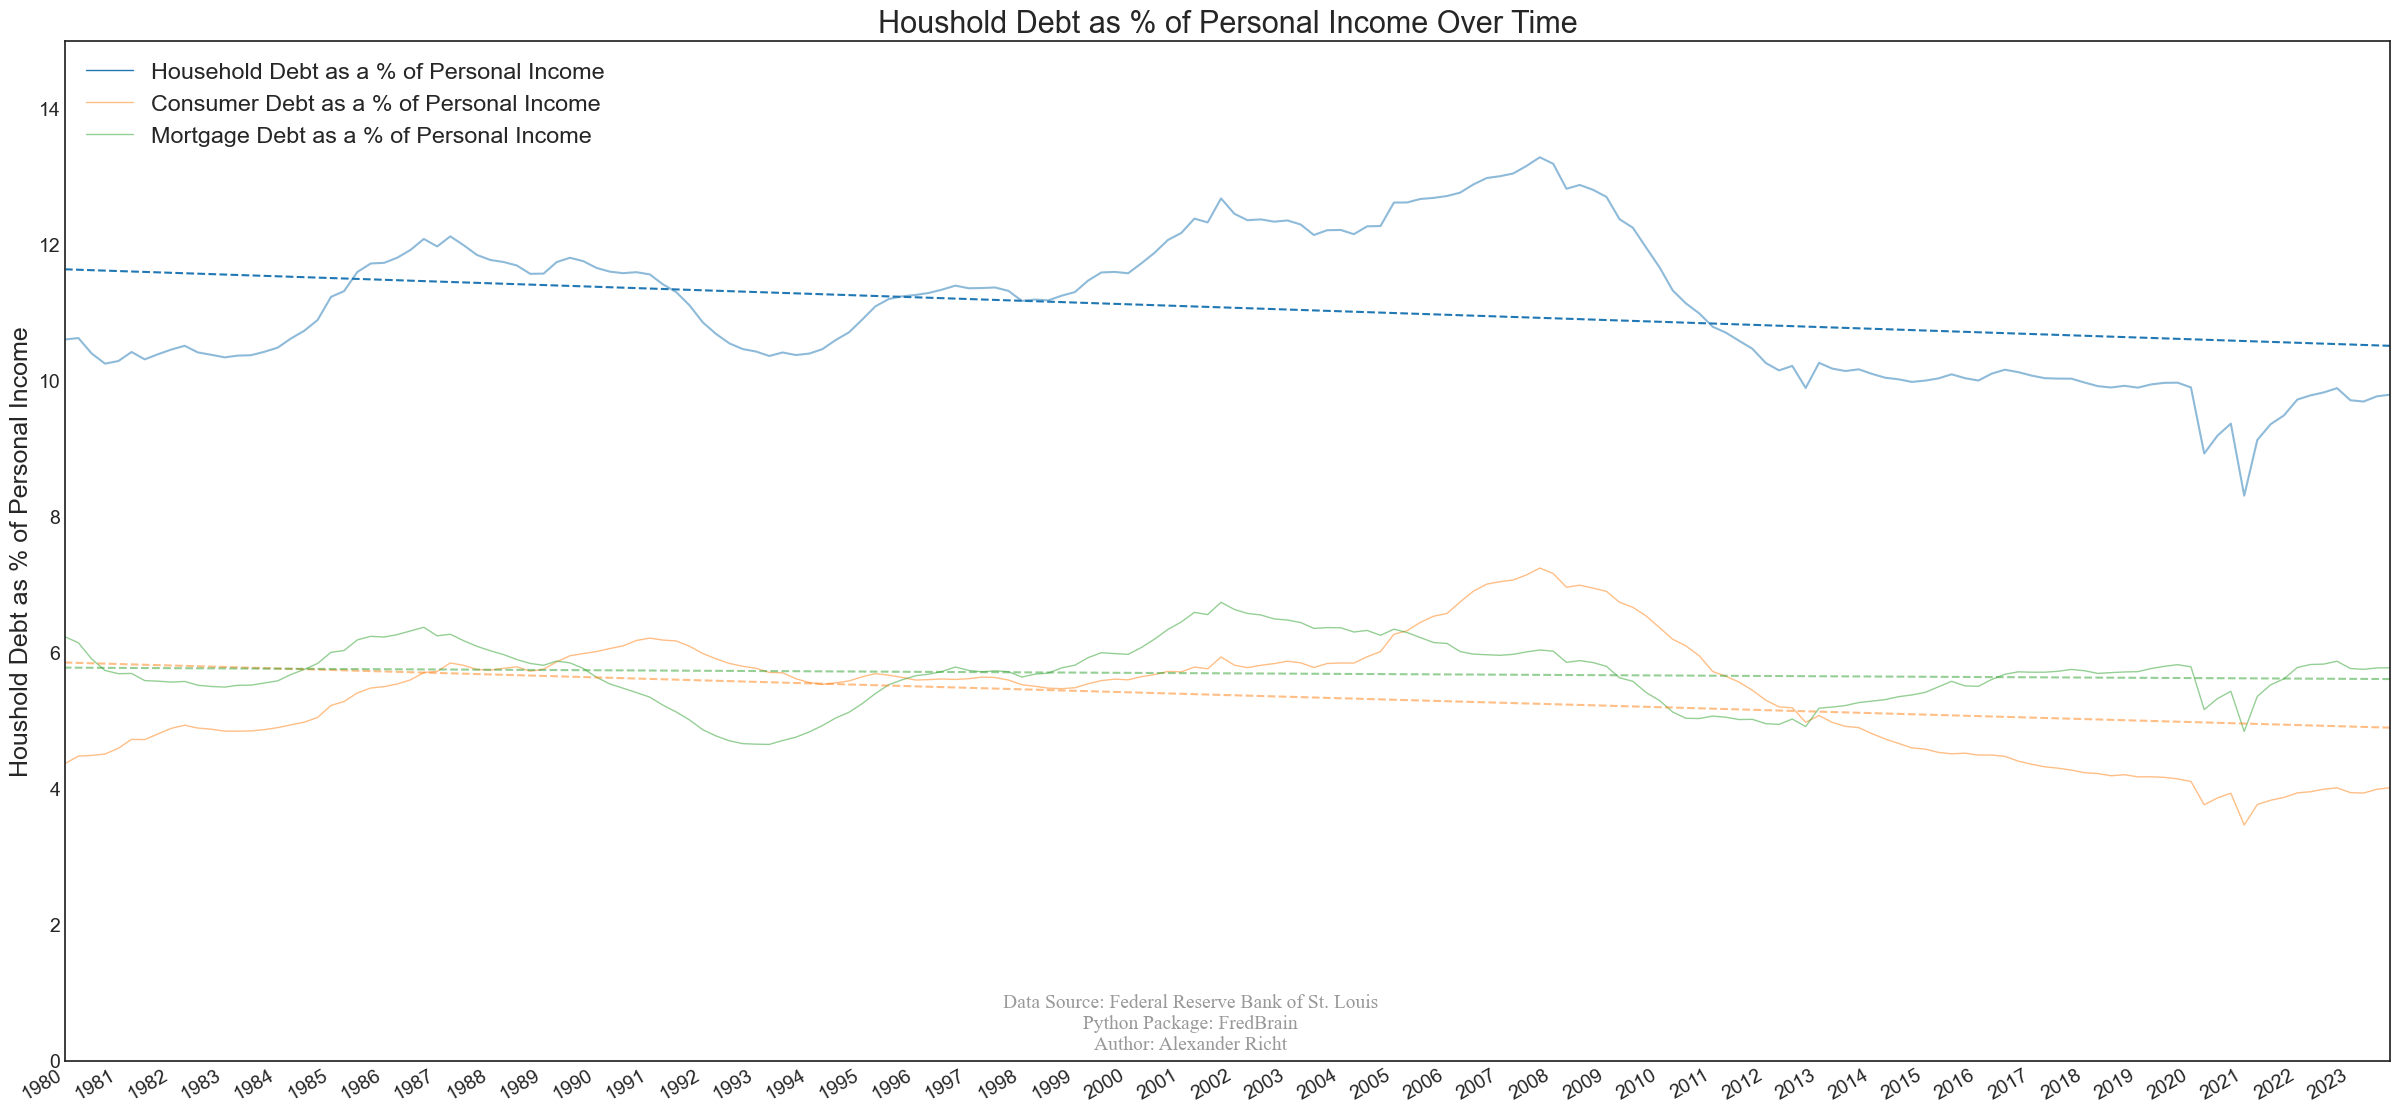

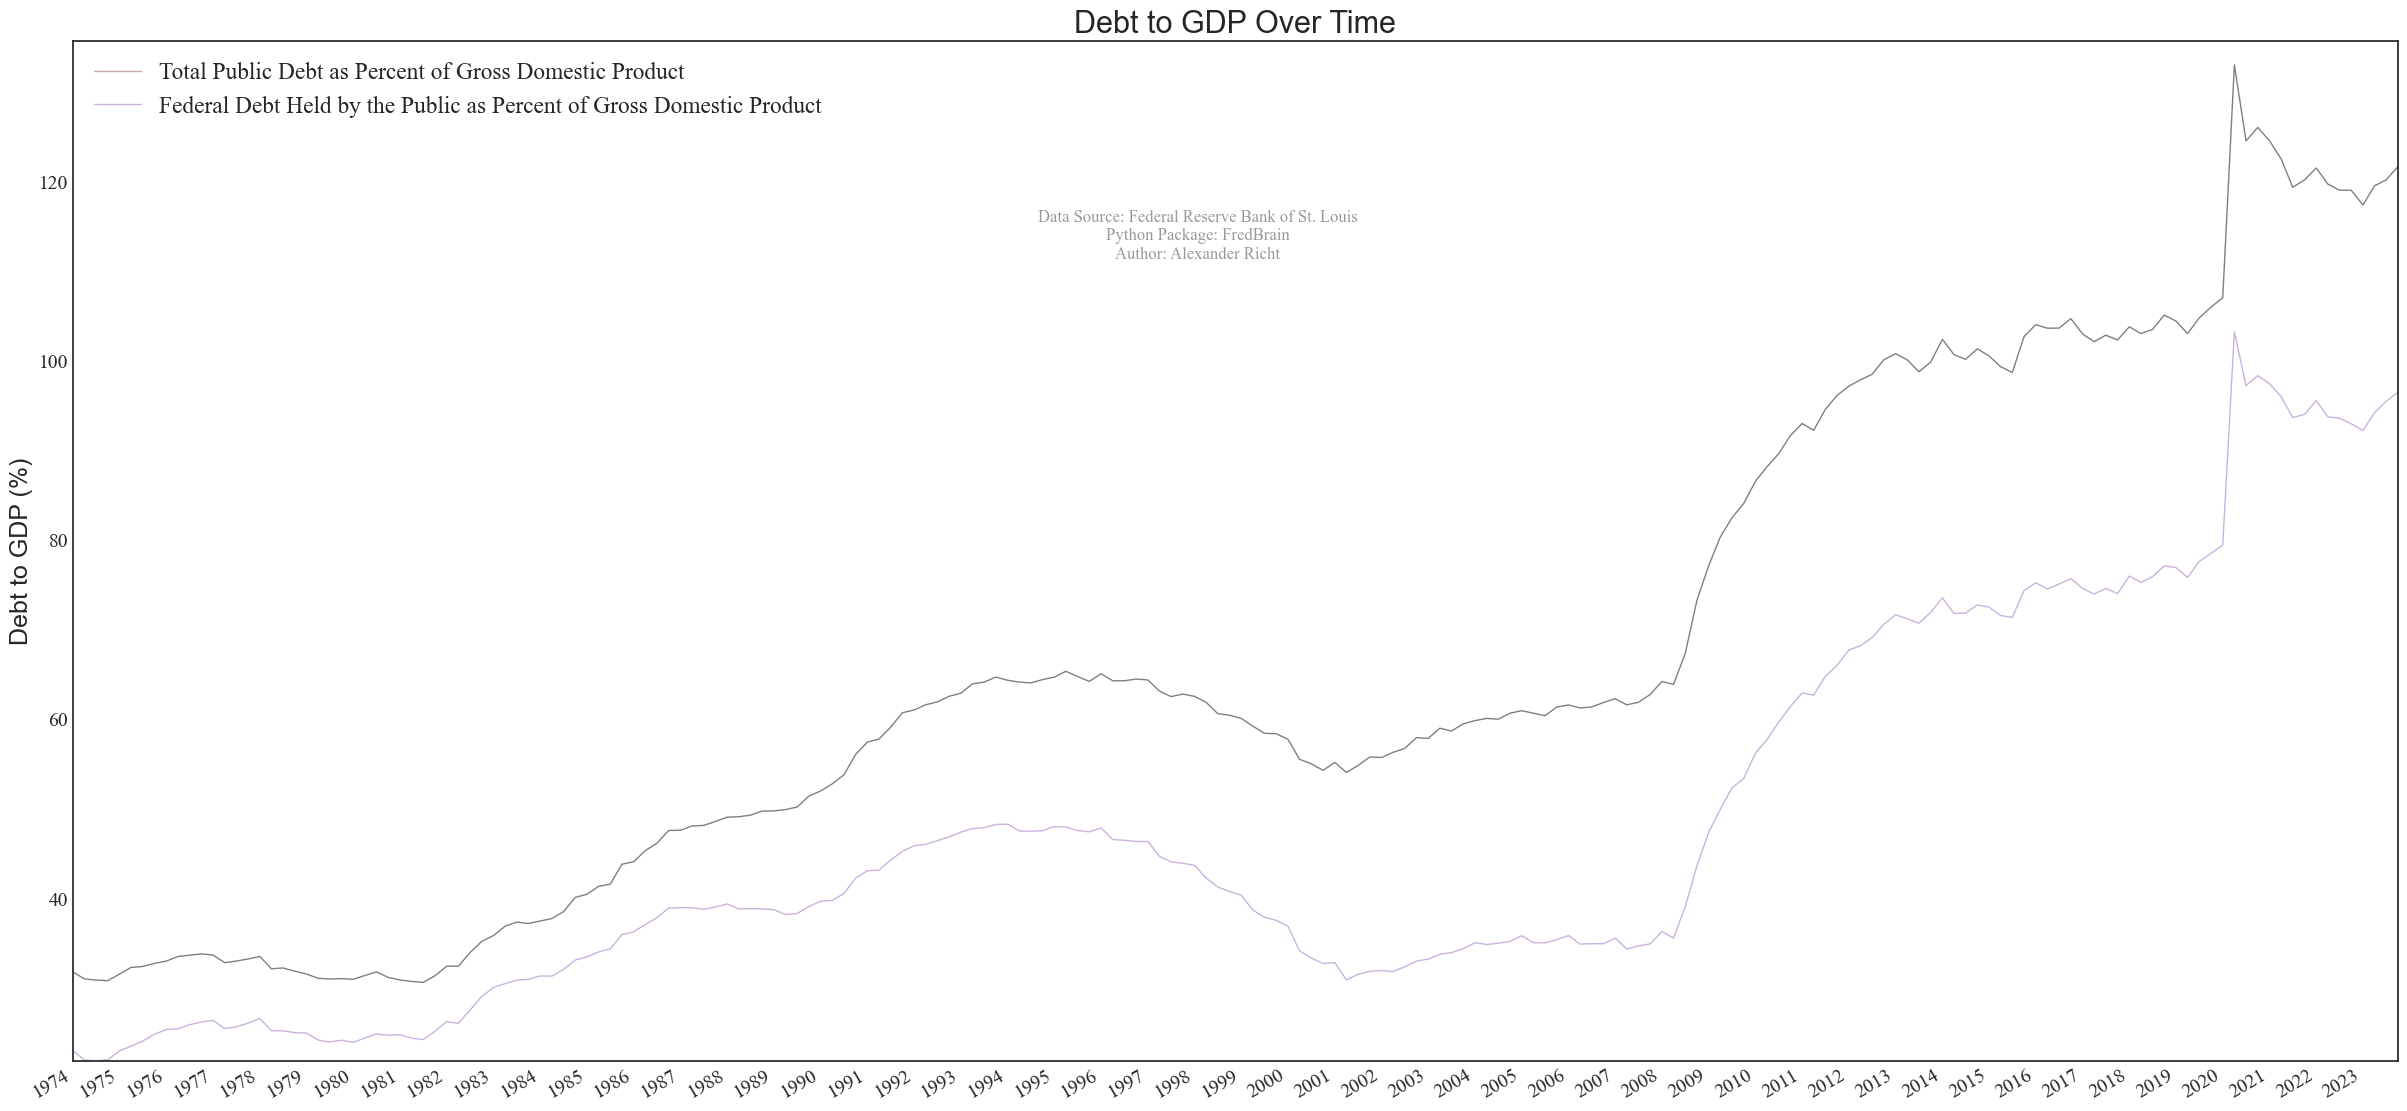

In [58]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('TDSP', 'MDSP', 'CDSP', 'FYGFGDQ188S', 'GFDGDPA188S', 'GFDEGDQ188S')"
db_manager = mysql.connector.connect(host=DATABASE_HOST, user=DATABASE_USERNAME, passwd=DATABASE_PASSWORD, db=DATABASE_NAME)
cursor = db_manager.cursor()
cursor.execute(Data_Query)

Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

TDSP_df = recent_df[recent_df['Series'] == 'TDSP']
MDSP_df = recent_df[recent_df['Series'] == 'MDSP']
CDSP_df = recent_df[recent_df['Series'] == 'CDSP']
FYGFGDQ188S_df = recent_df[recent_df['Series'] == 'FYGFGDQ188S']
GFDGDPA188S_df = recent_df[recent_df['Series'] == 'GFDGDPA188S']
GFDEGDQ188S_df = recent_df[recent_df['Series'] == 'GFDEGDQ188S']



colors = {
    'TDSP': '#1f77b4',     
    'MDSP': '#ff7f0e80',
    'CDSP': '#2ca02c80',
    'FYGFGDQ188S': '#9467bd80',
    'GFDGDPA188S': '#8c564b80',
    'GFDEGDQ188S': 'black' 
}

for dataframe, series_name in zip([TDSP_df, MDSP_df, CDSP_df],
                                  ['TDSP', 'MDSP', 'CDSP']):
    color = colors[series_name]
    alpha = 1.0 if series_name == 'CIVPART' else 0.5
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5 if series_name == 'TDSP' else 1.0, alpha=alpha, label=f'{series_name} Revised')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Seasonally Adjusted: Modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)



for dataframe, series_name in zip(
[TDSP_df, MDSP_df, CDSP_df],
                                  ['TDSP', 'MDSP', 'CDSP']
):
    color = colors[series_name]
    plot_trend_line(plt.gca(), dataframe['Reporting Date'], dataframe['Revised Value'], color, series_name)
    date_nums = mdates.date2num(dataframe['Reporting Date'])
    series_description = dataframe['Series Description'].iloc[-1]
    slope, intercept = np.polyfit(date_nums, dataframe['Revised Value'], 1)

series_info = {
    'TDSP': {'color': '#1f77b4', 'label': 'Household Debt as a % of Personal Income'},
    'MDSP': {'color': '#ff7f0e80', 'label': 'Consumer Debt as a % of Personal Income'},
    'CDSP': {'color': '#2ca02c80', 'label': 'Mortgage Debt as a % of Personal Income'},

}

legend_elements = [Line2D([0], [0], color=info['color'], lw=1, label=info['label'])
                   for info in series_info.values()]

plt.legend(handles=legend_elements, loc='upper left', fontsize='large')
    
plt.xlim(left=TDSP_df['Reporting Date'].min(), right=TDSP_df['Reporting Date'].max())

plt.ylim(bottom=0, top=15)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.text(0.5, 0.225, copyright_notice, fontsize=14, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Houshold Debt as % of Personal Income Over Time", fontsize=22, family='Arial')
plt.ylabel("Houshold Debt as % of Personal Income", fontsize=18, family='Arial')

plt.savefig('Debt as Percentage of Personal Income.png', format='png', dpi=150, bbox_inches='tight')

plt.figure(figsize=(30, 15))

for dataframe, series_name in zip([FYGFGDQ188S_df, GFDEGDQ188S_df],
                                  ['FYGFGDQ188S', 'GFDEGDQ188S']):
    color = colors[series_name]
    alpha = 1.0 if series_name == 'CIVPART' else 0.5
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5 if series_name == 'TDSP' else 1.0, alpha=alpha, label=f'{series_name} Revised')

series_info = {
    'GFDEGDQ188S': {'color': '#8c564b80', 'label': 'Total Public Debt as Percent of Gross Domestic Product'},
    'FYGFGDQ188S': {'color': '#9467bd80', 'label': 'Federal Debt Held by the Public as Percent of Gross Domestic Product'}
}

legend_elements = [Line2D([0], [0], color=info['color'], lw=1, label=info['label'])
                   for info in series_info.values()]

plt.legend(handles=legend_elements, loc='upper left', fontsize='large')

plt.xlim(left=GFDEGDQ188S_df['Reporting Date'].min(), right=GFDEGDQ188S_df['Reporting Date'].max())

upper_y_limit = GFDEGDQ188S_df[['Revised Value', 'Unrevised Value']].max().max()
bottom_y_limit = FYGFGDQ188S_df[['Revised Value', 'Unrevised Value']].min().min()
plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.text(0.5, 0.75, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Debt to GDP Over Time", fontsize=22, family='Arial')
plt.ylabel("Debt to GDP (%)", fontsize=18, family='Arial')

plt.savefig('Debt to GDP Over Time.png', format='png', dpi=150, bbox_inches='tight')

## The Prosperity of the American People

The comprehensive analysis of labor market trends and economic indicators over the past decades has revealed significant insights into unemployment rates, labor force participation, population demographics, job vacancies, wage disparities, shifts in economic inequality, developments in the housing market and within household and federal debt levels.

- **Unemployment Trends:** Unemployment levels are currently at a historical low partially driven by changes in population demographics and behaviors.

- **Labor Force Participation:** Labor force participation rates show distinct trends among different age groups and demographics. While the overall participation rate has declined, the participation of older age groups has increased, possibly reflecting changes in retirement trends and economic necessity. Youth participation has also declined, most likely due to increased educational enrollment.

- **Job Vacancies:** Job vacancies have seen a dramatic increase over recent years, indicating a growing demand for labor that is not met by the available domestic supply. This mismatch may signal underlying issues in skills, training, and labor force behavior. Contributing to some of the highest population levels of foreign born workers ever.

- **Wage Trends:** The real median weekly earnings have shown marginal growth, yet this growth is uneven across genders, with women consistently earning less than men, though the gap has narrowed considerably over the years.

- **Price Changes and Economic Impact:** Year-over-year changes in the Consumer Price Index (CPI) for various categories like housing, dining out, and groceries reflect the cost of living crisis that many of us experience. Reminding us of the subtle power that fiscal and monetary policy can have on our lives both in the form of inflation and interest rates

- **Economic Disparities and Wealth Distribution:** The analysis of wealth distribution over time demonstrates the unfortunately growing disparities between different income percentiles. The top 1% has seen substantial increases in their share of total net wealth, which highlights widening economic inequality. In contrast, the bottom 50th-90th percentile has experienced relatively stagnant growth while the bottom 50% have seen their total share decrease signficntly further exacerbating economic and social divisions. The same is true regarding corporate profit growth which has seen robust growth. However, this growth has not necessarily translated into proportional benefits for the broader workforce, highlighting issues of wage growth and income distribution in todays society.

- **Housing Market Trends:** Housing prices have shown dramatic increases over the decades, as evidenced by the median sales price and housing price index. These increases have significantly outpaced income growth, as shown by the rising median home price to median household income ratio, which has made housing affordability a pressing issue in recent years.

- **Debt Dynamics:** Household, consumer, and mortgage debt as a percentage of personal income have declined over time reflecting a more cautious and informed consumer base and a regulatory environment that discourages excessive risk in lending practices.

- **Federal Debt and Economic Impact:** The ratio of federal debt to GDP has increased sharply, reflecting the government's response to economic crises and ongoing fiscal challenges. This rising debt poses potential risks for future economic stability and has implications on the ability to implement future economic policies.

## A Call for Equitable Prosperity
Our analysis paints a complex portrait of the American labor market landscape marked by resilience and growth but shadowed by significant challenges. While we celebrate historically low unemployment rates and improvements in debt levels, these successes must not overshadow the persisting lack of real income growth and the disparities that exist in wealth distribution.

Wage stagnation amidst rising corporate profits and wealth growth in the top 1%, underscores a growing disconnect between parts of society. This disparity, coupled with the alarming rise in housing costs and broader economic inequality, highlights the urgent need for policies that not only foster market efficiency but also ensure that prosperity is widely shared amongst the American people.

We stand at a crossroads where the potential for innovation and growth continues to be immense. Yet, the promise of the American dream is beocming elusive to many. As we move forward, it is imperative that our economic policies not only respond to short-term crises but also address long-term structural inequalities and inclusive growth where every American has the opportunity to participate in and benefit from the economic progress being achieved. 

We can forge a future that upholds the ideals of rewarding hard-work, ambition, equity and justice, ensuring that the prosperity of the nation is a prosperity shared by all its people and not only a select few.